## Užduotis: Regresija

#### Ši užduotis siekia sukurti modelį, kuris leistų prognozuoti šalies GDP per capita reikšmę.

#### Duomenų analizė:
- Raskite top 10 šalių, kurių "Gross domestic product per capita" paaugo daugiausiai.
- Nubraižykite grafiką, kaip augo OECD šalių populiacija per paskutinius 10 metų.
- Išsaugokite visus grafikus pagal šalis kaip png failus.
- Padalinkite šalis į 5 klasterius pagal GDP ir "Volume of exports of goods".
- Nubraižykite klasterius (GDP x-ašis ir Volume y-ašis).
- Pažymėkite top 5 šalis pagal GDP kiekviename klasteryje ir pridėkite tekstinį žymeklį.
- Raskite visas metrikas, kurios nėra tuščios 2015 metų duomenyse.

#### Modelio kūrimas:
- Naudodamiesi scikit-learn biblioteka sukurkite modelį, kuris leistų prognozuoti šalies GDP per capita reikšmę.

#### Model deployment:
- sukurkite API, kur su POST request nusiuntus 5 reikšmingiausius kintamuosius gautumėm GDP per capita prognozę.

## • Duomenų analizė

In [1]:
# installing "openpyxl" to be able to read excel files
#!pip install openpyxl

In [2]:
# reading data
import pandas as pd
df = pd.read_excel('WEOOct2021all.xlsx', engine='openpyxl')
df.head()

WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2  Expressed in billions of national currency uni...   
3  Values are based upon GDP in national currency...   
4  These data form the basis for the country weig...   

                                            Units     Scale  \
0                               National currency  Billions   
1                                  Percent change       NaN   
2                               National currency  Billions   
3                                    U.S. dollars  Billions   
4  Purchasing power parity; international dollars  Billions   

                       Country/Series-specific Notes 1980  ...     2018  \
0  Source: National Statistics Office Latest actu...  NaN  ...  1270.22   
1  See notes for:  Gross domestic product, consta...  NaN  ...    1.189   
2  Source: National Statistics Office Latest actu...  NaN  ...  1327.69   
3  See notes for:  Gross domestic product, curren...  NaN  ...   18.401   
4  See notes for:  Gross domestic product, curren...  NaN  ...   77.406   

     2019     2020 2021 2022 2023 2024 2025 2026 Estimates Start After  
0  1319.9  1288.87  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
1   3.912   -2.351  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
2  1469.6  1547.29  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
3  18.876   20.136  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
4  81.873   80.912  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  

[5 rows x 57 columns]

In [3]:
# checking last rows values of dataframe
df.tail()

WEO Country Code  ISO WEO Subject Code  \
8818                                                698  ZWE              BCA   
8819                                                698  ZWE        BCA_NGDPD   
8820                                                NaN  NaN              NaN   
8821  International Monetary Fund, World Economic Ou...  NaN              NaN   
8822  Note: Non-zero values which round to zero at 3...  NaN              NaN   

       Country       Subject Descriptor  \
8818  Zimbabwe  Current account balance   
8819  Zimbabwe  Current account balance   
8820       NaN                      NaN   
8821       NaN                      NaN   
8822       NaN                      NaN   

                                          Subject Notes           Units  \
8818  Current account is all transactions other than...    U.S. dollars   
8819  Current account is all transactions other than...  Percent of GDP   
8820                                                NaN             NaN   
8821                                                NaN             NaN   
8822                                                NaN             NaN   

         Scale                      Country/Series-specific Notes   1980  ...  \
8818  Billions  Source: Reserve Bank of Zimbabwe and Ministry ... -0.301  ...   
8819       NaN  See notes for:  Gross domestic product, curren...    NaN  ...   
8820       NaN                                                NaN    NaN  ...   
8821       NaN                                                NaN    NaN  ...   
8822       NaN                                                NaN    NaN  ...   

       2018   2019   2020   2021   2022   2023   2024   2025   2026  \
8818  -1.38   0.92  1.275  1.262   1.06  0.621  0.148 -0.247 -0.683   
8819 -5.867  4.699  5.815  4.894  3.811  2.217  0.519 -0.833 -2.162   
8820    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8821    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8822    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

     Estimates Start After  
8818                2019.0  
8819                2019.0  
8820                   NaN  
8821                   NaN  
8822                   NaN  

[5 rows x 57 columns]

In [4]:
# Reading last 2 rows full info of the column "WEO Country Code"
pd.set_option('display.max_colwidth', None)
df['WEO Country Code'].tail(2)

8821                                                                                                                                                                                                                                International Monetary Fund, World Economic Outlook Database, October 2021
8822    Note: Non-zero values which round to zero at 3 decimal places are indicated by "--". Missing and unavailable data are indicated by "n/a". A blank row means that data is not available or not applicable. Please see the "Estimates start after" column for the year after which values are estimated.
Name: WEO Country Code, dtype: object

In [5]:
# resetting display option
pd.reset_option('^display.', silent=True)

In [6]:
# removing last 3 rows
df.drop(df.tail(3).index,inplace=True)
df.tail()

WEO Country Code  ISO WEO Subject Code   Country  \
8815              698  ZWE           GGXWDG  Zimbabwe   
8816              698  ZWE      GGXWDG_NGDP  Zimbabwe   
8817              698  ZWE          NGDP_FY  Zimbabwe   
8818              698  ZWE              BCA  Zimbabwe   
8819              698  ZWE        BCA_NGDPD  Zimbabwe   

                                     Subject Descriptor  \
8815                      General government gross debt   
8816                      General government gross debt   
8817  Gross domestic product corresponding to fiscal...   
8818                            Current account balance   
8819                            Current account balance   

                                          Subject Notes              Units  \
8815  Gross debt consists of all liabilities that re...  National currency   
8816  Gross debt consists of all liabilities that re...     Percent of GDP   
8817  Gross domestic product corresponding to fiscal...  National currency   
8818  Current account is all transactions other than...       U.S. dollars   
8819  Current account is all transactions other than...     Percent of GDP   

         Scale                      Country/Series-specific Notes   1980  ...  \
8815  Billions  Source: Ministry of Finance or Treasury Latest...    NaN  ...   
8816       NaN  See notes for:  General government gross debt ...    NaN  ...   
8817  Billions  Source: Ministry of Finance or Treasury Latest...    NaN  ...   
8818  Billions  Source: Reserve Bank of Zimbabwe and Ministry ... -0.301  ...   
8819       NaN  See notes for:  Gross domestic product, curren...    NaN  ...   

        2018     2019     2020     2021     2022     2023     2024     2025  \
8815  14.459  181.867  968.863  1187.21  1615.81  1924.61  2169.96  2357.23   
8816  61.486  113.923   86.147   54.013   60.311   62.027    62.24   60.688   
8817  23.516  159.641  1124.67     2198  2679.15  3102.88  3486.45  3884.16   
8818   -1.38     0.92    1.275    1.262     1.06    0.621    0.148   -0.247   
8819  -5.867    4.699    5.815    4.894    3.811    2.217    0.519   -0.833   

         2026 Estimates Start After  
8815  2518.86                2019.0  
8816   59.609                2019.0  
8817  4225.61                2019.0  
8818   -0.683                2019.0  
8819   -2.162                2019.0  

[5 rows x 57 columns]

In [7]:
# Checking dataframe info: number of total rows, non-null rows, columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8820 non-null   object 
 1   ISO                            8820 non-null   object 
 2   WEO Subject Code               8820 non-null   object 
 3   Country                        8820 non-null   object 
 4   Subject Descriptor             8820 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8820 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7634 non-null   object 
 9   1980                           3872 non-null   object 
 10  1981                           3992 non-null   object 
 11  1982                           4032 non-null   object 
 12  1983                           4074 non-null   o

In [8]:
# removing all data from years 1980 to 2009 (to have at least 10 years of actual data)
df.drop(df.columns[9:29], axis = 1, inplace = True)
df.head()

WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2  Expressed in billions of national currency uni...   
3  Values are based upon GDP in national currency...   
4  These data form the basis for the country weig...   

                                            Units     Scale  \
0                               National currency  Billions   
1                                  Percent change       NaN   
2                               National currency  Billions   
3                                    U.S. dollars  Billions   
4  Purchasing power parity; international dollars  Billions   

                       Country/Series-specific Notes 2000  ...     2018  \
0  Source: National Statistics Office Latest actu...  NaN  ...  1270.22   
1  See notes for:  Gross domestic product, consta...  NaN  ...    1.189   
2  Source: National Statistics Office Latest actu...  NaN  ...  1327.69   
3  See notes for:  Gross domestic product, curren...  NaN  ...   18.401   
4  See notes for:  Gross domestic product, curren...  NaN  ...   77.406   

     2019     2020 2021 2022 2023 2024 2025 2026 Estimates Start After  
0  1319.9  1288.87  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
1   3.912   -2.351  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
2  1469.6  1547.29  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
3  18.876   20.136  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  
4  81.873   80.912  NaN  NaN  NaN  NaN  NaN  NaN                2019.0  

[5 rows x 37 columns]

### - Raskite top 10 šalių, kurių "Gross domestic product per capita" paaugo daugiausiai.

In [9]:
# Checking unique number of values for each subject descriptor
df['Subject Descriptor'].value_counts()

Gross domestic product per capita, current prices                                     588
Gross domestic product, current prices                                                588
Gross domestic product, constant prices                                               392
Inflation, end of period consumer prices                                              392
General government gross debt                                                         392
General government net debt                                                           392
General government primary net lending/borrowing                                      392
General government structural balance                                                 392
General government net lending/borrowing                                              392
General government total expenditure                                                  392
General government revenue                                                            392
Current ac

In [10]:
# Selecting the GDP per capita, current prices category and checking which units it has
df[(df['Subject Descriptor'] =='Gross domestic product per capita, current prices')]['Units'].value_counts()

National currency                                 196
U.S. dollars                                      196
Purchasing power parity; international dollars    196
Name: Units, dtype: int64

In [11]:
# Selecting GDP data, changing 'Estimates Start After' column to integer, checking when estimates for GDP start and how many unique countries there are in each year
GDP_data = df[(df['Subject Descriptor'] =='Gross domestic product per capita, current prices')&(df['Units']=='U.S. dollars')]
GDP_data['Estimates Start After'] = GDP_data['Estimates Start After'].astype(int)
GDP_data['Estimates Start After'].value_counts()

C:\Users\a112917\AppData\Local\Temp\ipykernel_9028\2329718995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_data['Estimates Start After'] = GDP_data['Estimates Start After'].astype(int)


2020    78
2019    42
2018    17
2015    12
2017    11
2016    10
2014     5
2011     4
2004     4
2013     3
2010     3
2012     3
2006     1
2003     1
2009     1
2008     1
Name: Estimates Start After, dtype: int64

In [12]:
# Selecting 5 year GDP per capita growth from 2015 to 2020 (because 2020 is the last year when some countries have actual data)
GDP_data_temp = GDP_data[['Country','ISO','Estimates Start After',2015,2020]].reset_index(drop=True)

# Calculating growth
GDP_data_temp['GDP_growth'] = ((GDP_data_temp[2020] / GDP_data_temp[2015])-1)*100

# Sorting countries from highest growth to lowest and limiting to Top10
Top_countries = GDP_data_temp.sort_values(by = ['GDP_growth'], ascending = False)[:10]
Top_countries

Country  ISO  Estimates Start After      2015      2020  \
79   Islamic Republic of Iran  IRN                   2019    4844.5   9928.19   
183                   Ukraine  UKR                   2020   2124.33   3741.06   
114                   Moldova  MDA                   2019   2715.78    4522.6   
14                 Bangladesh  BGD                   2020   1248.89   1961.61   
69                     Guinea  GIN                   2014   712.049   1101.71   
181                    Tuvalu  TUV                   2017   3396.69   5105.93   
142                   Romania  ROU                   2020    8942.2  12867.64   
57                   Ethiopia  ETH                   2016   702.767   994.197   
26                   Bulgaria  BGR                   2020   7079.78  10006.35   
100                 Lithuania  LTU                   2019  14265.41  19981.34   

     GDP_growth  
79   104.937352  
183   76.105407  
114   66.530426  
14    57.068277  
69    54.723902  
181   50.320753  
142   43.897922  
57    41.468936  
26    41.337019  
100   40.068459

In [13]:
# Top countries with actual GDP data (Estimates Start After 2020)
Top_countries_with_actuals = GDP_data_temp[GDP_data_temp['Estimates Start After'] == 2020].sort_values(by = ['GDP_growth'], ascending = False)[:10]
Top_countries_with_actuals

Country  ISO  Estimates Start After      2015      2020 GDP_growth
183     Ukraine  UKR                   2020   2124.33   3741.06  76.105407
14   Bangladesh  BGD                   2020   1248.89   1961.61  57.068277
142     Romania  ROU                   2020    8942.2  12867.64  43.897922
26     Bulgaria  BGR                   2020   7079.78  10006.35  41.337019
81      Ireland  IRL                   2020   61861.2   85205.5  37.736578
150      Serbia  SRB                   2020   5588.98   7645.79  36.801169
36        China  CHN                   2020   8034.29  10511.34  30.830976
1       Albania  ALB                   2020   3953.61   5152.56  30.325449
75      Hungary  HUN                   2020  12690.17  15866.22   25.02764
138      Poland  POL                   2020  12563.61   15699.3  24.958511

### - Nubraižykite grafiką, kaip augo OECD šalių populiacija per paskutinius 10 metų.
### - Išsaugokite visus grafikus pagal šalis kaip png failus.

In [14]:
# Getting data from OECD website for the list of countries that belong to OECD
#!pip install lxml
import requests

link = 'https://www.oecd.org/about/document/ratification-oecd-convention.htm'
html = requests.get(link).content
OECD_data = pd.read_html(html)

# Cleaning the data to show only Country and Date information
OECD_data = OECD_data[-1][[1,2]]
OECD_data.columns = OECD_data.iloc[0]
OECD_data = OECD_data.drop(0, axis=0)
OECD_data['Country'] = OECD_data['Country'].str.title()
OECD_data.head()

0    Country               Date
1  Australia        7 June 1971
2    Austria  29 September 1961
3    Belgium  13 September 1961
4     Canada      10 April 1961
5      Chile         7 May 2010

In [15]:
# Getting population data and merging with the OECD dataframe to have only OECD countries
population_data = df[df['Subject Descriptor'] =='Population'].drop(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Subject Notes', 'Country/Series-specific Notes'], axis=1)

OECD_pop_raw = pd.merge(OECD_data, population_data, left_on='Country', right_on= 'Country')

# Dropping columns from year 2000 to 2009
OECD_pop_raw.drop(OECD_pop_raw.columns[5:15], axis = 1, inplace = True)
OECD_pop_raw.head()

Country               Date Subject Descriptor    Units     Scale    2010  \
0  Australia        7 June 1971         Population  Persons  Millions  22.172   
1    Austria  29 September 1961         Population  Persons  Millions   8.361   
2    Belgium  13 September 1961         Population  Persons  Millions   10.84   
3     Canada      10 April 1961         Population  Persons  Millions  33.958   
4      Chile         7 May 2010         Population  Persons  Millions  17.064   

     2011    2012    2013    2014  ...    2018    2019    2020    2021  \
0  22.522  22.928  23.298   23.64  ...  25.171  25.558  25.694   25.72   
1   8.389   8.426   8.477   8.544  ...   8.885   8.859   8.901   8.946   
2  11.001  11.076  11.138  11.181  ...  11.399  11.456  11.522  11.542   
3  34.298  34.665  35.034  35.392  ...  37.003  37.534  37.973  38.188   
4  17.254  17.443  17.612  17.788  ...  18.751  19.107  19.458  19.718   

     2022    2023    2024    2025    2026 Estimates Start After  
0  25.849   26.12   26.46   26.79  27.112                2020.0  
1    8.99   9.035    9.08   9.126   9.171                2019.0  
2  11.583  11.635  11.683  11.729  11.773                2020.0  
3  38.593  39.003  39.411  39.816   40.22                2020.0  
4  19.923  20.113  20.297  20.482   20.67                2020.0  

[5 rows x 23 columns]

In [16]:
# Dropping irrelevant columns
OECD_pop_clean = OECD_pop_raw.drop(['Date', 'Subject Descriptor','Units', 'Scale', 'Estimates Start After'], axis=1)
OECD_pop_clean.head()

Country    2010    2011    2012    2013    2014    2015    2016    2017  \
0  Australia  22.172  22.522  22.928  23.298   23.64  23.985   24.39  24.773   
1    Austria   8.361   8.389   8.426   8.477   8.544    8.63    8.74   8.815   
2    Belgium   10.84  11.001  11.076  11.138  11.181  11.237  11.311  11.352   
3     Canada  33.958  34.298  34.665  35.034  35.392  35.678  36.052  36.495   
4      Chile  17.064  17.254  17.443  17.612  17.788  17.971  18.167  18.419   

     2018    2019    2020    2021    2022    2023    2024    2025    2026  
0  25.171  25.558  25.694   25.72  25.849   26.12   26.46   26.79  27.112  
1   8.885   8.859   8.901   8.946    8.99   9.035    9.08   9.126   9.171  
2  11.399  11.456  11.522  11.542  11.583  11.635  11.683  11.729  11.773  
3  37.003  37.534  37.973  38.188  38.593  39.003  39.411  39.816   40.22  
4  18.751  19.107  19.458  19.718  19.923  20.113  20.297  20.482   20.67

In [17]:
# Transposing the data and setting header to be the country name
OECD_pop_clean = OECD_pop_clean.T
new_header = OECD_pop_clean.iloc[0]
OECD_pop_clean = OECD_pop_clean[1:]
OECD_pop_clean.columns = new_header 
OECD_pop_clean

Country Australia Austria Belgium  Canada   Chile Colombia Costa Rica  \
2010       22.172   8.361   10.84  33.958  17.064   44.086      4.554   
2011       22.522   8.389  11.001  34.298  17.254   44.553      4.613   
2012       22.928   8.426  11.076  34.665  17.443   45.002      4.673   
2013       23.298   8.477  11.138  35.034  17.612   45.435      4.733   
2014        23.64   8.544  11.181  35.392  17.788   45.866      4.793   
2015       23.985    8.63  11.237  35.678  17.971   46.314      4.851   
2016        24.39    8.74  11.311  36.052  18.167    46.83      4.909   
2017       24.773   8.815  11.352  36.495  18.419   47.419      4.966   
2018       25.171   8.885  11.399  37.003  18.751   48.258      5.022   
2019       25.558   8.859  11.456  37.534  19.107   49.396      5.075   
2020       25.694   8.901  11.522  37.973  19.458   50.372      5.128   
2021        25.72   8.946  11.542  38.188  19.718   51.049      5.182   
2022       25.849    8.99  11.583  38.593  19.923   51.609      5.236   
2023        26.12   9.035  11.635  39.003  20.113   52.156      5.291   
2024        26.46    9.08  11.683  39.411  20.297   52.691      5.346   
2025        26.79   9.126  11.729  39.816  20.482   53.217      5.402   
2026       27.112   9.171  11.773   40.22   20.67   53.732      5.458   

Country Czech Republic Denmark Estonia  ...  Poland Portugal Slovak Republic  \
2010            10.462   5.535   1.331  ...  38.023   10.573            5.39   
2011            10.487   5.561   1.327  ...  38.063   10.558           5.392   
2012            10.505   5.581   1.323  ...  38.064   10.515           5.404   
2013            10.516   5.603   1.318  ...  38.063   10.457           5.411   
2014            10.512   5.627   1.315  ...  38.018   10.401           5.416   
2015            10.538    5.66   1.315  ...  38.006   10.358           5.421   
2016            10.554   5.707   1.316  ...  37.967   10.326           5.426   
2017            10.579   5.749   1.317  ...  37.973     10.3           5.435   
2018             10.61   5.781   1.322  ...  37.977   10.284           5.443   
2019             10.65   5.806   1.327  ...  37.973   10.286            5.45   
2020            10.694   5.823   1.329  ...  37.958    10.31           5.458   
2021             10.73    5.84    1.33  ...   37.84   10.292            5.46   
2022            10.758   5.858    1.33  ...  37.802   10.271           5.467   
2023            10.778   5.875   1.329  ...  37.757   10.247           5.473   
2024            10.788   5.893   1.329  ...  37.702   10.222            5.48   
2025             10.79   5.911   1.328  ...  37.638   10.196           5.487   
2026            10.789   5.928   1.326  ...  37.564   10.171           5.494   

Country Slovenia   Spain  Sweden Switzerland  Turkey United Kingdom  \
2010       2.047  46.562   9.416       7.786  73.723          62.76   
2011        2.05  46.736   9.483        7.87  74.724         63.285   
2012       2.055  46.766   9.556       7.955  75.627         63.705   
2013       2.059  46.593   9.645       8.039  76.668         64.106   
2014       2.061  46.455   9.747        8.14  77.696         64.597   
2015       2.063   46.41   9.851       8.238  78.741          65.11   
2016       2.064   46.45   9.995       8.327  79.815         65.648   
2017       2.066  46.533   10.12        8.42  80.811          66.04   
2018       2.067  46.729   10.23       8.484  82.004         66.436   
2019       2.081  47.105  10.328       8.545  83.155         66.797   
2020       2.096  47.111  10.379       8.606  83.614         67.081   
2021       2.104  47.155  10.613       8.671  84.617         67.281   
2022        2.11  47.358  10.715       8.736  85.618         67.654   
2023       2.114  47.552  10.814       8.801   86.61         67.936   
2024       2.116  47.734   10.91       8.867  87.583         68.196   
2025       2.115  47.906  11.001       8.934   88.54         68.433   
2026       2.113  48.066  11.088     

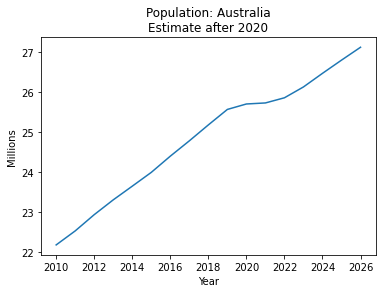

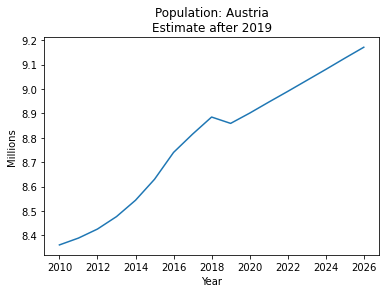

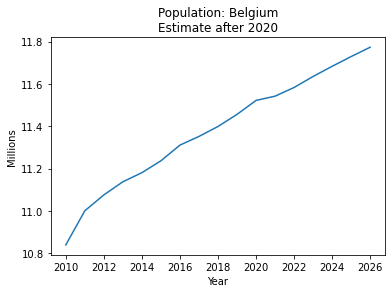

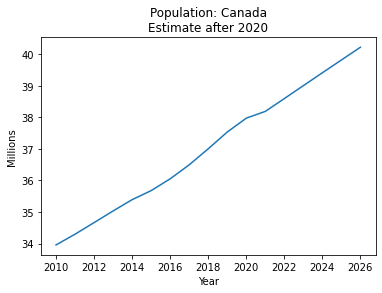

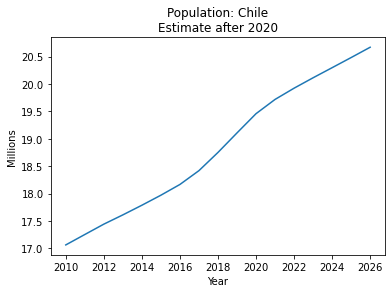

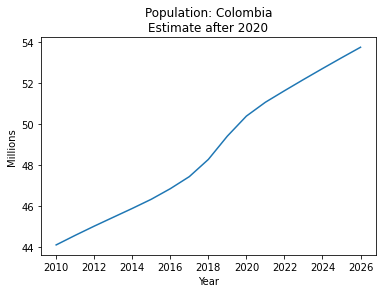

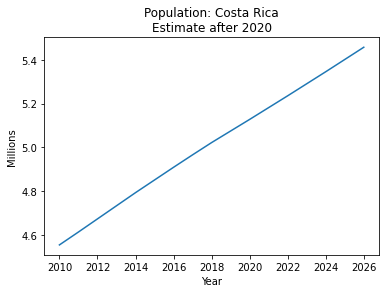

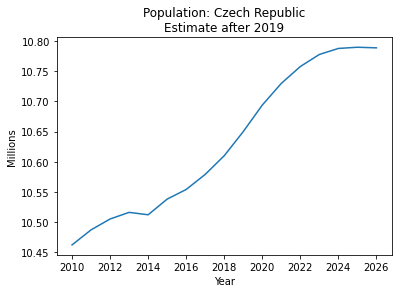

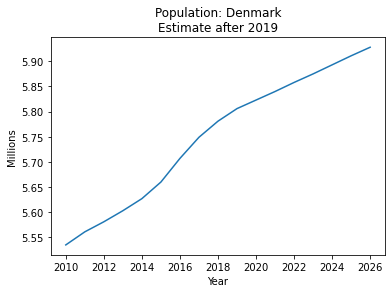

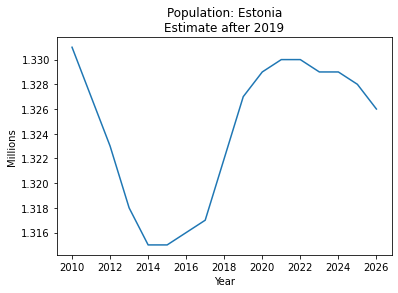

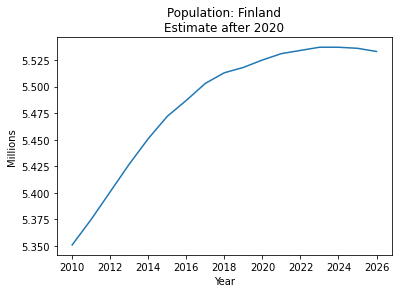

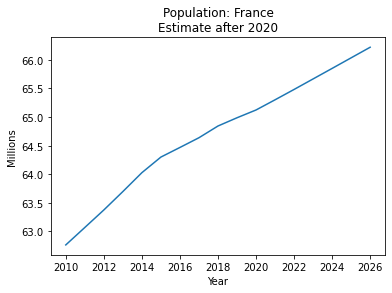

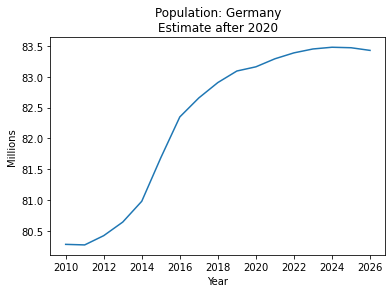

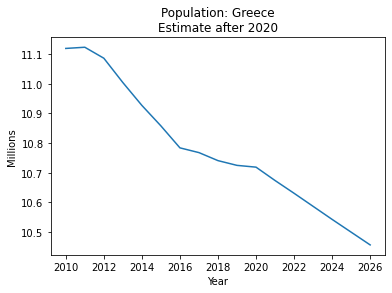

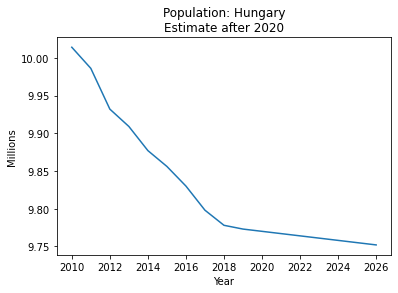

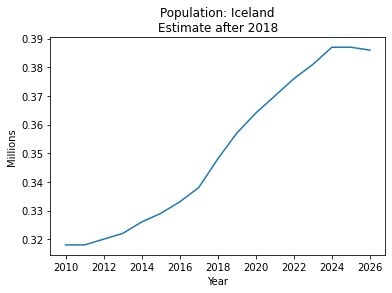

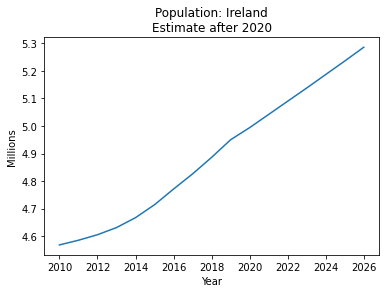

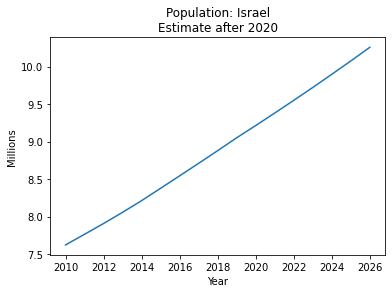

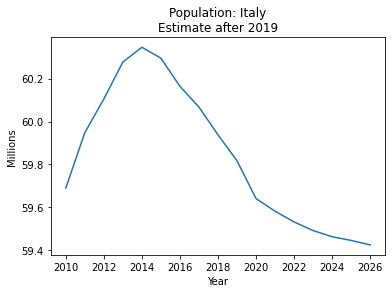

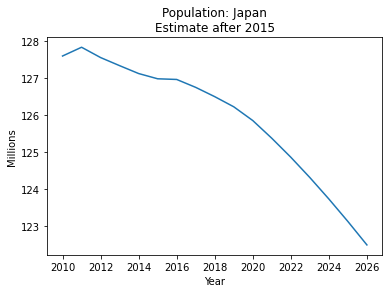

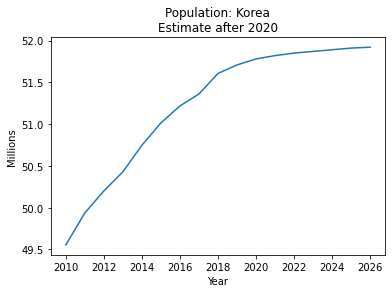

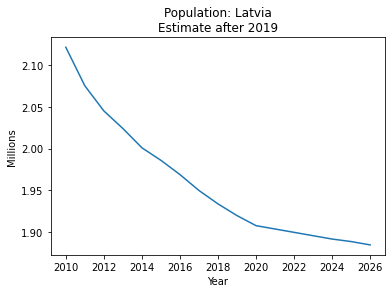

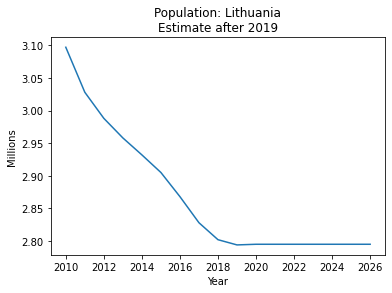

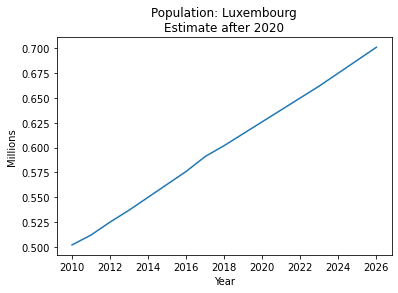

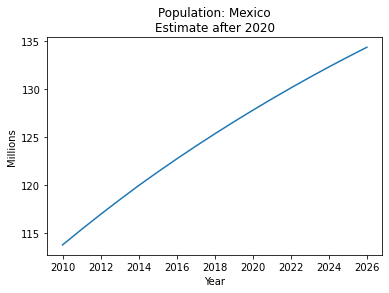

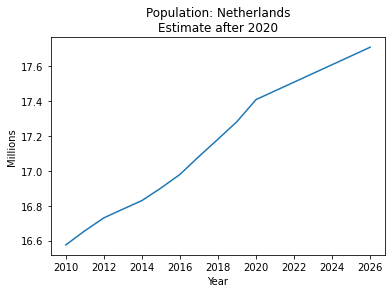

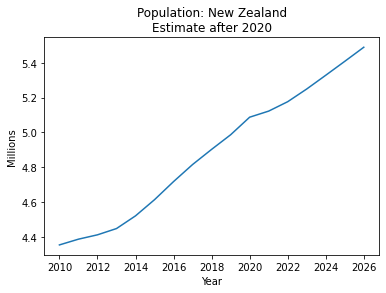

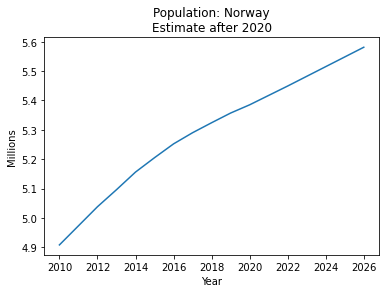

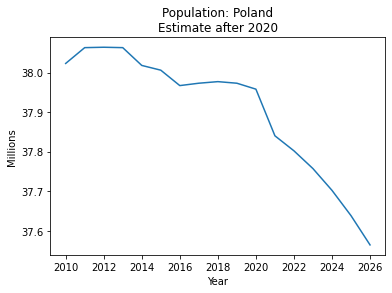

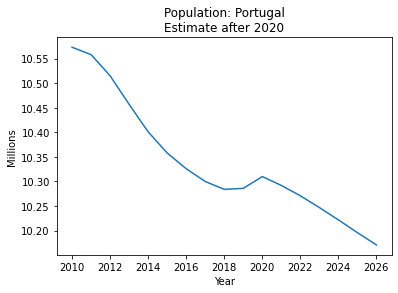

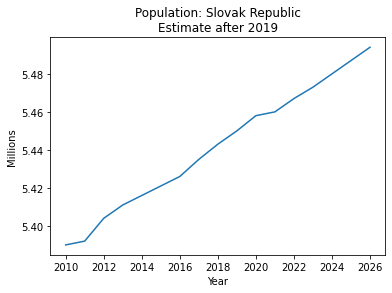

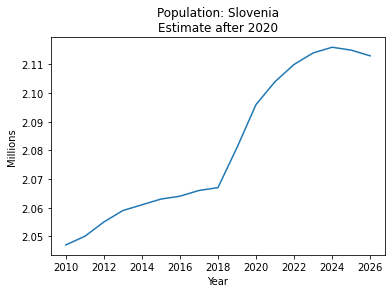

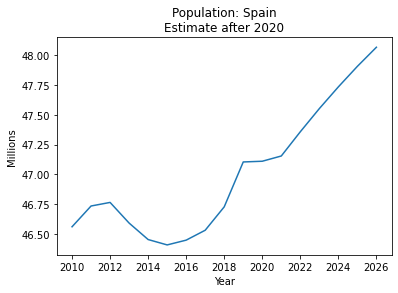

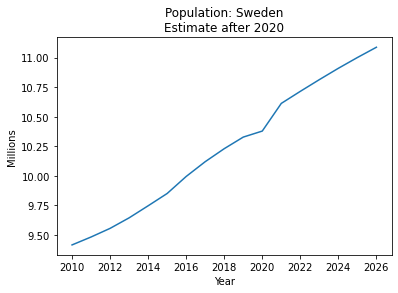

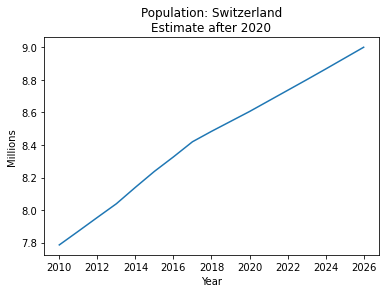

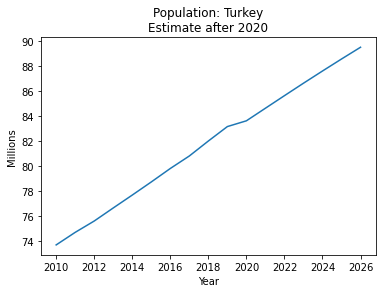

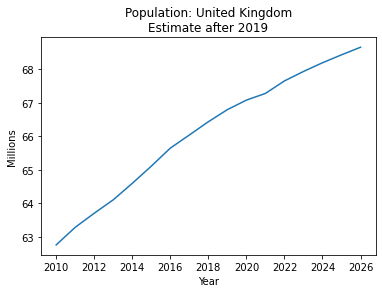

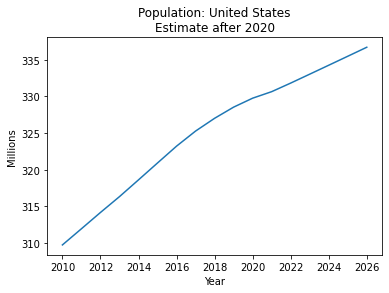

In [18]:
# Itterating through a loop to plot each country population trend over the last 10 years and also estimated population until 2026
import os
import matplotlib.pyplot as plt

os.makedirs('graphs', exist_ok=True)

for country in OECD_pop_clean.columns:
    estimate = int(OECD_pop_raw['Estimates Start After'][OECD_pop_raw['Country']==country])
    plt.plot(OECD_pop_clean.index, OECD_pop_clean[country])
    plt.xlabel('Year')
    plt.ylabel('Millions')
    plt.title((f'Population: {country}\nEstimate after {estimate}')) 
    save_results_to = 'graphs/'
    plt.savefig(f'{save_results_to}{country}.png') #saving each country graph as a 'png' file with name of each country
    plt.show()

### - Padalinkite šalis į 5 klasterius pagal GDP ir "Volume of exports of goods".

In [19]:
# getting volume of exports of goods data for 2020
volume_data = df[df['Subject Descriptor'] =='Volume of exports of goods'][['Country',2020]]
# dropping all null values
volume_data = volume_data.dropna()
# renaming 2020 column to Volume of exports of goods
volume_data.rename(columns= {2020: 'Volume of exports of goods'}, inplace=True)
display(volume_data.shape)
display(volume_data.head())

(177, 2)

Country Volume of exports of goods
24           Afghanistan                    -16.606
69               Albania                     -2.127
114              Algeria                     -9.322
204               Angola                     -6.421
249  Antigua and Barbuda                    -33.053

In [20]:
# getting GDP data in dollars for 2020 and dropping null values
gdp_data = df[(df['Subject Descriptor'] =='Gross domestic product per capita, current prices')&(df['Units']=='U.S. dollars')][['Country',2020]]
gdp_data = gdp_data.dropna()
# renaming 2020 column to GDP
gdp_data.rename(columns= {2020: 'GDP'}, inplace=True)
display(gdp_data.shape)
display(gdp_data.head())

(195, 2)

Country       GDP
9    Afghanistan   611.268
54       Albania   5152.56
99       Algeria   3337.32
144      Andorra  36630.55
189       Angola    1881.2

In [21]:
# merging 2 dataframes and leaving out countries that don't have GDP or Volume of exports of goods in 2020
gdp_vol_data = gdp_data.merge(volume_data, on='Country')
# changing data types of numeric values from object to float
gdp_vol_data[['GDP', 'Volume of exports of goods']] = gdp_vol_data[['GDP', 'Volume of exports of goods']].astype(float)
gdp_vol_data.head()

Country        GDP  Volume of exports of goods
0          Afghanistan    611.268                     -16.606
1              Albania   5152.560                      -2.127
2              Algeria   3337.320                      -9.322
3               Angola   1881.200                      -6.421
4  Antigua and Barbuda  13967.330                     -33.053

In [22]:
# Scaling data with StandardScaler z = (x - u) / s 
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gdp_vol_data[['GDP', 'Volume of exports of goods']])
pd.DataFrame(scaled_data)

0         1
0   -0.685835 -0.485473
1   -0.449450  0.224523
2   -0.543938 -0.128293
3   -0.619732  0.013961
4    0.009379 -1.291972
..        ...       ...
172 -0.534298  0.744650
173 -0.558865  0.208194
174 -0.687451  0.270225
175 -0.664395  0.777848
176 -0.642520 -1.041789

[177 rows x 2 columns]

In [23]:
# Scaling data with normalize (x- min) / (max - min)
from sklearn.preprocessing import normalize
normalized_data = pd.DataFrame(normalize(gdp_vol_data[['GDP', 'Volume of exports of goods']]))

In [24]:
# clusters with scaled_data
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(scaled_data)
km.labels_
gdp_vol_data['clusters_scaled'] = km.labels_

# clusters with normalized_data
km = KMeans(n_clusters=5)
km.fit(normalized_data)
km.labels_
gdp_vol_data['clusters_normalized'] = km.labels_

In [25]:
gdp_vol_data.clusters_scaled.value_counts()

2    92
1    47
4    29
0     8
3     1
Name: clusters_scaled, dtype: int64

In [26]:
gdp_vol_data.clusters_normalized.value_counts()

0    140
3     18
4      9
1      7
2      3
Name: clusters_normalized, dtype: int64

### - Nubraižykite klasterius (GDP x-ašis ir Volume y-ašis).
### - Pažymėkite top 5 šalis pagal GDP kiekviename klasteryje ir pridėkite tekstinį žymeklį.

In [27]:
# getting top countries of each group of clusters and using scaled data with StandardScaler
top5_countries = gdp_vol_data.groupby(['clusters_scaled']).apply(lambda x: x.nlargest(5, ['GDP'])).reset_index(drop=True)
top5_countries

Country        GDP  Volume of exports of goods  \
0            Luxembourg  116921.11                     -10.753   
1           Switzerland   87366.60                      -3.030   
2               Ireland   85205.50                      16.461   
3                Norway   67326.07                       4.215   
4         United States   63358.49                     -10.162   
5           The Bahamas   25734.16                     -47.586   
6               Uruguay   16023.35                     -14.891   
7   Trinidad and Tobago   15424.82                     -23.543   
8              Barbados   15346.28                     -17.871   
9                 Palau   14731.70                     -54.975   
10         Saudi Arabia   19995.70                      -5.112   
11      Slovak Republic   19144.92                      -5.772   
12               Greece   17657.10                      -4.703   
13               Latvia   17549.30                      -2.726   
14  St. Kitts and Nevis   17173.24                      -7.104   
15               Guyana    6952.70                     183.342   
16                Qatar   54184.97                      -3.853   
17            Australia   52905.40                      -4.405   
18          Netherlands   52456.09                      -1.817   
19               Sweden   52129.13                      -0.937   
20              Finland   48786.03                      -2.415   

    clusters_scaled  clusters_normalized  
0                 0                    0  
1                 0                    0  
2                 0                    0  
3                 0                    0  
4                 0                    0  
5                 1                    0  
6                 1                    0  
7                 1                    0  
8                 1                    0  
9                 1                    0  
10                2                    0  
11                2                    0  
12                2                    0  
13                2                    0  
14                2                    0  
15                3                    4  
16                4                    0  
17                4                    0  
18                4                    0  
19                4                    0  
20                4                    0

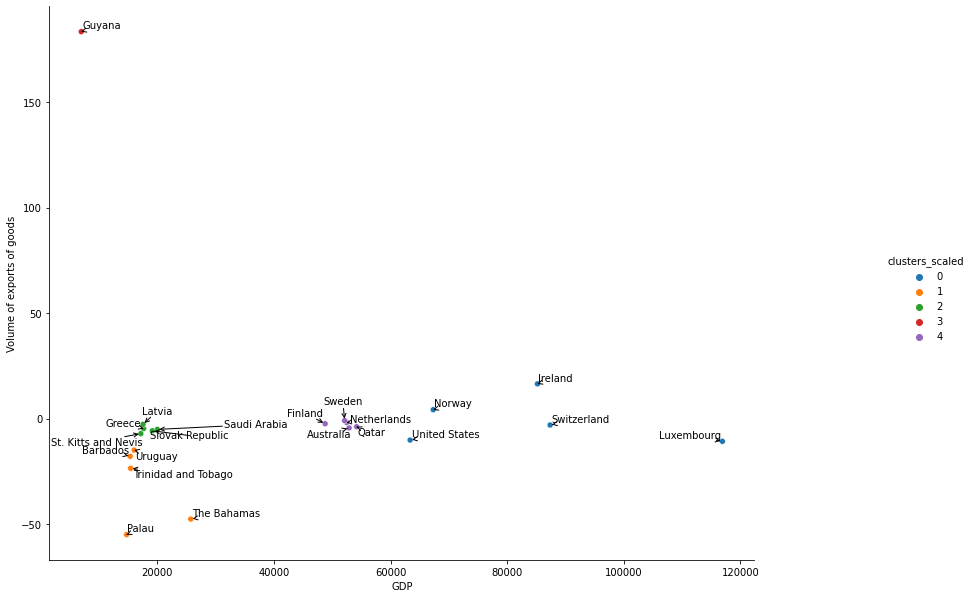

In [28]:
# plotting each group of clusters and adding country annotations to each point 

import seaborn as sns
from adjustText import adjust_text

f = sns.relplot(x=top5_countries['GDP'], y =top5_countries['Volume of exports of goods'], hue = 'clusters_scaled', data=top5_countries, height=5, palette='tab10')
f.fig.set_size_inches(15,9)
texts = [plt.text(top5_countries.GDP[i], top5_countries['Volume of exports of goods'][i], top5_countries.Country[i]) for i in range(0,top5_countries.shape[0])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
   
plt.show()

### - Raskite visas metrikas, kurios nėra tuščios 2015 metų duomenyse.

In [29]:
# Checking how many values are non null in year 2015 column
metrics_2015 = df[df[2015].isnull()==False]
print(f'Shape of full dataframe:{df.shape}')
print(f'Shape of dataframe with non null values in 2015: {metrics_2015.shape}')

Shape of full dataframe:(8820, 37)
Shape of dataframe with non null values in 2015: (7588, 37)


In [30]:
#Checking how many unique metrics are in 2015:
unique_metrics_2015 = sorted(metrics_2015['Subject Descriptor'].unique())
unique_metrics_2015

['Current account balance',
 'Employment',
 'General government gross debt',
 'General government net debt',
 'General government net lending/borrowing',
 'General government primary net lending/borrowing',
 'General government revenue',
 'General government structural balance',
 'General government total expenditure',
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
 'Gross domestic product corresponding to fiscal year, current prices',
 'Gross domestic product per capita, constant prices',
 'Gross domestic product per capita, current prices',
 'Gross domestic product, constant prices',
 'Gross domestic product, current prices',
 'Gross domestic product, deflator',
 'Gross national savings',
 'Implied PPP conversion rate',
 'Inflation, average consumer prices',
 'Inflation, end of period consumer prices',
 'Output gap in percent of potential GDP',
 'Population',
 'Six-month London interbank offered rate (LIBOR)',
 'Total investment',
 'Unemploymen

## • Modelio kūrimas

### - Naudodamiesi scikit-learn biblioteka sukurkite modelį, kuris leistų prognozuoti šalies GDP per capita reikšmę.

### Data selection and cleaning
#### Using European Union and NATO countries datasets

In [31]:
# Getting list of EU countries
import requests
link = 'https://worldpopulationreview.com/country-rankings/european-union-countries'
html = requests.get(link).content
EU_data = pd.read_html(html)

#Cleaning the data to show only Country information
EU_data = EU_data[-1]
EU_data = EU_data.drop(EU_data.columns[1:], axis=1)

# Getting list of NATO countries
link = 'https://worldpopulationreview.com/country-rankings/nato-countries'
html = requests.get(link).content
NATO_data = pd.read_html(html)

#Cleaning the data to show only Country information
NATO_data = NATO_data[-1]
NATO_data = NATO_data.drop(NATO_data.columns[1:], axis=1)

In [32]:
# Countries in NATO list but not in EU
just_nato_countries = list(set(NATO_data['Country']) - (set(EU_data['Country'])))
just_nato_countries

['Montenegro',
 'Iceland',
 'United States',
 'Turkey',
 'Canada',
 'North Macedonia',
 'Norway',
 'Albania',
 'United Kingdom']

In [33]:
# Countries in EU list but not in NATO
just_eu_countries = list(set(EU_data['Country']) - (set(NATO_data['Country'])))
just_eu_countries

['Ireland', 'Sweden', 'Austria', 'Malta', 'Finland', 'Cyprus']

In [34]:
# In the main dataframe concatinating Subject Descriptor with Units and Scale for better readability on the metric
import numpy as np

def concat(*args):
    strs = [str(arg) for arg in args if not pd.isnull(arg)]
    return ' | '.join(strs) if strs else np.nan
np_concat = np.vectorize(concat)

df['Metric']= np_concat(df['Subject Descriptor'], df['Units'], df['Scale'])
# dropping irrelevant columns 
df_clean = df.drop(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Subject Notes',
              'Country/Series-specific Notes', 'Subject Descriptor', 'Units', 'Scale', 'Estimates Start After'], axis=1)

In [35]:
# For EU countries checking if there are countries whose estimates start before 2019
test = df[['Country','Metric', 'Estimates Start After']].merge(EU_data, on='Country')
test[test['Estimates Start After']<2019]

Empty DataFrame
Columns: [Country, Metric, Estimates Start After]
Index: []

In [36]:
# For NATO countries checking if there are countries whose estimates start before 2019
test = df[['Country','Metric', 'Estimates Start After']].merge(NATO_data, on='Country')
test[test['Estimates Start After']<2019]

Country                                             Metric  \
546  Iceland  Gross domestic product per capita, constant pr...   
547  Iceland  Gross domestic product per capita, constant pr...   
548  Iceland  Gross domestic product per capita, current pri...   
549  Iceland  Gross domestic product per capita, current pri...   
550  Iceland  Gross domestic product per capita, current pri...   
567  Iceland                    Population | Persons | Millions   

     Estimates Start After  
546                 2018.0  
547                 2018.0  
548                 2018.0  
549                 2018.0  
550                 2018.0  
567                 2018.0

In [37]:
# Changing the structure of the dataframe to show values by country, year and each metric
df_melted = df_clean.melt(id_vars=['Country','Metric'], var_name='Year').pivot(index=['Country','Year'], columns='Metric',values='value').reset_index()
# renaming axis to remove previous column name "Metric"
df_melted_1 = df_melted.rename_axis(None,axis=1)

# Filtering only years until 2019 as it's the last year when most countries had actual data
df_melted_2 = df_melted_1[df_melted_1['Year']<2020]

# Changing data types of numeric columns
df_melted_2.iloc[:, 2:] = df_melted_2.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

c:\users\a112917\onedrive - amerisourcebergen(abc)\desktop\draft\data_science_courses\ml_project\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\a112917\AppData\Local\Temp\ipykernel_9028\3284534874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_2.iloc[:, 2:] = df_melted_2.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')


In [38]:
# Merging EU countries to only show their data
df_eu = df_melted_2.merge(EU_data, on='Country')
df_eu

Country  Year  Current account balance | Percent of GDP  \
0    Austria  2000                                    -0.706   
1    Austria  2001                                    -0.796   
2    Austria  2002                                     2.102   
3    Austria  2003                                     1.548   
4    Austria  2004                                     2.076   
..       ...   ...                                       ...   
515   Sweden  2015                                     3.314   
516   Sweden  2016                                     2.390   
517   Sweden  2017                                     2.951   
518   Sweden  2018                                     2.634   
519   Sweden  2019                                     5.462   

     Current account balance | U.S. dollars | Billions  \
0                                               -1.393   
1                                               -1.573   
2                                                4.504   
3                                                4.060   
4                                                6.255   
..                                                 ...   
515                                             16.740   
516                                             12.322   
517                                             15.967   
518                                             14.633   
519                                             29.159   

     Employment | Persons | Millions  \
0                              3.635   
1                              3.652   
2                              3.660   
3                              3.695   
4                              3.711   
..                               ...   
515                            4.837   
516                            4.910   
517                            5.022   
518                            5.097   
519                            5.126   

     General government gross debt | National currency | Billions  \
0                                              140.420              
1                                              146.328              
2                                              151.862              
3                                              150.470              
4                                              157.160              
..                                                 ...              
515                                           1863.470              
516                                           1865.590              
517                                           1883.820              
518                                           1878.590              
519                                           1760.950              

     General government gross debt | Percent of GDP  \
0                                            65.738   
1                                            66.355   
2                                            66.978   
3                                            64.896   
4                                            64.849   
..                                              ...   
515                                          43.739   
516                                          42.255   
517                                          40.730   
518                                          38.908   
519                                          34.873   

     General government net debt | National currency | Billions  \
0                                               93.415            
1                                               93.232            
2                                              100.305            
3                                               98.984            
4                                              111.959            
..                                                 ...            
515                                            475.450            
516                             

In [39]:
# Merging NATO countries to only show their data
df_nato = df_melted_2.merge(NATO_data, on='Country')

In [40]:
df_nato

Country  Year  Current account balance | Percent of GDP  \
0          Albania  2000                                    -7.070   
1          Albania  2001                                    -6.315   
2          Albania  2002                                   -10.179   
3          Albania  2003                                    -7.695   
4          Albania  2004                                    -5.849   
..             ...   ...                                       ...   
575  United States  2015                                    -2.246   
576  United States  2016                                    -2.127   
577  United States  2017                                    -1.857   
578  United States  2018                                    -2.135   
579  United States  2019                                    -2.209   

     Current account balance | U.S. dollars | Billions  \
0                                               -0.246   
1                                               -0.248   
2                                               -0.443   
3                                               -0.432   
4                                               -0.420   
..                                                 ...   
575                                           -408.888   
576                                           -397.570   
577                                           -361.705   
578                                           -438.235   
579                                           -472.146   

     Employment | Persons | Millions  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
..                               ...   
575                          148.845   
576                          151.436   
577                          153.335   
578                          155.759   
579                          157.536   

     General government gross debt | National currency | Billions  \
0                                              319.608              
1                                              341.522              
2                                              391.308              
3                                              408.300              
4                                              423.962              
..                                                 ...              
575                                          19093.850              
576                                          19990.160              
577                                          20645.220              
578                                          21976.100              
579                                          23181.390              

     General government gross debt | Percent of GDP  \
0                                            63.769   
1                                            60.613   
2                                            64.097   
3                                            60.245   
4                                            57.474   
..                                              ...   
575                                         104.877   
576                                         106.927   
577                                         105.984   
578                                         107.059   
579                                         108.463   

     General government net debt | National currency | Billions  \
0                                                  NaN            
1                                                  NaN            
2                                                  NaN            
3                                                  NaN            
4                                                  NaN            
..                                                 ...            
575                              

In [41]:
# Checking number of null values in EU data
df_eu.isna().sum()

Country                                                                                                              0
Year                                                                                                                 0
Current account balance | Percent of GDP                                                                             1
Current account balance | U.S. dollars | Billions                                                                    1
Employment | Persons | Millions                                                                                    100
General government gross debt | National currency | Billions                                                         0
General government gross debt | Percent of GDP                                                                       0
General government net debt | National currency | Billions                                                          34
General government net debt | Percent of GDP    

In [42]:
# Checking number of null values in NATO data
df_nato.isna().sum()

Country                                                                                                              0
Year                                                                                                                 0
Current account balance | Percent of GDP                                                                             2
Current account balance | U.S. dollars | Billions                                                                    2
Employment | Persons | Millions                                                                                    180
General government gross debt | National currency | Billions                                                         3
General government gross debt | Percent of GDP                                                                       3
General government net debt | National currency | Billions                                                          62
General government net debt | Percent of GDP    

## Selecting Features

### EU Data

In [43]:
y = df_eu['Gross domestic product per capita, current prices | U.S. dollars | Units']

In [44]:
# Creating function to plot dependacny of GDP vs features  

def plot_with_trend(df, y_value, y_name, X_value, hue):
    for i in X_value:
        sns.scatterplot(y=df[i],
                        x=df[y_value],
                        hue=df[hue]).set(title=f'"{y_name}" vs "{i}"')
        # Fit a linear trend line
        z = np.polyfit(df[y_value], df[i], 1)
        p = np.poly1d(z)
        plt.plot(df[y_value],p(df[y_value]),"r")
        
        plt.legend(bbox_to_anchor=(1.1, 1), loc=2)
        plt.show()

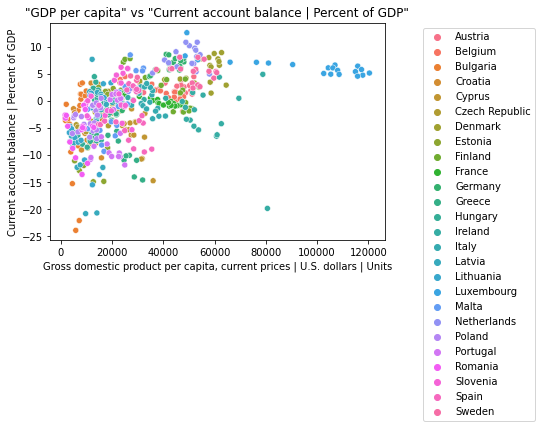

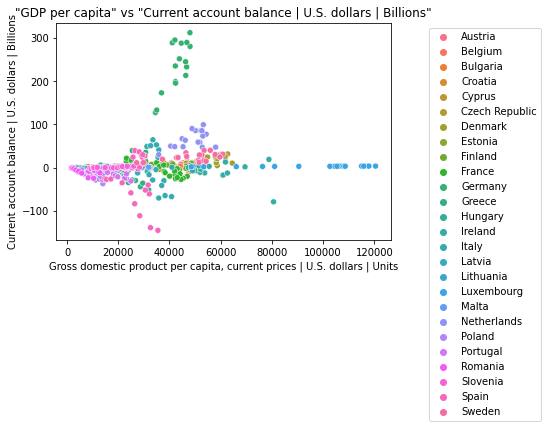

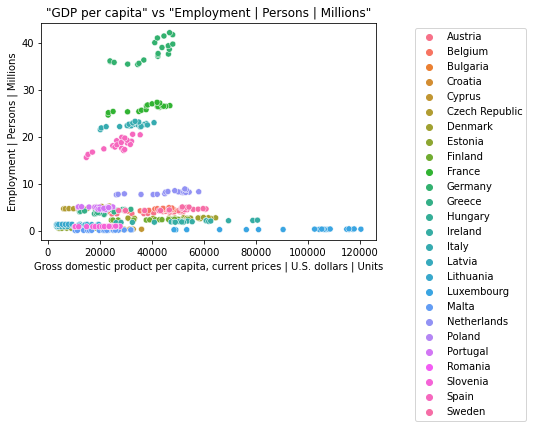

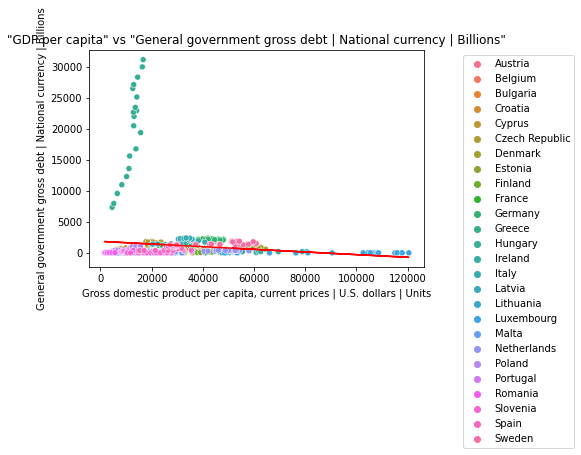

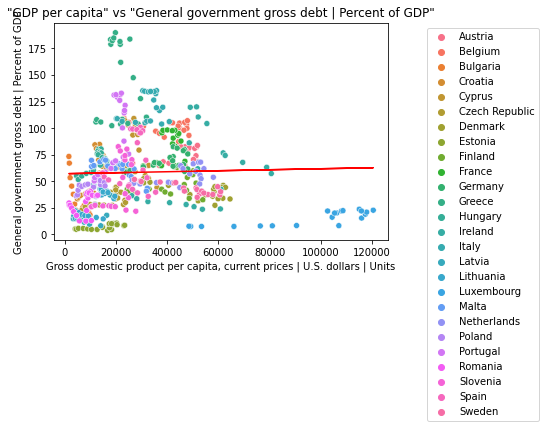

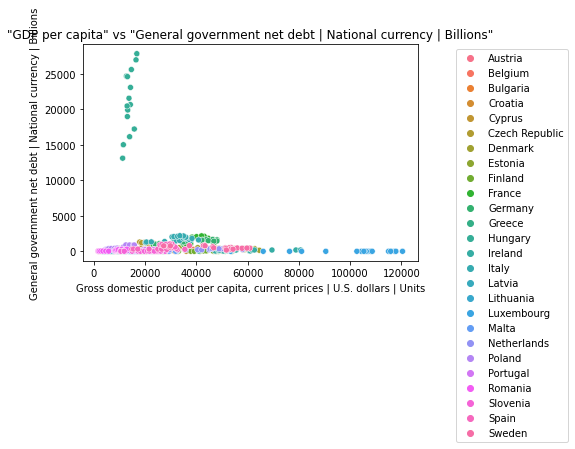

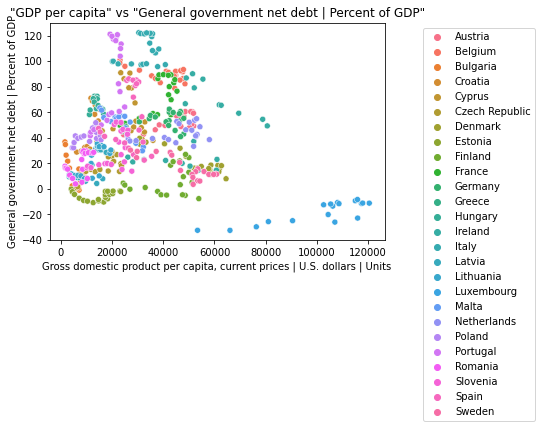

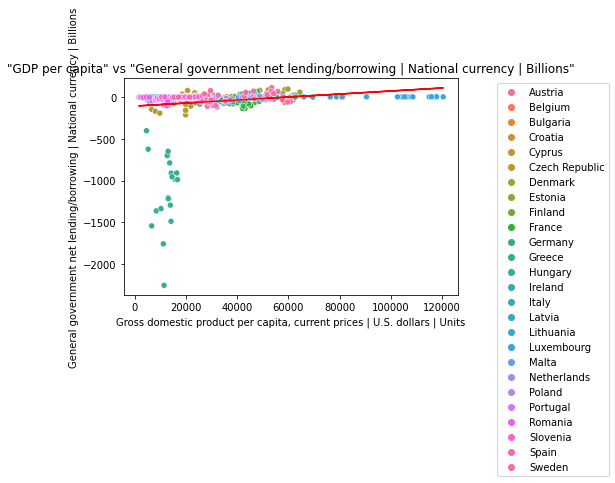

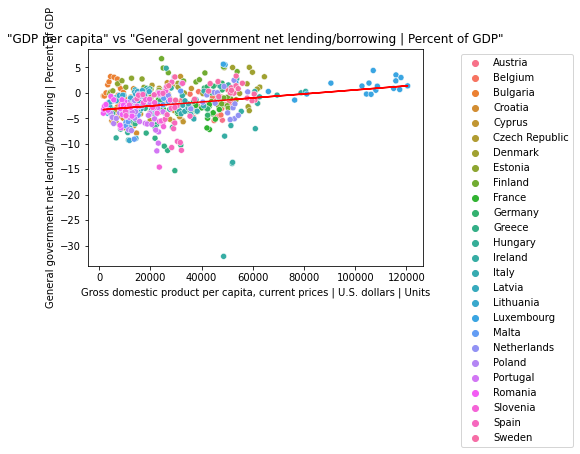

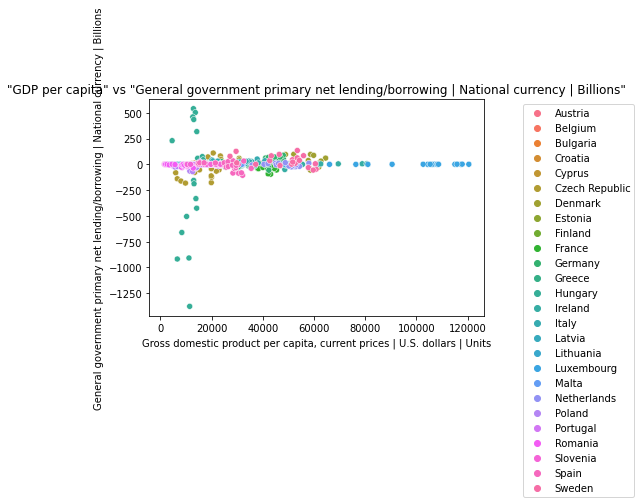

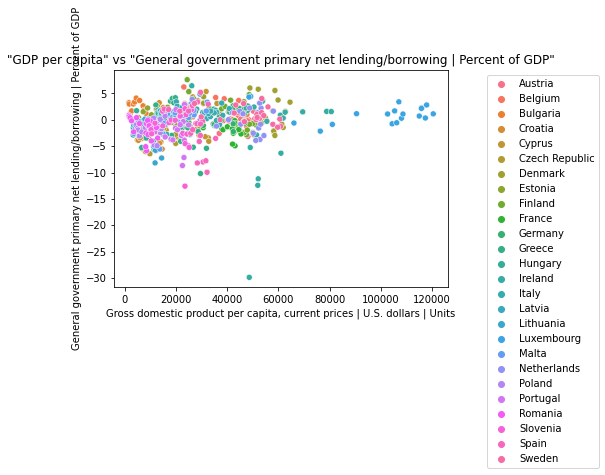

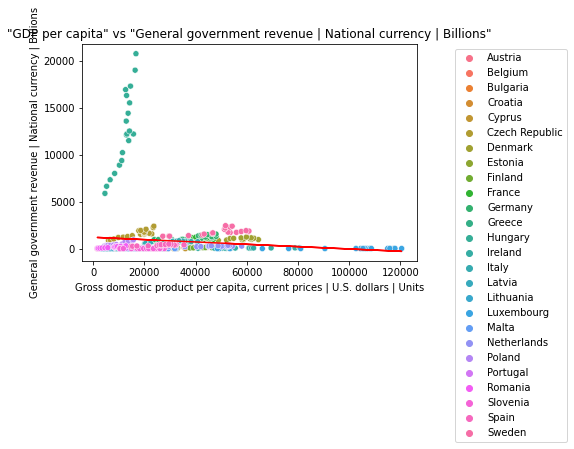

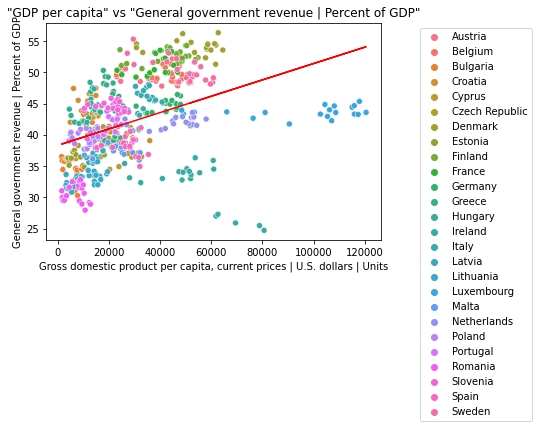

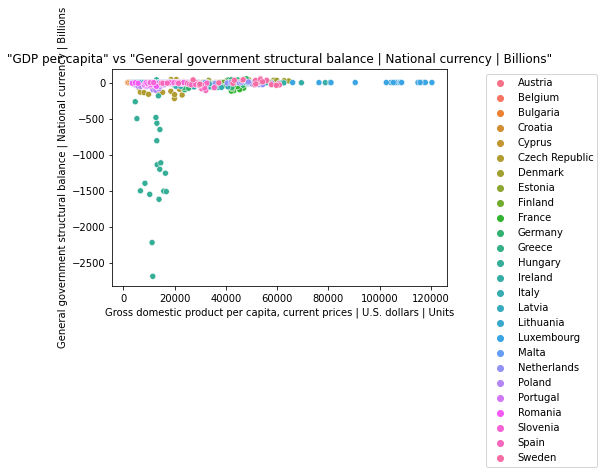

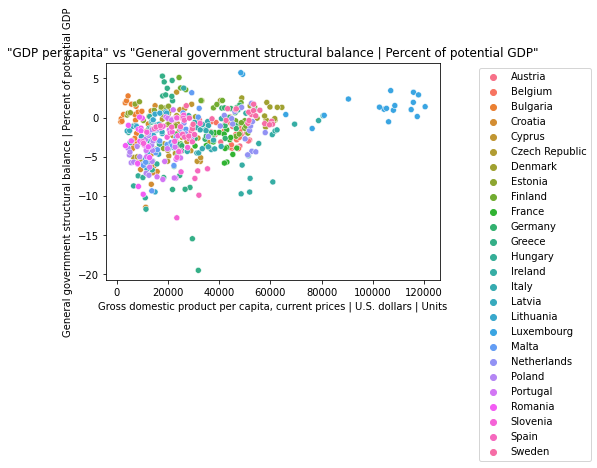

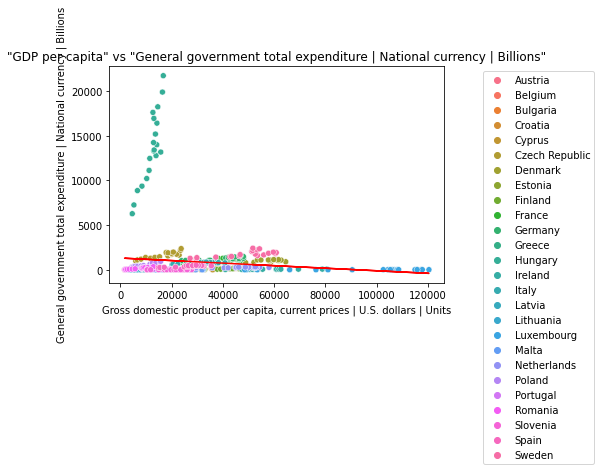

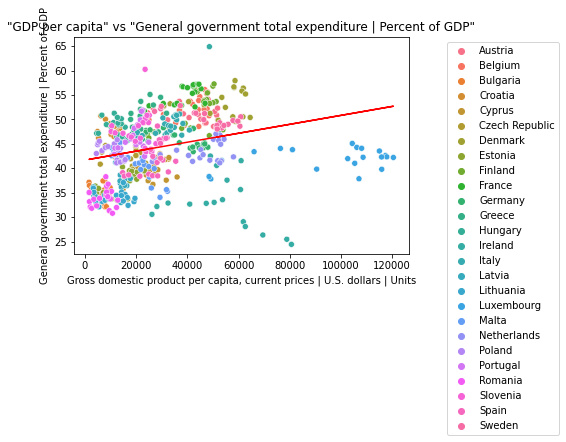

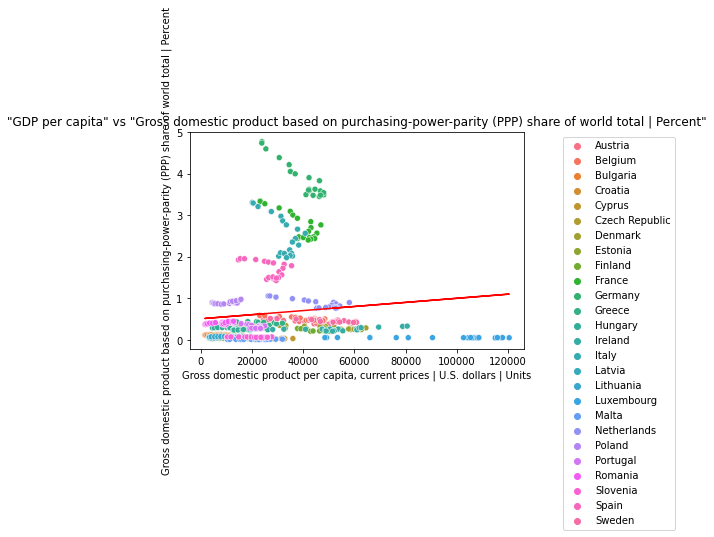

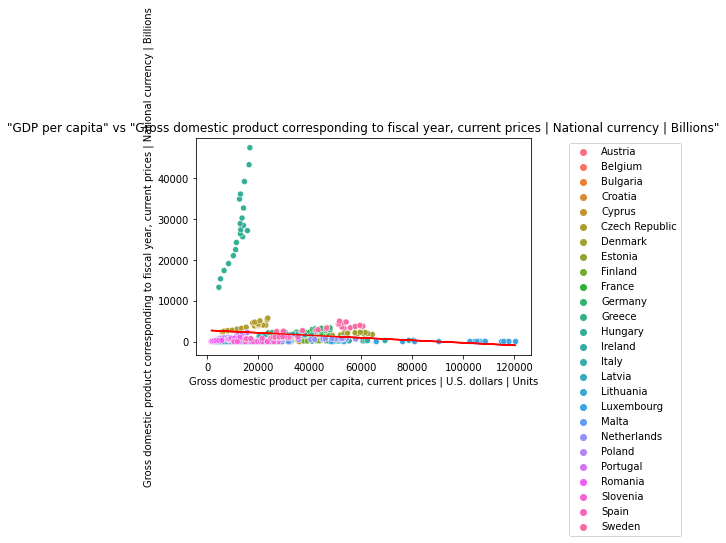

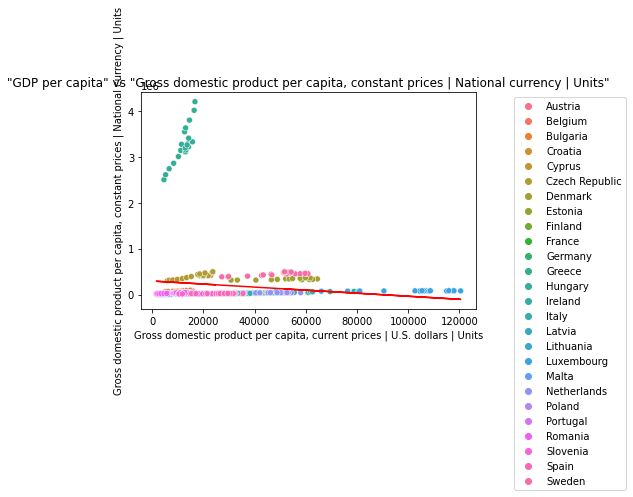

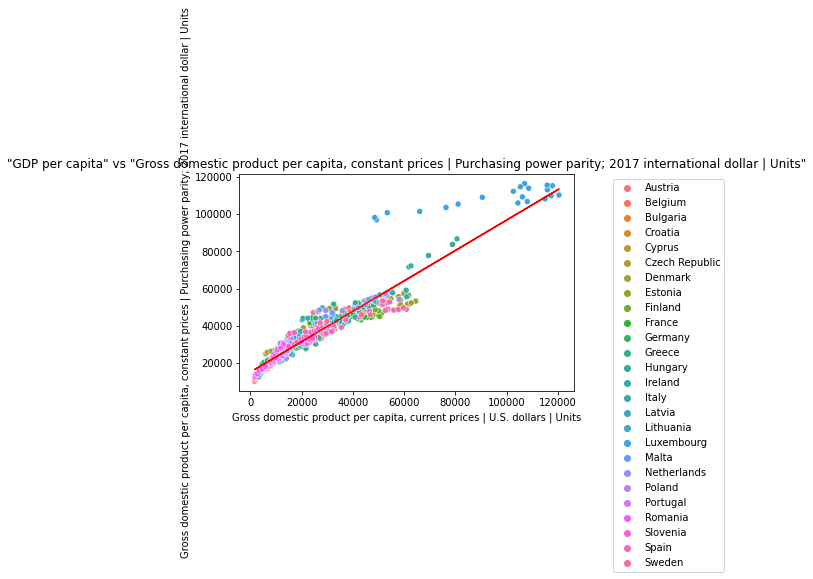

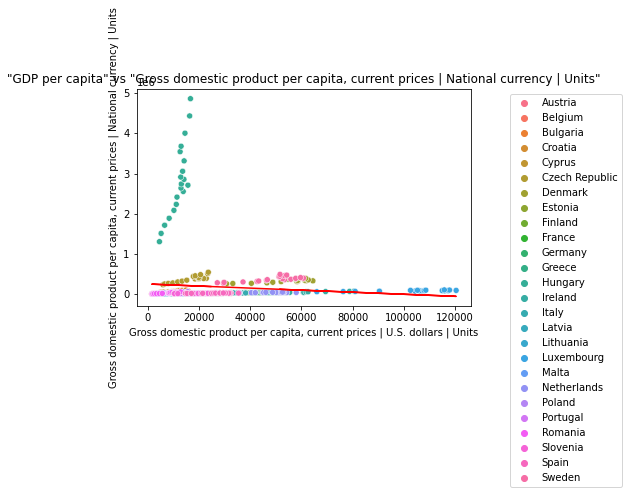

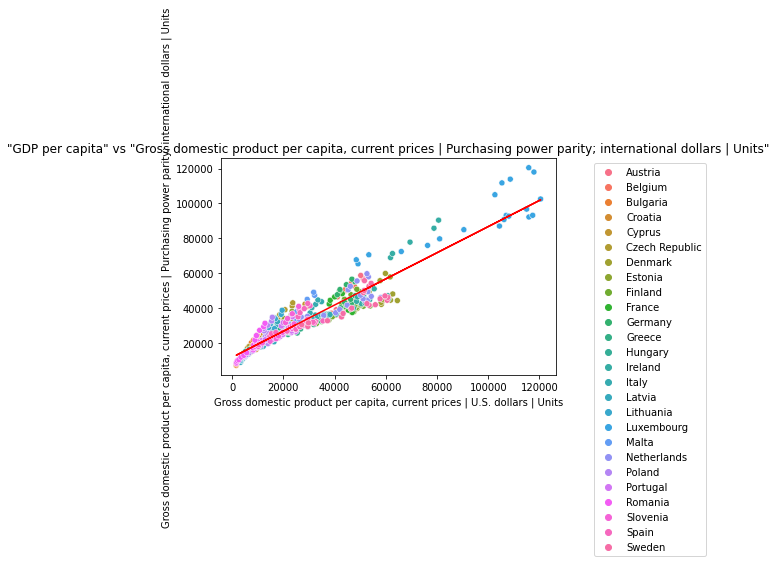

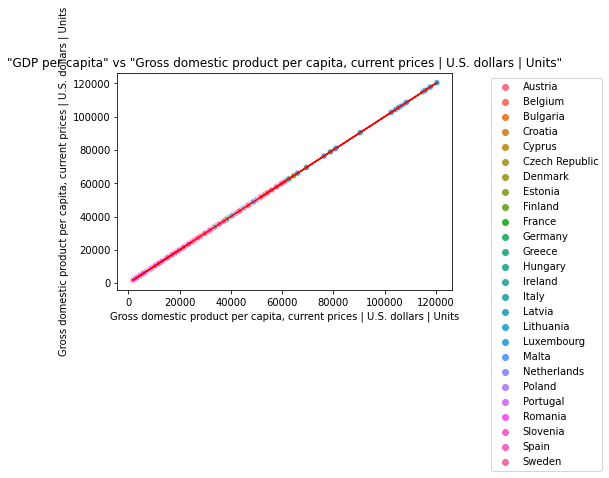

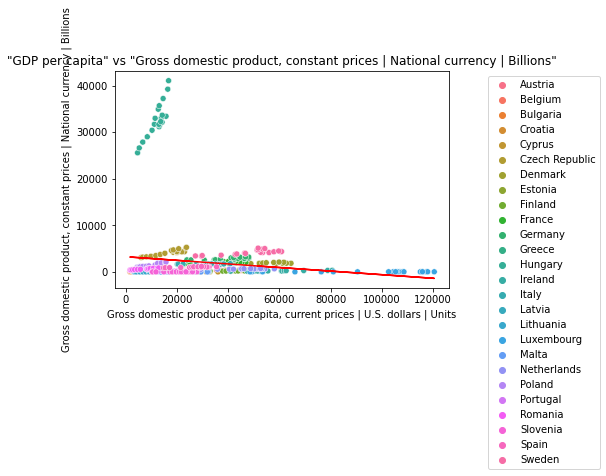

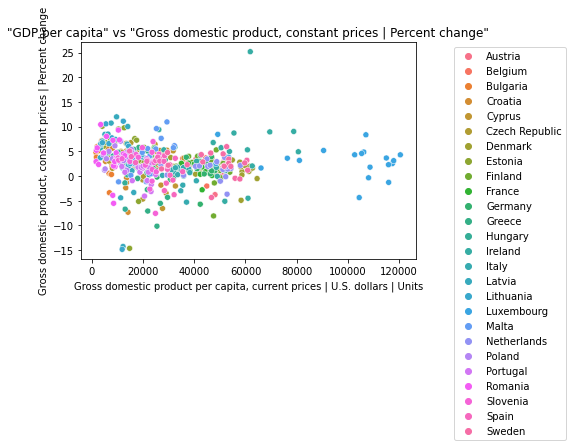

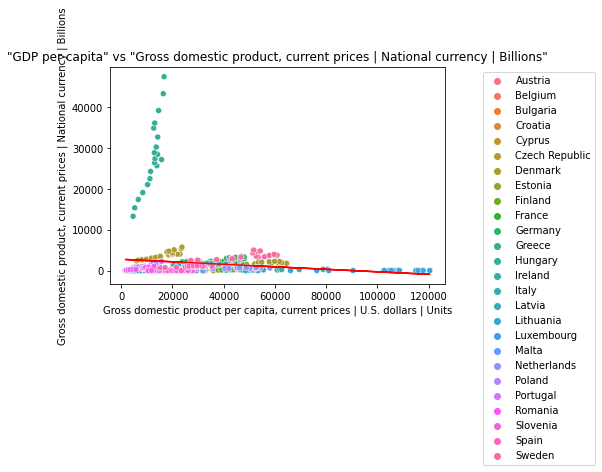

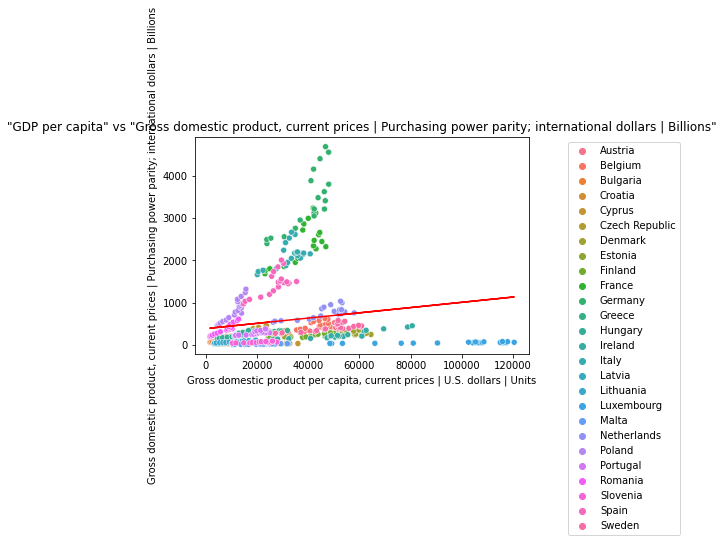

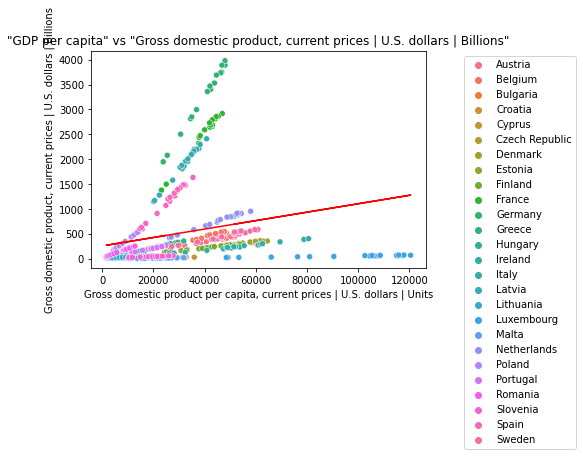

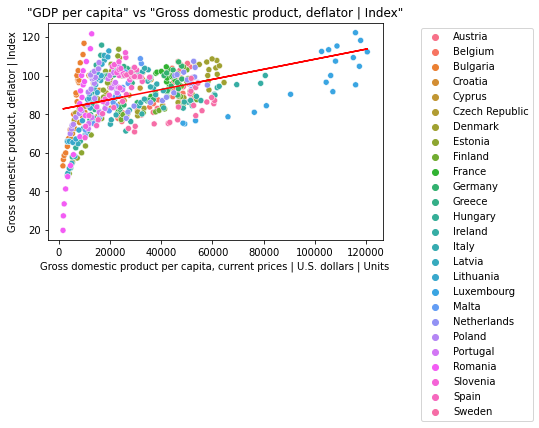

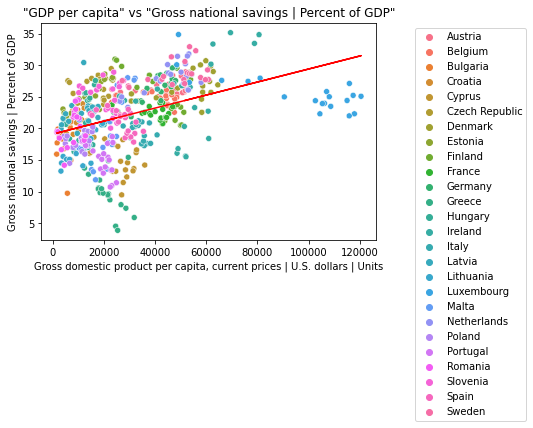

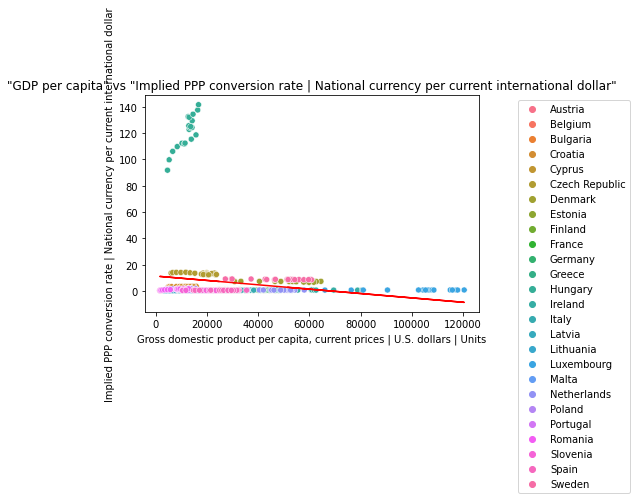

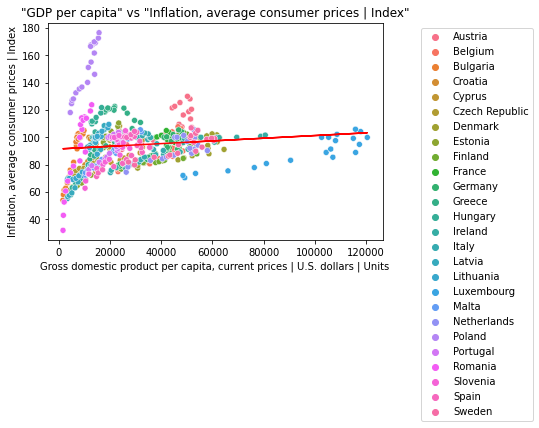

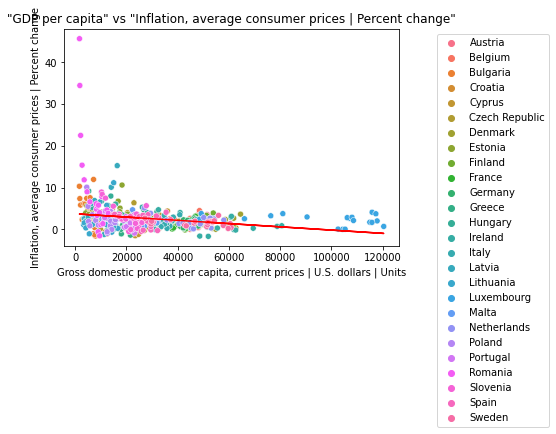

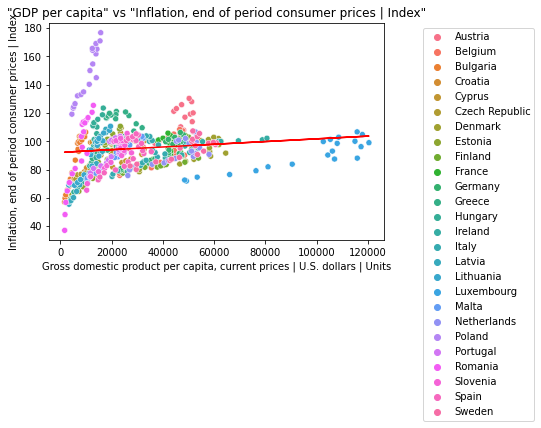

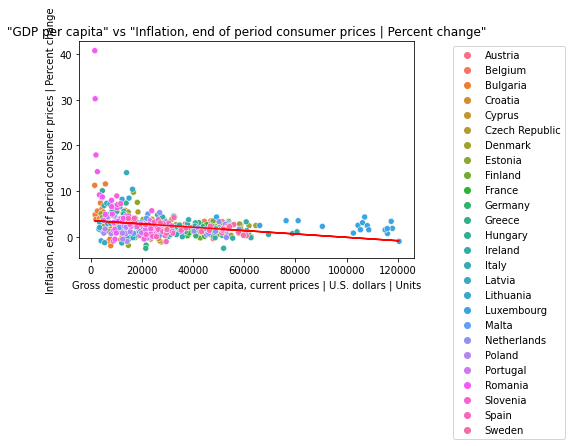

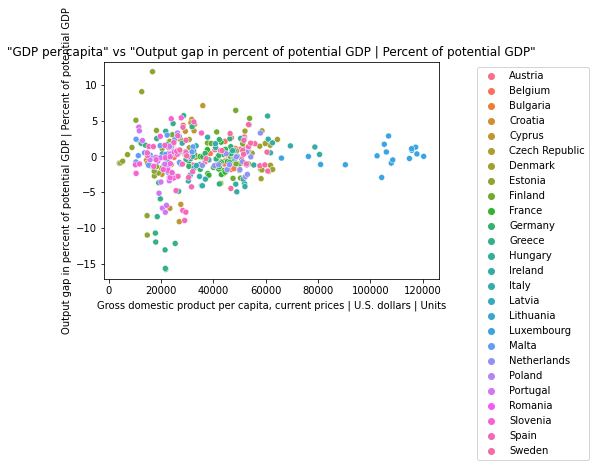

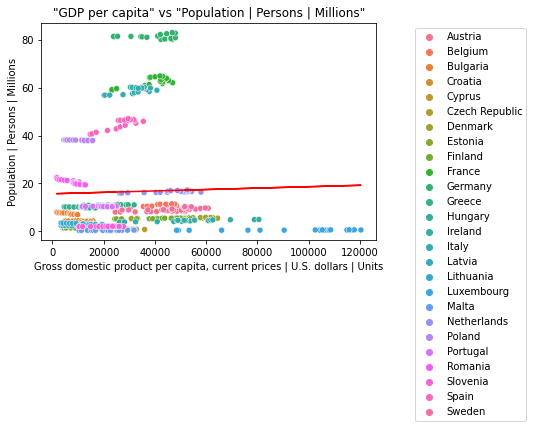

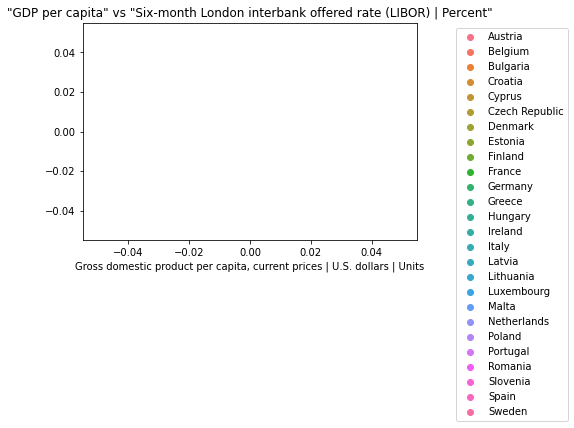

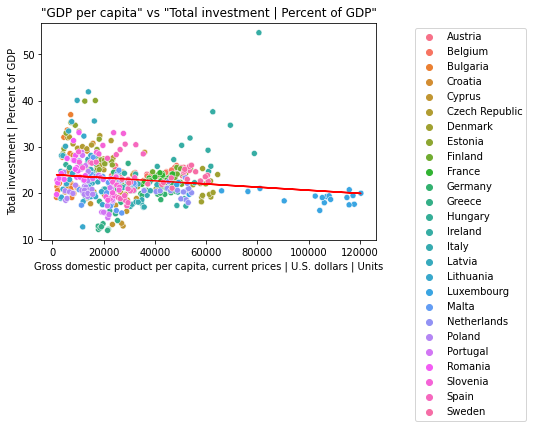

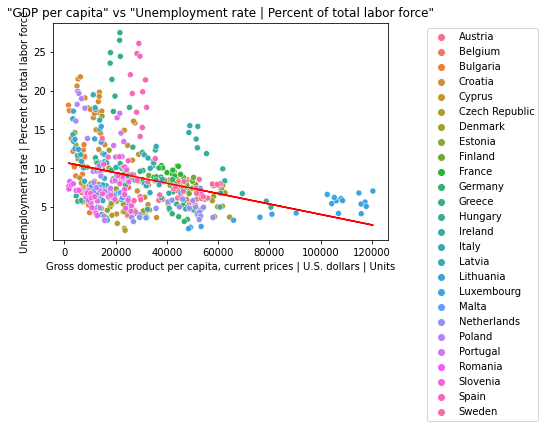

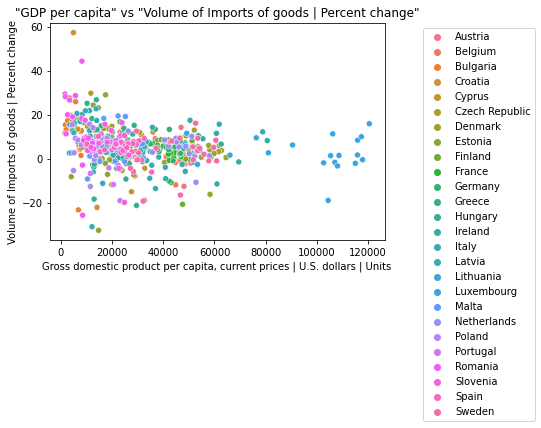

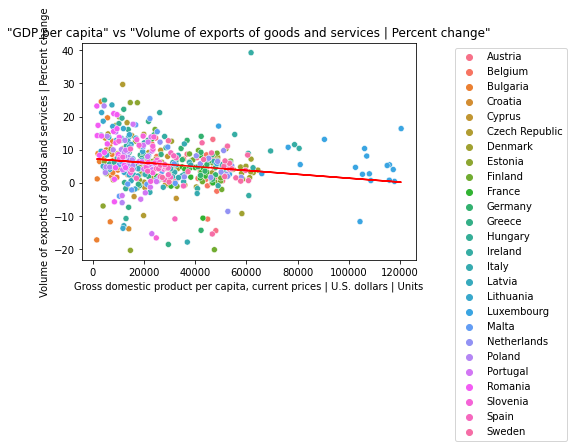

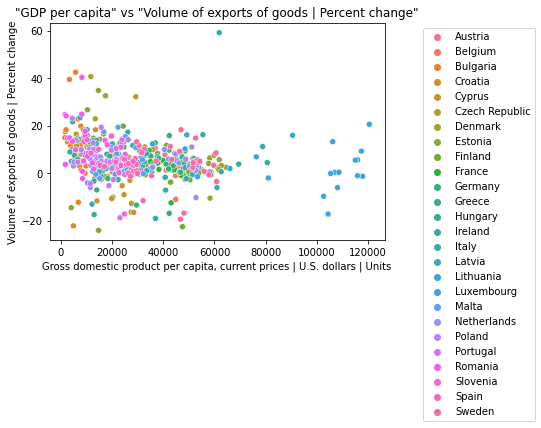

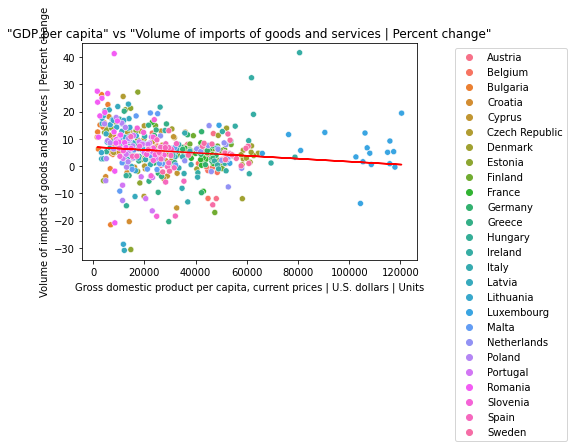

In [45]:
# plotting dependency of GDP vs all features
plot_with_trend(df=df_eu,
               y_value='Gross domestic product per capita, current prices | U.S. dollars | Units',
               y_name = 'GDP per capita',
               X_value = list(df_eu.columns)[2:],
               hue = 'Country')

### Dropping features which don't have a dependancy vs GDP and also dropping all GDP indicators except for the main one (GDP per capita, current prices, US dollars)

In [46]:
ols_eu = df_eu[['Country', 'Year',
       #'Current account balance | Percent of GDP',
       #'Current account balance | U.S. dollars | Billions',
       #'Employment | Persons | Millions',
       'General government gross debt | National currency | Billions',
       'General government gross debt | Percent of GDP',
       #'General government net debt | National currency | Billions',
       #'General government net debt | Percent of GDP',
       'General government net lending/borrowing | National currency | Billions',
       'General government net lending/borrowing | Percent of GDP',
       #'General government primary net lending/borrowing | National currency | Billions',
       #'General government primary net lending/borrowing | Percent of GDP',
       'General government revenue | National currency | Billions',
       'General government revenue | Percent of GDP',
       #'General government structural balance | National currency | Billions',
       #'General government structural balance | Percent of potential GDP',
       'General government total expenditure | National currency | Billions',
       'General government total expenditure | Percent of GDP',
       #'Gross domestic product based on purchasing-power-parity (PPP) share of world total | Percent',
       #'Gross domestic product corresponding to fiscal year, current prices | National currency | Billions',
       #'Gross domestic product per capita, constant prices | National currency | Units',
       #'Gross domestic product per capita, constant prices | Purchasing power parity; 2017 international dollar | Units',
       #'Gross domestic product per capita, current prices | National currency | Units',
       #'Gross domestic product per capita, current prices | Purchasing power parity; international dollars | Units',
       'Gross domestic product per capita, current prices | U.S. dollars | Units',
       #'Gross domestic product, constant prices | National currency | Billions',
       #'Gross domestic product, constant prices | Percent change',
       #'Gross domestic product, current prices | National currency | Billions',
       #'Gross domestic product, current prices | Purchasing power parity; international dollars | Billions',
       #'Gross domestic product, current prices | U.S. dollars | Billions',
       #'Gross domestic product, deflator | Index',
       'Gross national savings | Percent of GDP',
       'Implied PPP conversion rate | National currency per current international dollar',
       'Inflation, average consumer prices | Index',
       'Inflation, average consumer prices | Percent change',
       'Inflation, end of period consumer prices | Index',
       'Inflation, end of period consumer prices | Percent change',
       #'Output gap in percent of potential GDP | Percent of potential GDP',
       'Population | Persons | Millions',
       #'Six-month London interbank offered rate (LIBOR) | Percent',
       'Total investment | Percent of GDP',
       'Unemployment rate | Percent of total labor force',
       #'Volume of Imports of goods | Percent change',
       'Volume of exports of goods and services | Percent change',
       #'Volume of exports of goods | Percent change',
       'Volume of imports of goods and services | Percent change']]

In [47]:
# setting country and year as index 
ols_eu = ols_eu.set_index(['Country', 'Year'])

In [48]:
ols_eu

General government gross debt | National currency | Billions  \
Country Year                                                                 
Austria 2000                                            140.420              
        2001                                            146.328              
        2002                                            151.862              
        2003                                            150.470              
        2004                                            157.160              
...                                                         ...              
Sweden  2015                                           1863.470              
        2016                                           1865.590              
        2017                                           1883.820              
        2018                                           1878.590              
        2019                                           1760.950              

              General government gross debt | Percent of GDP  \
Country Year                                                   
Austria 2000                                          65.738   
        2001                                          66.355   
        2002                                          66.978   
        2003                                          64.896   
        2004                                          64.849   
...                                                      ...   
Sweden  2015                                          43.739   
        2016                                          42.255   
        2017                                          40.730   
        2018                                          38.908   
        2019                                          34.873   

              General government net lending/borrowing | National currency | Billions  \
Country Year                                                                            
Austria 2000                                             -4.407                         
        2001                                             -1.452                         
        2002                                             -4.228                         
        2003                                             -3.204                         
        2004                                            -11.727                         
...                                                         ...                         
Sweden  2015                                              0.091                         
        2016                                             44.397                         
        2017                                             64.879                         
        2018                                             39.924                         
        2019                                             25.689                         

              General government net lending/borrowing | Percent of GDP  \
Country Year                                                              
Austria 2000                                             -2.063           
        2001                                             -0.658           
        2002                                             -1.865           
        2003                                             -1.382           
        2004                                             -4.839           
...                                                         ...           
Sweden  2015                                              0.002           
        2016                                              1.006           
        2017                                              1.403           
        2018                                              0.827           
        2019                                              0.509           

              General government

In [49]:
# Checking for NaN values in the data
ols_eu.isna().sum()

General government gross debt | National currency | Billions                        0
General government gross debt | Percent of GDP                                      0
General government net lending/borrowing | National currency | Billions             0
General government net lending/borrowing | Percent of GDP                           0
General government revenue | National currency | Billions                           0
General government revenue | Percent of GDP                                         0
General government total expenditure | National currency | Billions                 0
General government total expenditure | Percent of GDP                               0
Gross domestic product per capita, current prices | U.S. dollars | Units            0
Gross national savings | Percent of GDP                                             0
Implied PPP conversion rate | National currency per current international dollar    0
Inflation, average consumer prices | Index            

### Creating OLS model and running with our data

In [50]:
# Creating OLS model function
import statsmodels.api as sm

def OLS_model(y,X):
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    return results.summary()

In [51]:
# Running the OLS model and checking the P>|t| value
# Taking all  X , where P>|t| is lower than 0.05 (5%)
y_eu = ols_eu['Gross domestic product per capita, current prices | U.S. dollars | Units']
temp = ols_eu.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis = 1)
X_eu = temp

OLS_model(y_eu, X_eu)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                       
====================================================================================================================================
Dep. Variable:     Gross domestic product per capita, current prices | U.S. dollars | Units   R-squared:                       0.447
Model:                                                                                  OLS   Adj. R-squared:                  0.426
Method:                                                                       Least Squares   F-statistic:                     21.30
Date:                                                                      Mon, 16 May 2022   Prob (F-statistic):           1.12e-52
Time:                                                                              12:28:01   Log-Likelihood:                -5767.2
No. Observations:                                                                       520   AIC:                         1.157e+04
Df Residuals:                                                                           500   BIC:                         1.166e+04
Df Model:                                                                                19                                         
Covariance Type:                                                                  nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            -6609.1743   1.04e+04     -0.637      0.525    -2.7e+04    1.38e+04
General government gross debt | National currency | Billions                         0.2755      1.605      0.172      0.864      -2.878       3.429
General government gross debt | Percent of GDP                                      22.1586     31.578      0.702      0.483     -39.883      84.201
General government net lending/borrowing | National currency | Billions           1.395e+05   3.87e+05      0.360      0.719   -6.21e+05       9e+05
General government net lending/borrowing | Percent of GDP                        -5.316e+05   1.46e+06     -0.365      0.715   -3.39e+06    2.33e+06
General government revenue | National currency | Billions                        -1.395e+05   3.87e+05     -0.361      0.719      -9e+05    6.21e+05
General government revenue | Percent of GDP                                       5.323e+05   1.46e+06      0.366      0.715   -2.33e+06    3.39e+06
General government total expenditure | National currency | Billions               1.395e+05   3.87e+05      0.361      0.719   -6.21e+05       9e+05
General government total expenditure | Percent of GDP                            -5.315e+05   1.46e+06     -0.365      0.715   -3.39e+06    2.33e+06
Gross national savings | Percent of GDP                                           1411.8423    200.896      7.028      0.000    1017.137    1806.548
Implied PPP conversion rate | National currency per current international dollar  -370.4866    213.619     -1.734      0.083    -790.187      49.214
Inflation, average consumer prices | Index                                       -5395.7946   1199.331     -4.499      0.000   -7752.145   -3039.444
Inflation, average consumer prices | Percent change                               1901.7412    754.534      2.520      0.012     419.294    3384.189
Inflation, end of period consumer prices | Index                                  5540.3551   1222.550   

In [52]:
# Based on OLS results removing worst features and leaving only TOP 5.
# Choosing P>|t| value of less than 5% and then choosing the ones who has the highest |t| value
X_ols_eu = X_eu[[
#1drop 0.864 'General government gross debt | National currency | Billions',
#5drop 0.376 'General government gross debt | Percent of GDP',
#3drop 0.726 'General government net lending/borrowing | National currency | Billions',
#2drop 0.720 'General government net lending/borrowing | Percent of GDP',
#7drop 0.554 'General government revenue | National currency | Billions',
       'General government revenue | Percent of GDP',
       'General government total expenditure | National currency | Billions',
#4drop 0.648 'General government total expenditure | Percent of GDP',
       'Gross national savings | Percent of GDP',
#6drop 0.068 'Implied PPP conversion rate | National currency per current international dollar',
#12drop t=-3.816  'Inflation, average consumer prices | Index',
#9drop 0.032 'Inflation, average consumer prices | Percent change',
#13drop 0.341 'Inflation, end of period consumer prices | Index',
#14drop 0.002 'Inflation, end of period consumer prices | Percent change',
#8drop 0.025 'Population | Persons | Millions',
       'Total investment | Percent of GDP',
       'Unemployment rate | Percent of total labor force']]
#11drop 0.169 'Volume of exports of goods and services | Percent change',
#10drop 0.049 'Volume of imports of goods and services | Percent change']]

OLS_model(y_eu, X_ols_eu)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                       
====================================================================================================================================
Dep. Variable:     Gross domestic product per capita, current prices | U.S. dollars | Units   R-squared:                       0.395
Model:                                                                                  OLS   Adj. R-squared:                  0.389
Method:                                                                       Least Squares   F-statistic:                     67.10
Date:                                                                      Mon, 16 May 2022   Prob (F-statistic):           6.52e-54
Time:                                                                              12:28:01   Log-Likelihood:                -5790.7
No. Observations:                                                                       520   AIC:                         1.159e+04
Df Residuals:                                                                           514   BIC:                         1.162e+04
Df Model:                                                                                 5                                         
Covariance Type:                                                                  nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                5326.4918   7890.876      0.675      0.500   -1.02e+04    2.08e+04
General government revenue | Percent of GDP                           836.6667    125.082      6.689      0.000     590.932    1082.401
General government total expenditure | National currency | Billions    -1.5071      0.274     -5.496      0.000      -2.046      -0.968
Gross national savings | Percent of GDP                              1377.5274    175.075      7.868      0.000    1033.576    1721.479
Total investment | Percent of GDP                                   -1306.7971    184.039     -7.101      0.000   -1668.359    -945.235
Unemployment rate | Percent of total labor force                    -1152.2604    189.788     -6.071      0.000   -1525.117    -779.404
==============================================================================
Omnibus:                      251.781   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1318.743
Skew:                           2.138   Prob(JB):                    4.35e-287
Kurtosis:                       9.526   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Putting selected features in a list
ols_eu_features = list(X_ols_eu.columns)
ols_eu_features

['General government revenue | Percent of GDP',
 'General government total expenditure | National currency | Billions',
 'Gross national savings | Percent of GDP',
 'Total investment | Percent of GDP',
 'Unemployment rate | Percent of total labor force']

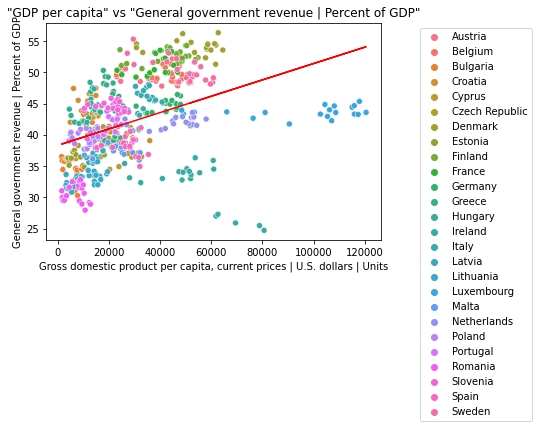

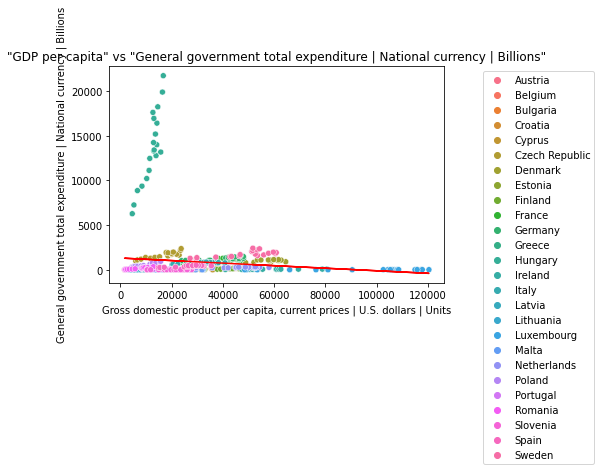

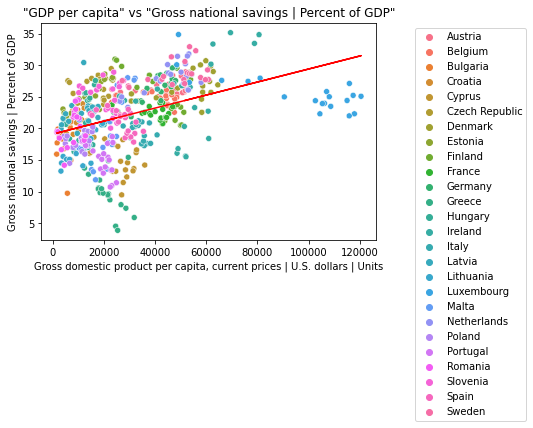

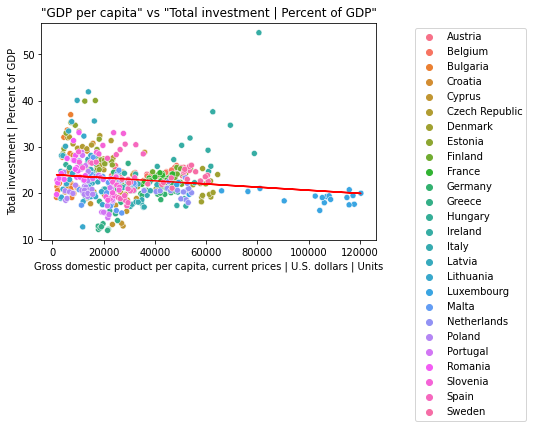

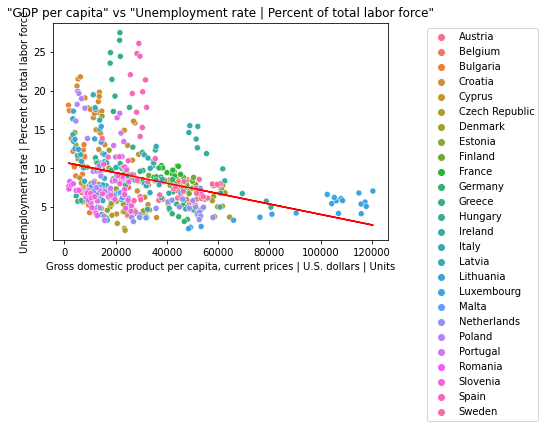

In [54]:
# Plotting the GDP vs selected features dependancy
plot_with_trend(df=df_eu,
               y_value='Gross domestic product per capita, current prices | U.S. dollars | Units',
               y_name = 'GDP per capita',
               X_value = ols_eu_features,
               hue = 'Country')

### NATO data

In [55]:
# As the NATO countries are similar to EU, so will use the same initial features for NATO dataframe as for EU to see dependancy vs GDP

df_nato_temp = df_nato[['Country', 'Year',
       #'Current account balance | Percent of GDP',
       #'Current account balance | U.S. dollars | Billions',
       #'Employment | Persons | Millions',
       'General government gross debt | National currency | Billions',
       'General government gross debt | Percent of GDP',
       #'General government net debt | National currency | Billions',
       #'General government net debt | Percent of GDP',
       'General government net lending/borrowing | National currency | Billions',
       'General government net lending/borrowing | Percent of GDP',
       #'General government primary net lending/borrowing | National currency | Billions',
       #'General government primary net lending/borrowing | Percent of GDP',
       'General government revenue | National currency | Billions',
       'General government revenue | Percent of GDP',
       #'General government structural balance | National currency | Billions',
       #'General government structural balance | Percent of potential GDP',
       'General government total expenditure | National currency | Billions',
       'General government total expenditure | Percent of GDP',
       #'Gross domestic product based on purchasing-power-parity (PPP) share of world total | Percent',
       #'Gross domestic product corresponding to fiscal year, current prices | National currency | Billions',
       #'Gross domestic product per capita, constant prices | National currency | Units',
       #'Gross domestic product per capita, constant prices | Purchasing power parity; 2017 international dollar | Units',
       #'Gross domestic product per capita, current prices | National currency | Units',
       #'Gross domestic product per capita, current prices | Purchasing power parity; international dollars | Units',
       'Gross domestic product per capita, current prices | U.S. dollars | Units',
       #'Gross domestic product, constant prices | National currency | Billions',
       #'Gross domestic product, constant prices | Percent change',
       #'Gross domestic product, current prices | National currency | Billions',
       #'Gross domestic product, current prices | Purchasing power parity; international dollars | Billions',
       #'Gross domestic product, current prices | U.S. dollars | Billions',
       #'Gross domestic product, deflator | Index',
       'Gross national savings | Percent of GDP',
       'Implied PPP conversion rate | National currency per current international dollar',
       'Inflation, average consumer prices | Index',
       'Inflation, average consumer prices | Percent change',
       'Inflation, end of period consumer prices | Index',
       'Inflation, end of period consumer prices | Percent change',
       #'Output gap in percent of potential GDP | Percent of potential GDP',
       'Population | Persons | Millions',
       #'Six-month London interbank offered rate (LIBOR) | Percent',
       'Total investment | Percent of GDP',
       'Unemployment rate | Percent of total labor force',
       #'Volume of Imports of goods | Percent change',
       'Volume of exports of goods and services | Percent change',
       #'Volume of exports of goods | Percent change',
       'Volume of imports of goods and services | Percent change']]

In [56]:
# dropping rows which have NaN values in the NATO data (41 rows removed, 539 rows remaining)
df_nato_temp = df_nato_temp.dropna()

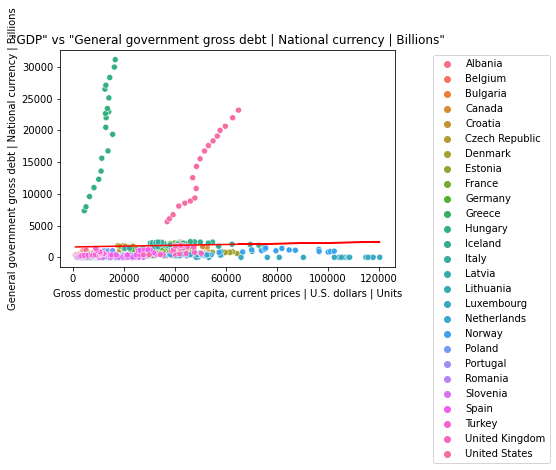

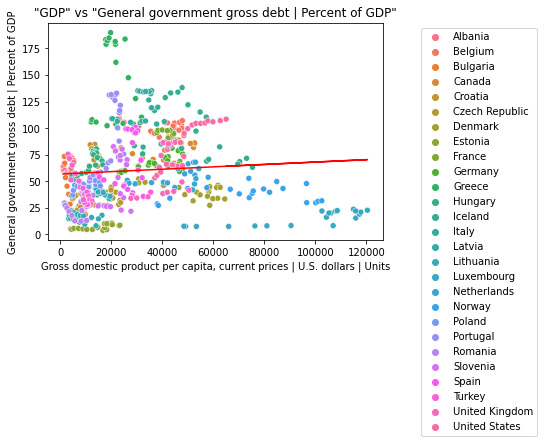

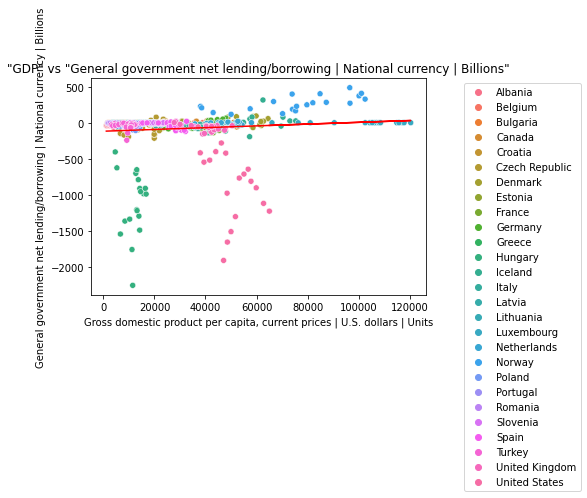

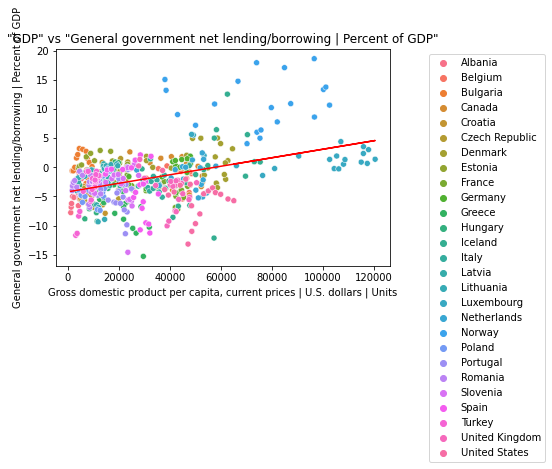

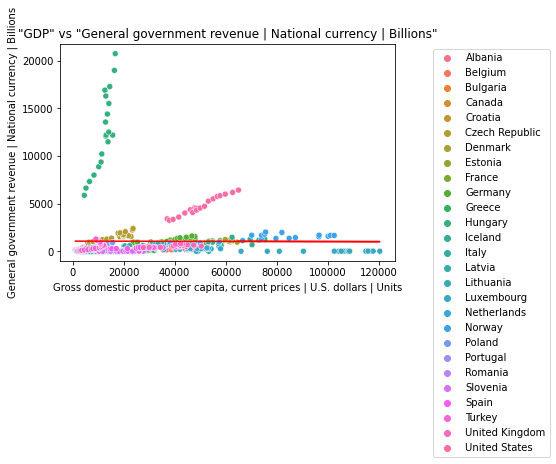

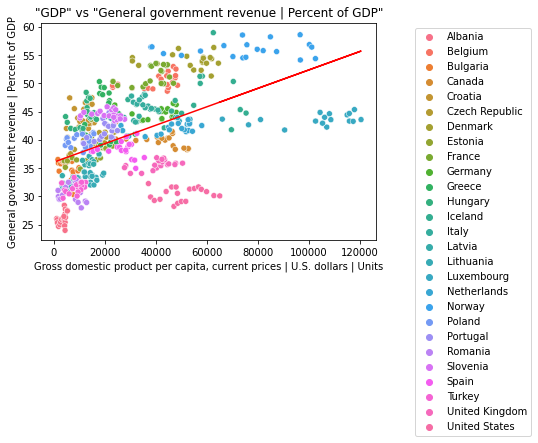

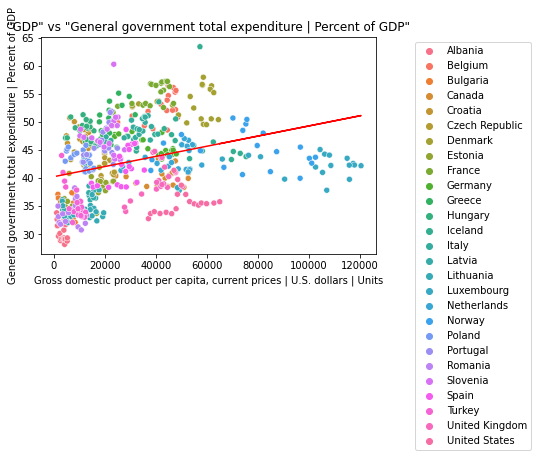

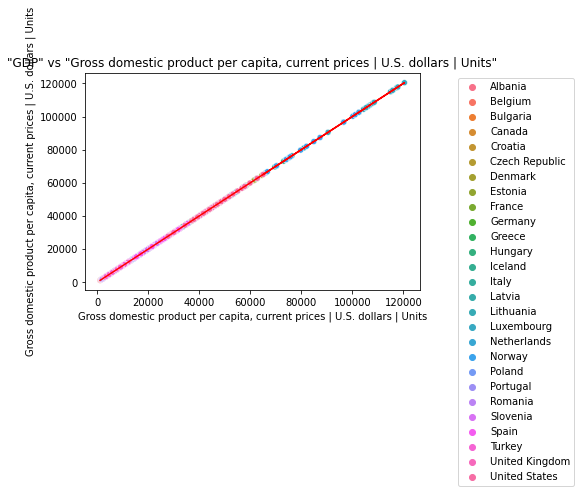

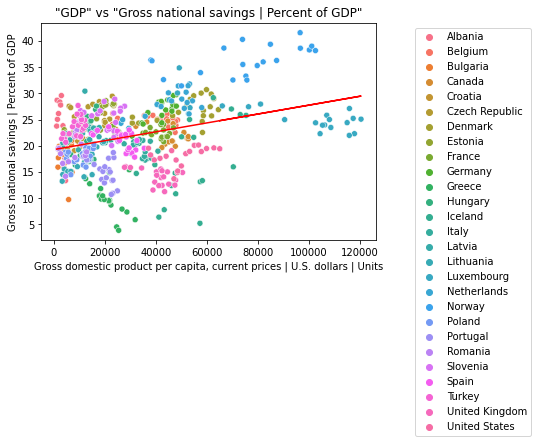

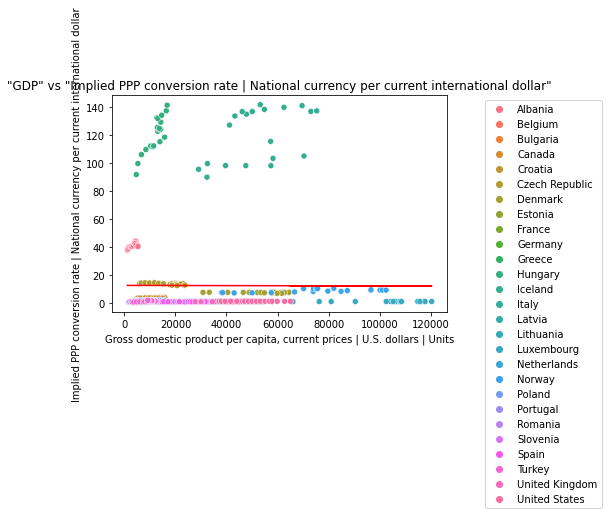

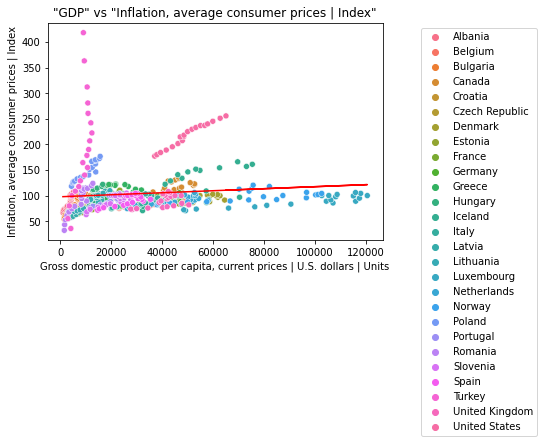

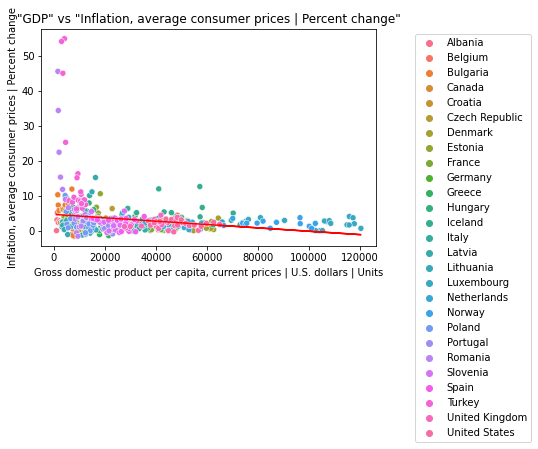

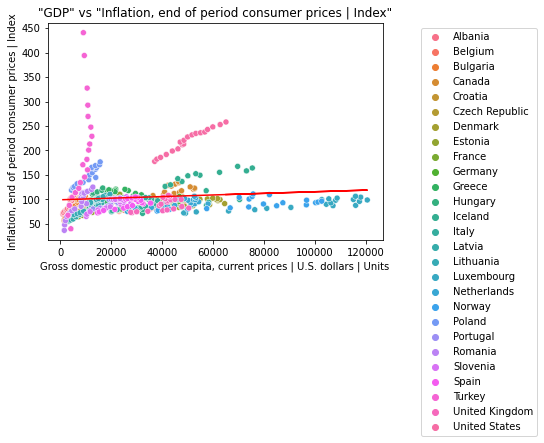

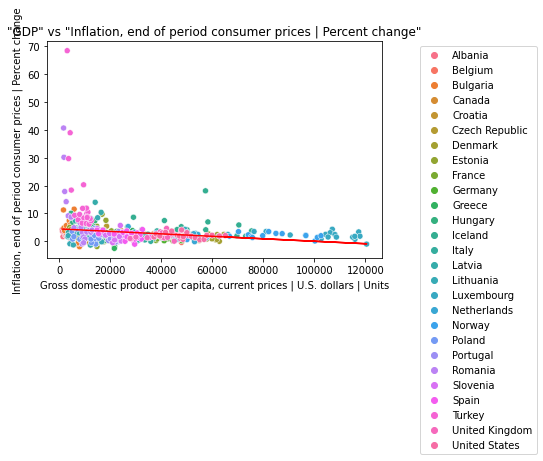

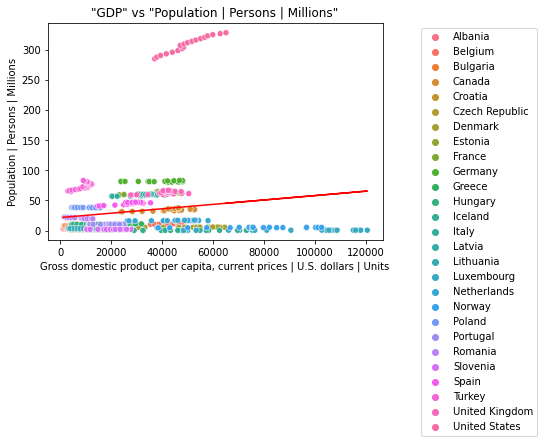

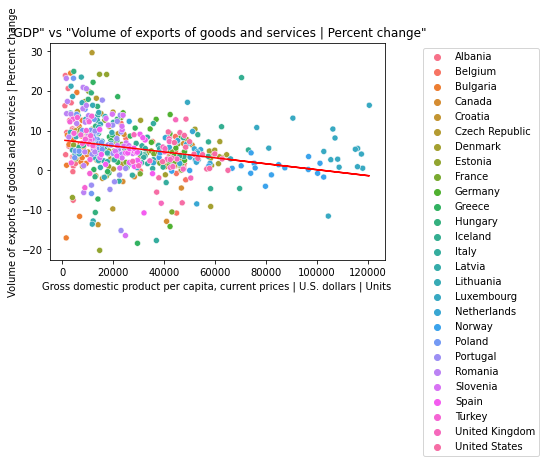

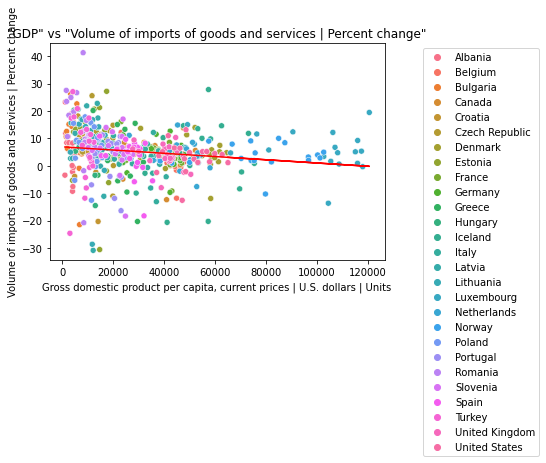

In [57]:
# Plotting to see GDP dependancy vs the initial selected features
plot_with_trend(df=df_nato_temp,
               y_value='Gross domestic product per capita, current prices | U.S. dollars | Units',
               y_name = 'GDP',
               X_value = list(df_nato_temp.columns)[2:],
               hue = 'Country')

In [58]:
# setting country and year as index 
ols_nato = df_nato_temp.set_index(['Country', 'Year'])

In [59]:
# Running the OLS model and checking the P>|t| value
# Taking all  X , where P>|t| is lower than 0.05 (5%)

y_nato = ols_nato['Gross domestic product per capita, current prices | U.S. dollars | Units']
temp_1 = ols_nato.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis = 1)
X_nato = temp_1

OLS_model(y_nato, X_nato)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                       
====================================================================================================================================
Dep. Variable:     Gross domestic product per capita, current prices | U.S. dollars | Units   R-squared:                       0.589
Model:                                                                                  OLS   Adj. R-squared:                  0.574
Method:                                                                       Least Squares   F-statistic:                     39.15
Date:                                                                      Mon, 16 May 2022   Prob (F-statistic):           2.21e-87
Time:                                                                              12:28:17   Log-Likelihood:                -5952.9
No. Observations:                                                                       539   AIC:                         1.195e+04
Df Residuals:                                                                           519   BIC:                         1.203e+04
Df Model:                                                                                19                                         
Covariance Type:                                                                  nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                             1.135e+04   8390.403      1.353      0.177   -5131.190    2.78e+04
General government gross debt | National currency | Billions                         2.5870      0.745      3.474      0.001       1.124       4.050
General government gross debt | Percent of GDP                                     -82.4858     29.800     -2.768      0.006    -141.029     -23.942
General government net lending/borrowing | National currency | Billions            3.99e+05   3.44e+05      1.159      0.247   -2.77e+05    1.08e+06
General government net lending/borrowing | Percent of GDP                        -1.261e+06    1.3e+06     -0.969      0.333   -3.82e+06    1.29e+06
General government revenue | National currency | Billions                         -3.99e+05   3.44e+05     -1.159      0.247   -1.08e+06    2.77e+05
General government revenue | Percent of GDP                                       1.263e+06    1.3e+06      0.971      0.332   -1.29e+06    3.82e+06
General government total expenditure | National currency | Billions                3.99e+05   3.44e+05      1.159      0.247   -2.77e+05    1.08e+06
General government total expenditure | Percent of GDP                            -1.262e+06    1.3e+06     -0.970      0.333   -3.82e+06    1.29e+06
Gross national savings | Percent of GDP                                            652.8328    178.537      3.657      0.000     302.089    1003.576
Implied PPP conversion rate | National currency per current international dollar   137.4413     33.043      4.159      0.000      72.527     202.355
Inflation, average consumer prices | Index                                         429.8439    376.847      1.141      0.255    -310.489    1170.177
Inflation, average consumer prices | Percent change                               -399.7755    413.491     -0.967      0.334   -1212.098     412.547
Inflation, end of period consumer prices | Index                                  -401.5352    364.520   

### Testing if the same features as for EU work well with NATO data and then doing the same analysis to see if there are better features

In [60]:
print('**Selected the same features as for EU because one feature which was different was giving a worse result**')

# Selecting the same features as for EU There are 6 features in total that have a P>|t| value of less than 5%, taking out Implied PPP conversion rate because the trend line is flatter than General government gross debt and also for feature value input convenience
X_ols_nato = X_nato[[
#5drop 'General government gross debt | National currency | Billions',
#8drop 'General government gross debt | Percent of GDP',
#4drop 'General government net lending/borrowing | National currency | Billions',
#3drop 'General government net lending/borrowing | Percent of GDP',
#13drop 'General government revenue | National currency | Billions',
       'General government revenue | Percent of GDP',
       'General government total expenditure | National currency | Billions',
#10drop 'General government total expenditure | Percent of GDP',
       'Gross national savings | Percent of GDP',
#11drop'Implied PPP conversion rate | National currency per current international dollar',
#6drop 'Inflation, average consumer prices | Index',
#8drop 'Inflation, average consumer prices | Percent change',
#7drop 'Inflation, end of period consumer prices | Index',
#2drop 'Inflation, end of period consumer prices | Percent change',
#12drop'Population | Persons | Millions',
       'Total investment | Percent of GDP',
       'Unemployment rate | Percent of total labor force']]
#9drop 'Volume of exports of goods and services | Percent change']]
#1drop 'Volume of imports of goods and services | Percent change']]
        
OLS_model(y_nato, X_ols_nato)

**Selected the same features as for EU because one feature which was different was giving a worse result**


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                       
====================================================================================================================================
Dep. Variable:     Gross domestic product per capita, current prices | U.S. dollars | Units   R-squared:                       0.482
Model:                                                                                  OLS   Adj. R-squared:                  0.478
Method:                                                                       Least Squares   F-statistic:                     99.35
Date:                                                                      Mon, 16 May 2022   Prob (F-statistic):           6.65e-74
Time:                                                                              12:28:17   Log-Likelihood:                -6015.1
No. Observations:                                                                       539   AIC:                         1.204e+04
Df Residuals:                                                                           533   BIC:                         1.207e+04
Df Model:                                                                                 5                                         
Covariance Type:                                                                  nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                2.979e+04   7096.291      4.198      0.000    1.58e+04    4.37e+04
General government revenue | Percent of GDP                           897.3780    116.578      7.698      0.000     668.369    1126.386
General government total expenditure | National currency | Billions    -0.8351      0.268     -3.112      0.002      -1.362      -0.308
Gross national savings | Percent of GDP                               845.1727    159.756      5.290      0.000     531.344    1159.002
Total investment | Percent of GDP                                   -1616.9113    177.167     -9.126      0.000   -1964.943   -1268.879
Unemployment rate | Percent of total labor force                    -1914.5546    175.998    -10.878      0.000   -2260.289   -1568.821
==============================================================================
Omnibus:                      156.541   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.094
Skew:                           1.440   Prob(JB):                     7.30e-91
Kurtosis:                       6.192   Cond. No.                     2.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Putting selected features in a list
ols_nato_features = list(X_ols_nato.columns)
ols_nato_features

['General government revenue | Percent of GDP',
 'General government total expenditure | National currency | Billions',
 'Gross national savings | Percent of GDP',
 'Total investment | Percent of GDP',
 'Unemployment rate | Percent of total labor force']

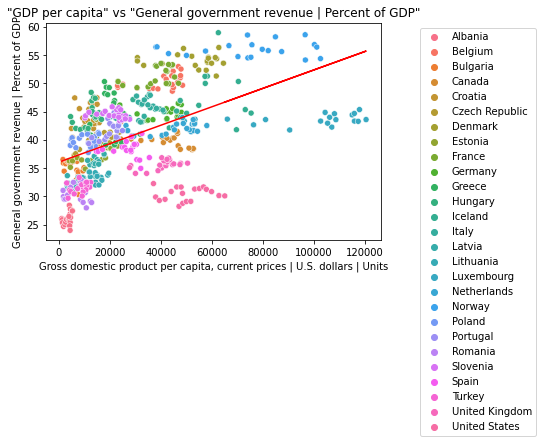

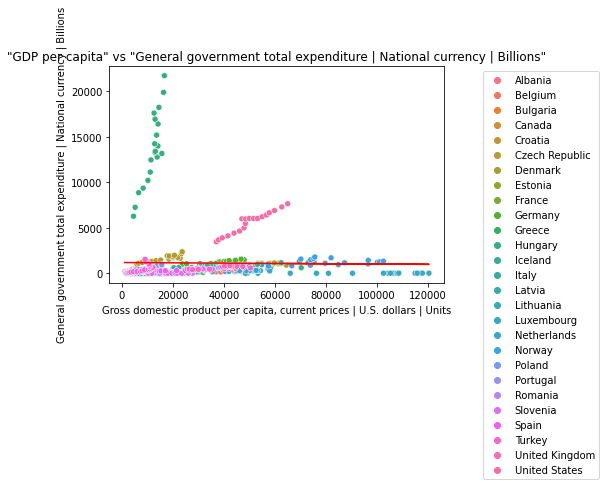

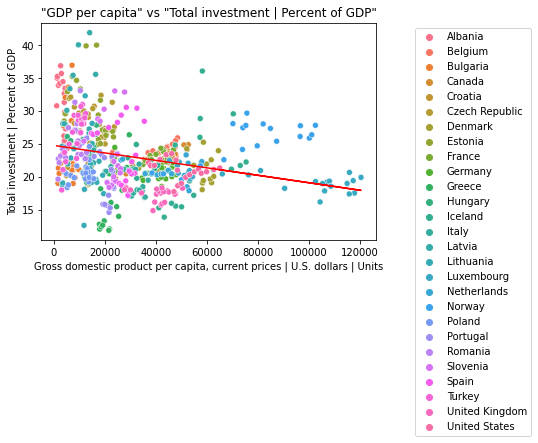

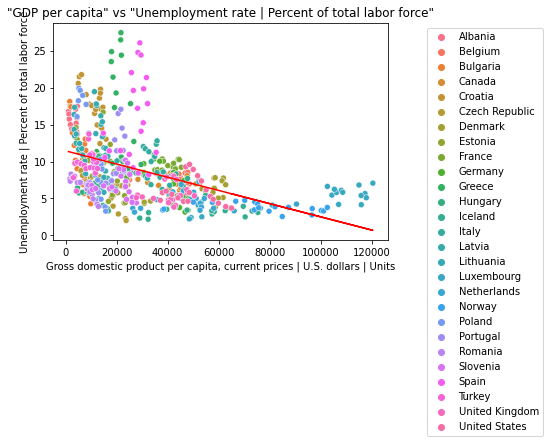

In [62]:
# Plotting the GDP vs selected features dependancy

plot_with_trend(df=df_nato_temp,
               y_value='Gross domestic product per capita, current prices | U.S. dollars | Units',
               y_name = 'GDP per capita',
               X_value = ols_nato_features,
               hue = 'Country')

## Train & Test (EU)

In [63]:
# Splitting EU dataframe
from sklearn.model_selection import train_test_split

split_eu = ols_eu.copy()

X_eu = split_eu
X_train, X_test = train_test_split(X_eu, test_size=0.20, random_state=0)

y_train = X_train['Gross domestic product per capita, current prices | U.S. dollars | Units']
y_test = X_test['Gross domestic product per capita, current prices | U.S. dollars | Units']

X_train.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )
X_test.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(416, 19)
(104, 19)
(416,)
(104,)


In [64]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model = LinearRegression()
rfe = RFECV(model, cv=10) # cv - cross_validation

rfe = rfe.fit(X_train, y_train)
selected_features = rfe.get_feature_names_out()
print(f'Number of selected features by cross validation : {len(selected_features)}')
print(f'Number of total features: {len(X_train.columns)}')
print(f'Number of EU OLS selected features: {len(ols_eu_features)}')
print('Use selected features by OLS model as the cross validation is not effective ')

Number of selected features by cross validation : 13
Number of total features: 19
Number of EU OLS selected features: 5
Use selected features by OLS model as the cross validation is not effective 


## All features (EU)
### LinearRegression

In [65]:
# Creating a function to run Linear Regression model
def linear_reg_model(X_train, y_train, X_test, y_test):
    print('\n Linear regression model for GDP prediction')
    #PREDICT
    model = LinearRegression()
    ols_fit = model.fit(X_train, y_train)
    y_pred_ols = ols_fit.predict(X_test)
    
    global MSE_lin_reg, MAPE_lin_reg
    MSE_lin_reg = mean_squared_error(y_test, y_pred_ols, squared=False)
    MAPE_lin_reg = mean_absolute_percentage_error(y_test, y_pred_ols)
    
    print('---------------------------------------------------')   
    print(f'MSE: {MSE_lin_reg}')
    print(f'MAPE: {MAPE_lin_reg}')
    
    #PLOT
    plt.scatter(y_test, y_test-y_pred_ols)
    plt.xlabel('Real GDP')
    plt.ylabel('GDP Difference')
    plt.title('Real vs Predicted GDP Difference')
    plt.grid()
    plt.show()


 Linear regression model for GDP prediction
---------------------------------------------------
MSE: 16452.478435551493
MAPE: 0.7410131427045447


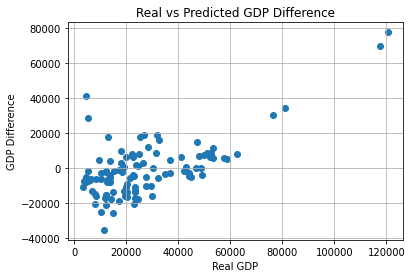

In [66]:
linear_reg_model(X_train, y_train, X_test, y_test)

### XGBoost

In [67]:
# Creating a function to run XGBoost model
def xgboost_model(X_train, y_train, X_test, y_test, num_boost_round, max_depth, eta):
    print('\n XGBoost model for GDP prediction')
    print('---------------------------------------------------')
    import xgboost as xgb
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # TRAIN
    params = {'max_depth': max_depth, 'eta': eta, 'objective': 'reg:squarederror'}
    params['eval_metric'] = 'mape'
    evals = [(dtest,'test'),(dtrain, 'train')]
    xgboost_model.bst = xgb.train(params, dtrain, num_boost_round, evals = evals, early_stopping_rounds=5)
    

    # PREDICT
    y_pred_xgboost = xgboost_model.bst.predict(dtest)
    
    
    
    global MSE_xgb, MAPE_xgb
    MSE_xgb = mean_squared_error(y_test, y_pred_xgboost, squared=False)
    MAPE_xgb = mean_absolute_percentage_error(y_test, y_pred_xgboost)
    
    print('---------------------------------------------------')
    print(f'MSE: {MSE_xgb}')
    print(f'MAPE: {MAPE_xgb}')
        
    # PLOT
    plt.scatter(y_test, y_test-y_pred_xgboost)
    plt.xlabel('Real GDP')
    plt.ylabel('GDP Difference')
    plt.title('Real vs Predicted GDP Difference')
    plt.grid()
    plt.show()


 XGBoost model for GDP prediction
---------------------------------------------------
[0]	test-mape:0.94171	train-mape:0.95088
[1]	test-mape:0.89342	train-mape:0.90487
[2]	test-mape:0.84462	train-mape:0.86128
[3]	test-mape:0.79758	train-mape:0.81886
[4]	test-mape:0.75327	train-mape:0.77866
[5]	test-mape:0.71375	train-mape:0.74061
[6]	test-mape:0.67559	train-mape:0.70422
[7]	test-mape:0.64013	train-mape:0.66966
[8]	test-mape:0.60406	train-mape:0.63713
[9]	test-mape:0.57001	train-mape:0.60561
[10]	test-mape:0.54282	train-mape:0.57597
[11]	test-mape:0.51766	train-mape:0.54794
[12]	test-mape:0.49376	train-mape:0.52143
[13]	test-mape:0.47242	train-mape:0.49643
[14]	test-mape:0.45181	train-mape:0.47261
[15]	test-mape:0.43170	train-mape:0.44993
[16]	test-mape:0.41294	train-mape:0.42840
[17]	test-mape:0.39459	train-mape:0.40778
[18]	test-mape:0.37781	train-mape:0.38806
[19]	test-mape:0.35959	train-mape:0.36945
[20]	test-mape:0.34419	train-mape:0.35164
[21]	test-mape:0.33075	train-mape:0.33462

[192]	test-mape:0.15872	train-mape:0.00041
[193]	test-mape:0.15872	train-mape:0.00040
[194]	test-mape:0.15873	train-mape:0.00039
[195]	test-mape:0.15873	train-mape:0.00038
[196]	test-mape:0.15874	train-mape:0.00037
[197]	test-mape:0.15874	train-mape:0.00036
[198]	test-mape:0.15874	train-mape:0.00035
[199]	test-mape:0.15874	train-mape:0.00034
[200]	test-mape:0.15874	train-mape:0.00033
[201]	test-mape:0.15874	train-mape:0.00032
[202]	test-mape:0.15874	train-mape:0.00031
[203]	test-mape:0.15874	train-mape:0.00031
[204]	test-mape:0.15875	train-mape:0.00030
[205]	test-mape:0.15875	train-mape:0.00029
[206]	test-mape:0.15876	train-mape:0.00028
[207]	test-mape:0.15877	train-mape:0.00028
[208]	test-mape:0.15877	train-mape:0.00027
[209]	test-mape:0.15878	train-mape:0.00026
[210]	test-mape:0.15878	train-mape:0.00026
[211]	test-mape:0.15879	train-mape:0.00025
[212]	test-mape:0.15880	train-mape:0.00025
[213]	test-mape:0.15880	train-mape:0.00024
[214]	test-mape:0.15881	train-mape:0.00024
[215]	test-

[383]	test-mape:0.15902	train-mape:0.00001
[384]	test-mape:0.15902	train-mape:0.00001
[385]	test-mape:0.15902	train-mape:0.00001
[386]	test-mape:0.15902	train-mape:0.00001
[387]	test-mape:0.15902	train-mape:0.00001
[388]	test-mape:0.15902	train-mape:0.00001
[389]	test-mape:0.15902	train-mape:0.00001
[390]	test-mape:0.15902	train-mape:0.00001
[391]	test-mape:0.15902	train-mape:0.00001
[392]	test-mape:0.15902	train-mape:0.00001
[393]	test-mape:0.15902	train-mape:0.00001
[394]	test-mape:0.15902	train-mape:0.00001
[395]	test-mape:0.15902	train-mape:0.00001
[396]	test-mape:0.15902	train-mape:0.00001
[397]	test-mape:0.15902	train-mape:0.00001
[398]	test-mape:0.15902	train-mape:0.00001
[399]	test-mape:0.15902	train-mape:0.00001
[400]	test-mape:0.15902	train-mape:0.00001
[401]	test-mape:0.15902	train-mape:0.00001
[402]	test-mape:0.15902	train-mape:0.00001
[403]	test-mape:0.15902	train-mape:0.00000
[404]	test-mape:0.15902	train-mape:0.00000
[405]	test-mape:0.15902	train-mape:0.00000
[406]	test-

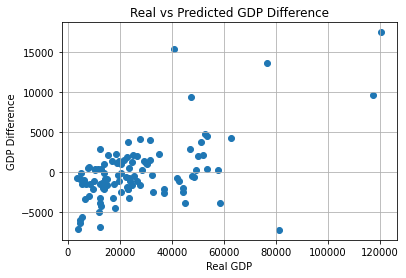

In [68]:
xgboost_model(
    X_train,
    y_train,
    X_test,
    y_test,
    num_boost_round = 500,
    max_depth = 12,
    eta = 0.05)

### XGBoost (GridSearchCV)

In [69]:
# Creating a function to run XGBoost model with GridSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


def xgboost_grid_model(X_train, y_train, X_test, y_test, learning_rate, max_depth, n_estimators, num_boost_round, n_jobs):
    print('\n XGBoost model with GridSearchCV for GDP prediction')
    print('---------------------------------------------------')
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    parameters = {'objective': ['reg:squarederror'],
              'learning_rate': learning_rate, 
              'max_depth': max_depth,
              'verbosity': [0],
              'n_estimators': n_estimators, #number of trees, change it to 1000 for better results
              }
    
    bst = xgb.XGBRegressor()
    best = GridSearchCV(bst,
                        parameters,
                        n_jobs= n_jobs,
                        scoring="neg_mean_absolute_error",
                        verbose=2,
                        refit=True)
    
    b_fit = best.fit(X_train, y_train)
    b_fit.best_params_


    print('Best parameters from GridSearchCV:')
    print(b_fit.best_params_)
    print('\n')
    
    best_params = b_fit.best_params_
    
    #best_params = {'learning_rate': 0.05,
     #              'max_depth': 12,
      #             'n_estimators': 1000,
       #            'objective': 'reg:squarederror',
        #           'verbosity': 0}
    
    best_params['eval_metric'] = 'mape'
    evals = [(dtest,'test'),(dtrain, 'train')]
    xgboost_grid_model.best_xg = xgb.train(best_params, dtrain, num_boost_round, evals = evals)
    
    # PREDICT best_xg
    y_pred_best_xg = xgboost_grid_model.best_xg.predict(dtest)
    
    global MSE_xgb_grid, MAPE_xgb_grid
    MSE_xgb_grid = mean_squared_error(y_test, y_pred_best_xg, squared=False)
    MAPE_xgb_grid = mean_absolute_percentage_error(y_test, y_pred_best_xg)
    
    print('---------------------------------------------------')
    print(f'MSE: {MSE_xgb_grid}')
    print(f'MAPE: {MAPE_xgb_grid}')
    
    # PLOT
    plt.scatter(y_test, y_test-y_pred_best_xg)
    plt.xlabel('Real GDP')
    plt.ylabel('GDP Difference')
    plt.title('Real vs Predicted GDP Difference')
    plt.grid()
    plt.show()


 XGBoost model with GridSearchCV for GDP prediction
---------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from GridSearchCV:
{'learning_rate': 0.05, 'max_depth': 14, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'verbosity': 0}


[0]	test-mape:0.94171	train-mape:0.95088
[1]	test-mape:0.89342	train-mape:0.90487
[2]	test-mape:0.84462	train-mape:0.86128
[3]	test-mape:0.79758	train-mape:0.81886
[4]	test-mape:0.75327	train-mape:0.77866
[5]	test-mape:0.71375	train-mape:0.74061
[6]	test-mape:0.67559	train-mape:0.70422
[7]	test-mape:0.64013	train-mape:0.66966
[8]	test-mape:0.60406	train-mape:0.63713
[9]	test-mape:0.57001	train-mape:0.60561
[10]	test-mape:0.54282	train-mape:0.57597
[11]	test-mape:0.51766	train-mape:0.54794
[12]	test-mape:0.49376	train-mape:0.52143
[13]	test-mape:0.47242	train-mape:0.49643
[14]	test-mape:0.45181	train-mape:0.47261
[15]	test-mape:0.43170	train-mape:0.44993
[16]	test-mape:0.4129

[186]	test-mape:0.15901	train-mape:0.00037
[187]	test-mape:0.15901	train-mape:0.00036
[188]	test-mape:0.15901	train-mape:0.00035
[189]	test-mape:0.15901	train-mape:0.00034
[190]	test-mape:0.15901	train-mape:0.00033
[191]	test-mape:0.15901	train-mape:0.00032
[192]	test-mape:0.15902	train-mape:0.00031
[193]	test-mape:0.15902	train-mape:0.00030
[194]	test-mape:0.15902	train-mape:0.00029
[195]	test-mape:0.15902	train-mape:0.00028
[196]	test-mape:0.15902	train-mape:0.00027
[197]	test-mape:0.15902	train-mape:0.00026
[198]	test-mape:0.15902	train-mape:0.00025
[199]	test-mape:0.15902	train-mape:0.00024
[200]	test-mape:0.15902	train-mape:0.00023
[201]	test-mape:0.15902	train-mape:0.00023
[202]	test-mape:0.15902	train-mape:0.00022
[203]	test-mape:0.15902	train-mape:0.00021
[204]	test-mape:0.15902	train-mape:0.00021
[205]	test-mape:0.15902	train-mape:0.00020
[206]	test-mape:0.15902	train-mape:0.00019
[207]	test-mape:0.15902	train-mape:0.00019
[208]	test-mape:0.15902	train-mape:0.00018
[209]	test-

[377]	test-mape:0.15902	train-mape:0.00000
[378]	test-mape:0.15902	train-mape:0.00000
[379]	test-mape:0.15902	train-mape:0.00000
[380]	test-mape:0.15902	train-mape:0.00000
[381]	test-mape:0.15902	train-mape:0.00000
[382]	test-mape:0.15902	train-mape:0.00000
[383]	test-mape:0.15902	train-mape:0.00000
[384]	test-mape:0.15902	train-mape:0.00000
[385]	test-mape:0.15902	train-mape:0.00000
[386]	test-mape:0.15902	train-mape:0.00000
[387]	test-mape:0.15902	train-mape:0.00000
[388]	test-mape:0.15902	train-mape:0.00000
[389]	test-mape:0.15902	train-mape:0.00000
[390]	test-mape:0.15902	train-mape:0.00000
[391]	test-mape:0.15902	train-mape:0.00000
[392]	test-mape:0.15902	train-mape:0.00000
[393]	test-mape:0.15902	train-mape:0.00000
[394]	test-mape:0.15902	train-mape:0.00000
[395]	test-mape:0.15902	train-mape:0.00000
[396]	test-mape:0.15902	train-mape:0.00000
[397]	test-mape:0.15902	train-mape:0.00000
[398]	test-mape:0.15902	train-mape:0.00000
[399]	test-mape:0.15902	train-mape:0.00000
[400]	test-

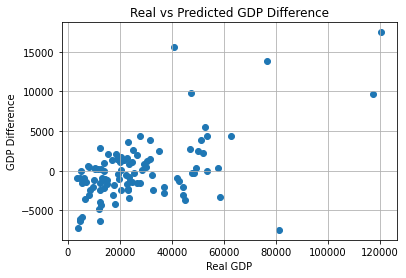

In [70]:
xgboost_grid_model(
    X_train,
    y_train,
    X_test,
    y_test,
    learning_rate = [0.05, 0.1, 0.2, 0.3],
    max_depth = [6,8,10,12,14],
    n_estimators = [5, 10, 15, 20, 1000],
    num_boost_round = 500,
    n_jobs = 5)

### Results - All features (EU)

In [71]:
print('GridSearchCV:')
print(f'MSE: {MSE_xgb_grid}, MAPE: {MAPE_xgb_grid}')
print('XGBoost:')
print(f'MSE: {MSE_xgb}, MAPE: {MAPE_xgb}')
print('Linear Regression:')
print(f'MSE: {MSE_lin_reg}, MAPE: {MAPE_lin_reg}')

GridSearchCV:
MSE: 3975.946681767922, MAPE: 0.15902211108056916
XGBoost:
MSE: 3948.618128754269, MAPE: 0.15902085097592075
Linear Regression:
MSE: 16452.478435551493, MAPE: 0.7410131427045447


## Selected OLS features (EU)


 Linear regression model for GDP prediction
---------------------------------------------------
MSE: 15793.587942077462
MAPE: 0.6624880660283963


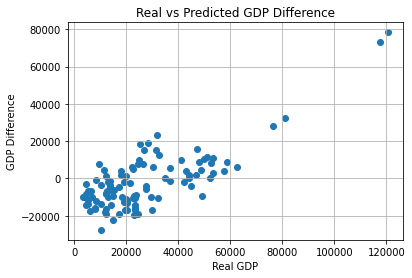

In [72]:
linear_reg_model(X_train[ols_eu_features], y_train, X_test[ols_eu_features], y_test)


 XGBoost model for GDP prediction
---------------------------------------------------
[0]	test-mape:0.94746	train-mape:0.95192
[1]	test-mape:0.89796	train-mape:0.90643
[2]	test-mape:0.84959	train-mape:0.86313
[3]	test-mape:0.80464	train-mape:0.82237
[4]	test-mape:0.76163	train-mape:0.78363
[5]	test-mape:0.72114	train-mape:0.74705
[6]	test-mape:0.68301	train-mape:0.71184
[7]	test-mape:0.65132	train-mape:0.67883
[8]	test-mape:0.62079	train-mape:0.64682
[9]	test-mape:0.59170	train-mape:0.61645
[10]	test-mape:0.56576	train-mape:0.58671
[11]	test-mape:0.54330	train-mape:0.55938
[12]	test-mape:0.52418	train-mape:0.53320
[13]	test-mape:0.50317	train-mape:0.50796
[14]	test-mape:0.48217	train-mape:0.48428
[15]	test-mape:0.46360	train-mape:0.46176
[16]	test-mape:0.44872	train-mape:0.44050
[17]	test-mape:0.43425	train-mape:0.42064
[18]	test-mape:0.41923	train-mape:0.40179
[19]	test-mape:0.40450	train-mape:0.38341
[20]	test-mape:0.39368	train-mape:0.36607
[21]	test-mape:0.38243	train-mape:0.34935

[192]	test-mape:0.27800	train-mape:0.00243
[193]	test-mape:0.27797	train-mape:0.00240
[194]	test-mape:0.27798	train-mape:0.00235
[195]	test-mape:0.27794	train-mape:0.00228
[196]	test-mape:0.27794	train-mape:0.00224
[197]	test-mape:0.27794	train-mape:0.00220
[198]	test-mape:0.27794	train-mape:0.00215
[199]	test-mape:0.27793	train-mape:0.00212
[200]	test-mape:0.27791	train-mape:0.00209
[201]	test-mape:0.27790	train-mape:0.00204
[202]	test-mape:0.27786	train-mape:0.00201
[203]	test-mape:0.27784	train-mape:0.00198
[204]	test-mape:0.27784	train-mape:0.00194
[205]	test-mape:0.27783	train-mape:0.00191
[206]	test-mape:0.27782	train-mape:0.00187
[207]	test-mape:0.27783	train-mape:0.00184
[208]	test-mape:0.27783	train-mape:0.00181
[209]	test-mape:0.27780	train-mape:0.00176
[210]	test-mape:0.27782	train-mape:0.00173
[211]	test-mape:0.27781	train-mape:0.00170
[212]	test-mape:0.27780	train-mape:0.00166
[213]	test-mape:0.27775	train-mape:0.00162
[214]	test-mape:0.27774	train-mape:0.00159
[215]	test-

[383]	test-mape:0.27733	train-mape:0.00007
[384]	test-mape:0.27733	train-mape:0.00007
[385]	test-mape:0.27733	train-mape:0.00007
[386]	test-mape:0.27733	train-mape:0.00006
[387]	test-mape:0.27733	train-mape:0.00006
[388]	test-mape:0.27733	train-mape:0.00006
[389]	test-mape:0.27733	train-mape:0.00006
[390]	test-mape:0.27733	train-mape:0.00006
[391]	test-mape:0.27733	train-mape:0.00006
[392]	test-mape:0.27732	train-mape:0.00006
[393]	test-mape:0.27733	train-mape:0.00006
[394]	test-mape:0.27732	train-mape:0.00006
[395]	test-mape:0.27732	train-mape:0.00005
[396]	test-mape:0.27732	train-mape:0.00005
[397]	test-mape:0.27732	train-mape:0.00005
[398]	test-mape:0.27732	train-mape:0.00005
[399]	test-mape:0.27732	train-mape:0.00005
[400]	test-mape:0.27733	train-mape:0.00005
[401]	test-mape:0.27733	train-mape:0.00005
[402]	test-mape:0.27733	train-mape:0.00005
[403]	test-mape:0.27733	train-mape:0.00005
[404]	test-mape:0.27733	train-mape:0.00005
[405]	test-mape:0.27733	train-mape:0.00005
[406]	test-

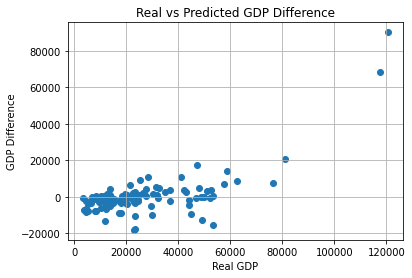

In [73]:
xgboost_model(
    X_train[ols_eu_features],
    y_train,
    X_test[ols_eu_features],
    y_test,
    num_boost_round = 500,
    max_depth = 12,
    eta = 0.05)


 XGBoost model with GridSearchCV for GDP prediction
---------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from GridSearchCV:
{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'verbosity': 0}


[0]	test-mape:0.78864	train-mape:0.80600
[1]	test-mape:0.62432	train-mape:0.64999
[2]	test-mape:0.51447	train-mape:0.52464
[3]	test-mape:0.42991	train-mape:0.42282
[4]	test-mape:0.37371	train-mape:0.34224
[5]	test-mape:0.34083	train-mape:0.27991
[6]	test-mape:0.31179	train-mape:0.22959
[7]	test-mape:0.29681	train-mape:0.19356
[8]	test-mape:0.28163	train-mape:0.16244
[9]	test-mape:0.28360	train-mape:0.13524
[10]	test-mape:0.28396	train-mape:0.11649
[11]	test-mape:0.28948	train-mape:0.10070
[12]	test-mape:0.29023	train-mape:0.08709
[13]	test-mape:0.29385	train-mape:0.07850
[14]	test-mape:0.29651	train-mape:0.07054
[15]	test-mape:0.29775	train-mape:0.06512
[16]	test-mape:0.30482	

[186]	test-mape:0.30598	train-mape:0.00009
[187]	test-mape:0.30598	train-mape:0.00009
[188]	test-mape:0.30598	train-mape:0.00008
[189]	test-mape:0.30598	train-mape:0.00008
[190]	test-mape:0.30598	train-mape:0.00008
[191]	test-mape:0.30598	train-mape:0.00008
[192]	test-mape:0.30598	train-mape:0.00007
[193]	test-mape:0.30598	train-mape:0.00007
[194]	test-mape:0.30598	train-mape:0.00007
[195]	test-mape:0.30598	train-mape:0.00007
[196]	test-mape:0.30598	train-mape:0.00007
[197]	test-mape:0.30598	train-mape:0.00006
[198]	test-mape:0.30598	train-mape:0.00006
[199]	test-mape:0.30598	train-mape:0.00006
[200]	test-mape:0.30598	train-mape:0.00006
[201]	test-mape:0.30598	train-mape:0.00006
[202]	test-mape:0.30598	train-mape:0.00006
[203]	test-mape:0.30598	train-mape:0.00005
[204]	test-mape:0.30598	train-mape:0.00005
[205]	test-mape:0.30598	train-mape:0.00005
[206]	test-mape:0.30598	train-mape:0.00005
[207]	test-mape:0.30598	train-mape:0.00005
[208]	test-mape:0.30598	train-mape:0.00004
[209]	test-

[377]	test-mape:0.30599	train-mape:0.00000
[378]	test-mape:0.30599	train-mape:0.00000
[379]	test-mape:0.30599	train-mape:0.00000
[380]	test-mape:0.30599	train-mape:0.00000
[381]	test-mape:0.30599	train-mape:0.00000
[382]	test-mape:0.30599	train-mape:0.00000
[383]	test-mape:0.30599	train-mape:0.00000
[384]	test-mape:0.30599	train-mape:0.00000
[385]	test-mape:0.30599	train-mape:0.00000
[386]	test-mape:0.30599	train-mape:0.00000
[387]	test-mape:0.30599	train-mape:0.00000
[388]	test-mape:0.30599	train-mape:0.00000
[389]	test-mape:0.30599	train-mape:0.00000
[390]	test-mape:0.30599	train-mape:0.00000
[391]	test-mape:0.30599	train-mape:0.00000
[392]	test-mape:0.30599	train-mape:0.00000
[393]	test-mape:0.30599	train-mape:0.00000
[394]	test-mape:0.30599	train-mape:0.00000
[395]	test-mape:0.30599	train-mape:0.00000
[396]	test-mape:0.30599	train-mape:0.00000
[397]	test-mape:0.30599	train-mape:0.00000
[398]	test-mape:0.30599	train-mape:0.00000
[399]	test-mape:0.30599	train-mape:0.00000
[400]	test-

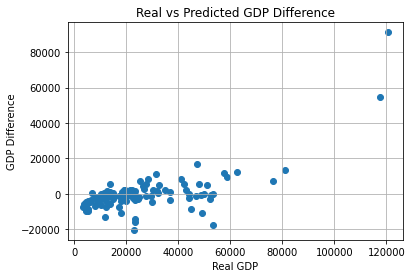

In [74]:
xgboost_grid_model(
    X_train[ols_eu_features],
    y_train,
    X_test[ols_eu_features],
    y_test,
    learning_rate = [0.05, 0.1, 0.2, 0.3],
    max_depth = [6,8,10,12,14],
    n_estimators = [5, 10, 15, 20, 1000],
    num_boost_round = 500,
    n_jobs = 5)

### Results - Selected features (EU)

In [75]:
print('GridSearchCV:')
print(f'MSE: {MSE_xgb_grid}, MAPE: {MAPE_xgb_grid}')
print('XGBoost:')
print(f'MSE: {MSE_xgb}, MAPE: {MAPE_xgb}')
print('Linear Regression:')
print(f'MSE: {MSE_lin_reg}, MAPE: {MAPE_lin_reg}')

GridSearchCV:
MSE: 12128.579489707992, MAPE: 0.30598887255899687
XGBoost:
MSE: 12757.391337200672, MAPE: 0.2773212264452829
Linear Regression:
MSE: 15793.587942077462, MAPE: 0.6624880660283963


## Train & Test (NATO)

In [76]:
# Splitting NATO dataframe
split_nato = ols_nato.copy()

X_nato = split_nato
X_train_nato, X_test_nato = train_test_split(X_nato, test_size=0.20, random_state=0)

y_train_nato = X_train_nato['Gross domestic product per capita, current prices | U.S. dollars | Units']
y_test_nato = X_test_nato['Gross domestic product per capita, current prices | U.S. dollars | Units']

X_train_nato.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )
X_test_nato.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )

print(X_train_nato.shape)
print(X_test_nato.shape)
print(y_train_nato.shape)
print(y_test_nato.shape)

(431, 19)
(108, 19)
(431,)
(108,)


In [77]:
model_nato = LinearRegression()
rfe_nato = RFECV(model_nato, cv=10) # cv - cross_validation

rfe_nato = rfe_nato.fit(X_train_nato, y_train_nato)
selected_features_nato = rfe_nato.get_feature_names_out()
print(f'Number of selected features by cross validation : {len(selected_features_nato)}')
print(f'Number of total features: {len(X_train_nato.columns)}')
print(f'Number of NATO OLS selected features: {len(ols_nato_features)}')
print('Use selected features by OLS model as the cross validation is not effective ')

Number of selected features by cross validation : 19
Number of total features: 19
Number of NATO OLS selected features: 5
Use selected features by OLS model as the cross validation is not effective 


## All features (NATO)
### LinearRegression


 Linear regression model for GDP prediction
---------------------------------------------------
MSE: 15390.426122519839
MAPE: 0.7385711471091371


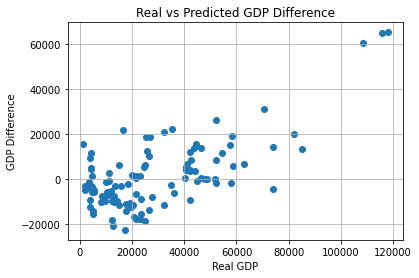

In [78]:
linear_reg_model(X_train_nato, y_train_nato, X_test_nato, y_test_nato)

### XGBoost


 XGBoost model for GDP prediction
---------------------------------------------------
[0]	test-mape:0.95092	train-mape:0.95136
[1]	test-mape:0.90418	train-mape:0.90517
[2]	test-mape:0.86031	train-mape:0.86136
[3]	test-mape:0.81917	train-mape:0.81948
[4]	test-mape:0.77971	train-mape:0.77945
[5]	test-mape:0.74192	train-mape:0.74150
[6]	test-mape:0.70480	train-mape:0.70565
[7]	test-mape:0.67002	train-mape:0.67117
[8]	test-mape:0.63650	train-mape:0.63847
[9]	test-mape:0.60520	train-mape:0.60759
[10]	test-mape:0.57676	train-mape:0.57858
[11]	test-mape:0.54954	train-mape:0.55098
[12]	test-mape:0.52267	train-mape:0.52466
[13]	test-mape:0.49843	train-mape:0.49943
[14]	test-mape:0.47460	train-mape:0.47574
[15]	test-mape:0.45166	train-mape:0.45320
[16]	test-mape:0.43040	train-mape:0.43182
[17]	test-mape:0.41038	train-mape:0.41155
[18]	test-mape:0.39192	train-mape:0.39219
[19]	test-mape:0.37457	train-mape:0.37376
[20]	test-mape:0.35800	train-mape:0.35627
[21]	test-mape:0.34221	train-mape:0.33955

[192]	test-mape:0.12196	train-mape:0.00072
[193]	test-mape:0.12196	train-mape:0.00071
[194]	test-mape:0.12195	train-mape:0.00070
[195]	test-mape:0.12195	train-mape:0.00070
[196]	test-mape:0.12195	train-mape:0.00069
[197]	test-mape:0.12194	train-mape:0.00068
[198]	test-mape:0.12193	train-mape:0.00067
[199]	test-mape:0.12192	train-mape:0.00066
[200]	test-mape:0.12191	train-mape:0.00064
[201]	test-mape:0.12191	train-mape:0.00064
[202]	test-mape:0.12190	train-mape:0.00062
[203]	test-mape:0.12189	train-mape:0.00061
[204]	test-mape:0.12190	train-mape:0.00060
[205]	test-mape:0.12189	train-mape:0.00060
[206]	test-mape:0.12189	train-mape:0.00058
[207]	test-mape:0.12188	train-mape:0.00057
[208]	test-mape:0.12188	train-mape:0.00057
[209]	test-mape:0.12187	train-mape:0.00056
[210]	test-mape:0.12186	train-mape:0.00054
[211]	test-mape:0.12186	train-mape:0.00054
[212]	test-mape:0.12187	train-mape:0.00053
[213]	test-mape:0.12187	train-mape:0.00053
[214]	test-mape:0.12186	train-mape:0.00051
[215]	test-

[383]	test-mape:0.12185	train-mape:0.00004
[384]	test-mape:0.12185	train-mape:0.00004
[385]	test-mape:0.12185	train-mape:0.00004
[386]	test-mape:0.12185	train-mape:0.00004
[387]	test-mape:0.12185	train-mape:0.00004
[388]	test-mape:0.12185	train-mape:0.00004
[389]	test-mape:0.12185	train-mape:0.00004
[390]	test-mape:0.12185	train-mape:0.00004
[391]	test-mape:0.12185	train-mape:0.00004
[392]	test-mape:0.12185	train-mape:0.00004
[393]	test-mape:0.12185	train-mape:0.00004
[394]	test-mape:0.12185	train-mape:0.00004
[395]	test-mape:0.12185	train-mape:0.00003
[396]	test-mape:0.12185	train-mape:0.00003
[397]	test-mape:0.12185	train-mape:0.00003
[398]	test-mape:0.12185	train-mape:0.00003
[399]	test-mape:0.12185	train-mape:0.00003
[400]	test-mape:0.12185	train-mape:0.00003
[401]	test-mape:0.12185	train-mape:0.00003
[402]	test-mape:0.12185	train-mape:0.00003
[403]	test-mape:0.12185	train-mape:0.00003
[404]	test-mape:0.12185	train-mape:0.00003
[405]	test-mape:0.12185	train-mape:0.00003
[406]	test-

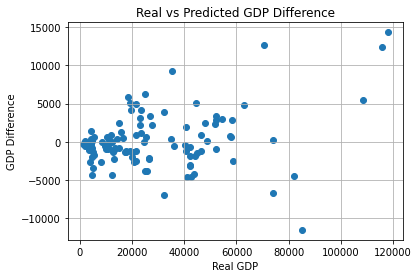

In [79]:
xgboost_model(
    X_train_nato,
    y_train_nato,
    X_test_nato,
    y_test_nato,
    num_boost_round = 500,
    max_depth = 12,
    eta = 0.05)

### XGBoost (GridSearchCV)


 XGBoost model with GridSearchCV for GDP prediction
---------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from GridSearchCV:
{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'verbosity': 0}


[0]	test-mape:0.94795	train-mape:0.94877
[1]	test-mape:0.89778	train-mape:0.90006
[2]	test-mape:0.85028	train-mape:0.85399
[3]	test-mape:0.80397	train-mape:0.80906
[4]	test-mape:0.75690	train-mape:0.76694
[5]	test-mape:0.71723	train-mape:0.72722
[6]	test-mape:0.68016	train-mape:0.68936
[7]	test-mape:0.64215	train-mape:0.65319
[8]	test-mape:0.60672	train-mape:0.61868
[9]	test-mape:0.57529	train-mape:0.58606
[10]	test-mape:0.54666	train-mape:0.55523
[11]	test-mape:0.52011	train-mape:0.52586
[12]	test-mape:0.49658	train-mape:0.49800
[13]	test-mape:0.47429	train-mape:0.47152
[14]	test-mape:0.45448	train-mape:0.44710
[15]	test-mape:0.43461	train-mape:0.42401
[16]	test-mape:0.41967

[186]	test-mape:0.15405	train-mape:0.01904
[187]	test-mape:0.15413	train-mape:0.01897
[188]	test-mape:0.15376	train-mape:0.01868
[189]	test-mape:0.15368	train-mape:0.01850
[190]	test-mape:0.15370	train-mape:0.01837
[191]	test-mape:0.15368	train-mape:0.01835
[192]	test-mape:0.15376	train-mape:0.01828
[193]	test-mape:0.15355	train-mape:0.01785
[194]	test-mape:0.15363	train-mape:0.01760
[195]	test-mape:0.15347	train-mape:0.01727
[196]	test-mape:0.15355	train-mape:0.01711
[197]	test-mape:0.15346	train-mape:0.01684
[198]	test-mape:0.15345	train-mape:0.01649
[199]	test-mape:0.15341	train-mape:0.01640
[200]	test-mape:0.15321	train-mape:0.01607
[201]	test-mape:0.15330	train-mape:0.01600
[202]	test-mape:0.15326	train-mape:0.01590
[203]	test-mape:0.15330	train-mape:0.01584
[204]	test-mape:0.15322	train-mape:0.01574
[205]	test-mape:0.15316	train-mape:0.01552
[206]	test-mape:0.15316	train-mape:0.01547
[207]	test-mape:0.15313	train-mape:0.01534
[208]	test-mape:0.15323	train-mape:0.01515
[209]	test-

[377]	test-mape:0.15055	train-mape:0.00378
[378]	test-mape:0.15054	train-mape:0.00374
[379]	test-mape:0.15053	train-mape:0.00373
[380]	test-mape:0.15053	train-mape:0.00372
[381]	test-mape:0.15052	train-mape:0.00369
[382]	test-mape:0.15052	train-mape:0.00365
[383]	test-mape:0.15053	train-mape:0.00364
[384]	test-mape:0.15054	train-mape:0.00360
[385]	test-mape:0.15054	train-mape:0.00359
[386]	test-mape:0.15055	train-mape:0.00355
[387]	test-mape:0.15056	train-mape:0.00352
[388]	test-mape:0.15053	train-mape:0.00348
[389]	test-mape:0.15051	train-mape:0.00346
[390]	test-mape:0.15050	train-mape:0.00346
[391]	test-mape:0.15049	train-mape:0.00342
[392]	test-mape:0.15049	train-mape:0.00340
[393]	test-mape:0.15048	train-mape:0.00336
[394]	test-mape:0.15048	train-mape:0.00334
[395]	test-mape:0.15047	train-mape:0.00331
[396]	test-mape:0.15046	train-mape:0.00329
[397]	test-mape:0.15043	train-mape:0.00327
[398]	test-mape:0.15043	train-mape:0.00326
[399]	test-mape:0.15043	train-mape:0.00323
[400]	test-

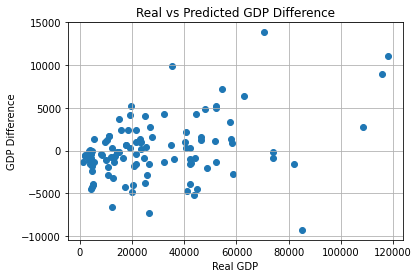

In [80]:
xgboost_grid_model(
    X_train_nato,
    y_train_nato,
    X_test_nato,
    y_test_nato,
    learning_rate = [0.05, 0.1, 0.2, 0.3],
    max_depth = [6,8,10,12,14],
    n_estimators = [5, 10, 15, 20, 1000],
    num_boost_round = 500,
    n_jobs = 5)

### Results - All features (NATO)

In [81]:
print('GridSearchCV:')
print(f'MSE: {MSE_xgb_grid}, MAPE: {MAPE_xgb_grid}')
print('XGBoost:')
print(f'MSE: {MSE_xgb}, MAPE: {MAPE_xgb}')
print('Linear Regression:')
print(f'MSE: {MSE_lin_reg}, MAPE: {MAPE_lin_reg}')

GridSearchCV:
MSE: 3536.3155320925907, MAPE: 0.149990866804873
XGBoost:
MSE: 3677.7535419092023, MAPE: 0.12185057890253663
Linear Regression:
MSE: 15390.426122519839, MAPE: 0.7385711471091371


## Selected OLS features (NATO)


 Linear regression model for GDP prediction
---------------------------------------------------
MSE: 15793.587942077462
MAPE: 0.6624880660283963


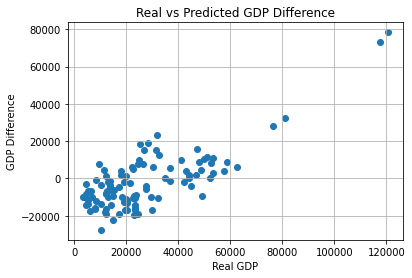

In [82]:
linear_reg_model(X_train[ols_nato_features], y_train, X_test[ols_nato_features], y_test)

In [83]:
xgboost_model(
    X_train_nato[ols_nato_features],
    y_train_nato,
    X_test_nato[ols_nato_features],
    y_test_nato,
    num_boost_round = 500,
    max_depth = 12,
    eta = 0.05)


 XGBoost model for GDP prediction
---------------------------------------------------
[0]	test-mape:0.95275	train-mape:0.95162
[1]	test-mape:0.90960	train-mape:0.90635
[2]	test-mape:0.86767	train-mape:0.86376
[3]	test-mape:0.82720	train-mape:0.82334
[4]	test-mape:0.78754	train-mape:0.78461
[5]	test-mape:0.74578	train-mape:0.74547
[6]	test-mape:0.71134	train-mape:0.71044
[7]	test-mape:0.67999	train-mape:0.67676
[8]	test-mape:0.64623	train-mape:0.64363
[9]	test-mape:0.61708	train-mape:0.61299
[10]	test-mape:0.58974	train-mape:0.58380
[11]	test-mape:0.56476	train-mape:0.55555
[12]	test-mape:0.54140	train-mape:0.52979
[13]	test-mape:0.51880	train-mape:0.50512
[14]	test-mape:0.50157	train-mape:0.48163
[15]	test-mape:0.48303	train-mape:0.45968
[16]	test-mape:0.46554	train-mape:0.43881
[17]	test-mape:0.45177	train-mape:0.41898
[18]	test-mape:0.43697	train-mape:0.39966
[19]	test-mape:0.42149	train-mape:0.38128
[20]	test-mape:0.40882	train-mape:0.36399
[21]	test-mape:0.39587	train-mape:0.34729

[192]	test-mape:0.22890	train-mape:0.00087
[193]	test-mape:0.22891	train-mape:0.00084
[194]	test-mape:0.22890	train-mape:0.00083
[195]	test-mape:0.22891	train-mape:0.00082
[196]	test-mape:0.22892	train-mape:0.00079
[197]	test-mape:0.22893	train-mape:0.00077
[198]	test-mape:0.22894	train-mape:0.00075
[199]	test-mape:0.22894	train-mape:0.00073
[200]	test-mape:0.22894	train-mape:0.00071
[201]	test-mape:0.22894	train-mape:0.00069
[202]	test-mape:0.22893	train-mape:0.00067
[203]	test-mape:0.22893	train-mape:0.00066
[204]	test-mape:0.22893	train-mape:0.00064
[205]	test-mape:0.22892	train-mape:0.00063
[206]	test-mape:0.22892	train-mape:0.00062
[207]	test-mape:0.22892	train-mape:0.00061
[208]	test-mape:0.22892	train-mape:0.00060
[209]	test-mape:0.22891	train-mape:0.00059
[210]	test-mape:0.22891	train-mape:0.00058
[211]	test-mape:0.22891	train-mape:0.00057
[212]	test-mape:0.22890	train-mape:0.00056
[213]	test-mape:0.22890	train-mape:0.00056
[214]	test-mape:0.22890	train-mape:0.00054
[215]	test-

[383]	test-mape:0.22888	train-mape:0.00003
[384]	test-mape:0.22888	train-mape:0.00003
[385]	test-mape:0.22888	train-mape:0.00003
[386]	test-mape:0.22888	train-mape:0.00003
[387]	test-mape:0.22888	train-mape:0.00003
[388]	test-mape:0.22888	train-mape:0.00003
[389]	test-mape:0.22888	train-mape:0.00002
[390]	test-mape:0.22888	train-mape:0.00002
[391]	test-mape:0.22888	train-mape:0.00002
[392]	test-mape:0.22888	train-mape:0.00002
[393]	test-mape:0.22888	train-mape:0.00002
[394]	test-mape:0.22888	train-mape:0.00002
[395]	test-mape:0.22888	train-mape:0.00002
[396]	test-mape:0.22888	train-mape:0.00002
[397]	test-mape:0.22888	train-mape:0.00002
[398]	test-mape:0.22888	train-mape:0.00002
[399]	test-mape:0.22888	train-mape:0.00002
[400]	test-mape:0.22888	train-mape:0.00002
[401]	test-mape:0.22888	train-mape:0.00002
[402]	test-mape:0.22888	train-mape:0.00002
[403]	test-mape:0.22888	train-mape:0.00002
[404]	test-mape:0.22888	train-mape:0.00002
[405]	test-mape:0.22888	train-mape:0.00002
[406]	test-


 XGBoost model with GridSearchCV for GDP prediction
---------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from GridSearchCV:
{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'verbosity': 0}


[0]	test-mape:0.67443	train-mape:0.69256
[1]	test-mape:0.50477	train-mape:0.48883
[2]	test-mape:0.42584	train-mape:0.35844
[3]	test-mape:0.39846	train-mape:0.27234
[4]	test-mape:0.38407	train-mape:0.22486
[5]	test-mape:0.38594	train-mape:0.19096
[6]	test-mape:0.38195	train-mape:0.16853
[7]	test-mape:0.38543	train-mape:0.15406
[8]	test-mape:0.38723	train-mape:0.14325
[9]	test-mape:0.38856	train-mape:0.13918
[10]	test-mape:0.38801	train-mape:0.13524
[11]	test-mape:0.38201	train-mape:0.12452
[12]	test-mape:0.38469	train-mape:0.12022
[13]	test-mape:0.38478	train-mape:0.11953
[14]	test-mape:0.39191	train-mape:0.11346
[15]	test-mape:0.38898	train-mape:0.10741
[16]	test-mape:0.37843	

[186]	test-mape:0.33887	train-mape:0.00028
[187]	test-mape:0.33887	train-mape:0.00027
[188]	test-mape:0.33886	train-mape:0.00026
[189]	test-mape:0.33885	train-mape:0.00025
[190]	test-mape:0.33885	train-mape:0.00024
[191]	test-mape:0.33885	train-mape:0.00024
[192]	test-mape:0.33885	train-mape:0.00024
[193]	test-mape:0.33885	train-mape:0.00023
[194]	test-mape:0.33886	train-mape:0.00022
[195]	test-mape:0.33885	train-mape:0.00021
[196]	test-mape:0.33885	train-mape:0.00021
[197]	test-mape:0.33885	train-mape:0.00020
[198]	test-mape:0.33885	train-mape:0.00020
[199]	test-mape:0.33885	train-mape:0.00019
[200]	test-mape:0.33883	train-mape:0.00019
[201]	test-mape:0.33884	train-mape:0.00019
[202]	test-mape:0.33884	train-mape:0.00018
[203]	test-mape:0.33884	train-mape:0.00017
[204]	test-mape:0.33883	train-mape:0.00016
[205]	test-mape:0.33884	train-mape:0.00016
[206]	test-mape:0.33884	train-mape:0.00015
[207]	test-mape:0.33884	train-mape:0.00014
[208]	test-mape:0.33884	train-mape:0.00014
[209]	test-

[377]	test-mape:0.33882	train-mape:0.00000
[378]	test-mape:0.33882	train-mape:0.00000
[379]	test-mape:0.33882	train-mape:0.00000
[380]	test-mape:0.33882	train-mape:0.00000
[381]	test-mape:0.33882	train-mape:0.00000
[382]	test-mape:0.33882	train-mape:0.00000
[383]	test-mape:0.33882	train-mape:0.00000
[384]	test-mape:0.33882	train-mape:0.00000
[385]	test-mape:0.33882	train-mape:0.00000
[386]	test-mape:0.33882	train-mape:0.00000
[387]	test-mape:0.33882	train-mape:0.00000
[388]	test-mape:0.33882	train-mape:0.00000
[389]	test-mape:0.33882	train-mape:0.00000
[390]	test-mape:0.33882	train-mape:0.00000
[391]	test-mape:0.33882	train-mape:0.00000
[392]	test-mape:0.33882	train-mape:0.00000
[393]	test-mape:0.33882	train-mape:0.00000
[394]	test-mape:0.33882	train-mape:0.00000
[395]	test-mape:0.33882	train-mape:0.00000
[396]	test-mape:0.33882	train-mape:0.00000
[397]	test-mape:0.33882	train-mape:0.00000
[398]	test-mape:0.33882	train-mape:0.00000
[399]	test-mape:0.33882	train-mape:0.00000
[400]	test-

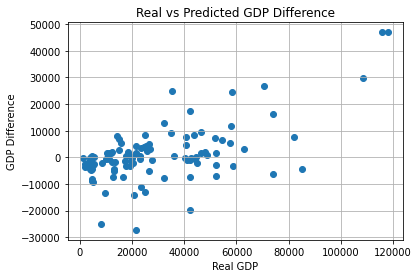

In [84]:
xgboost_grid_model(
    X_train_nato[ols_nato_features],
    y_train_nato,
    X_test_nato[ols_nato_features],
    y_test_nato,
    learning_rate = [0.05, 0.1, 0.2, 0.3],
    max_depth = [6,8,10,12,14],
    n_estimators = [5, 10, 15, 20, 1000],
    num_boost_round = 500,
    n_jobs = 5)

### Results - Selected features (NATO)

In [85]:
print('GridSearchCV:')
print(f'MSE: {MSE_xgb_grid}, MAPE: {MAPE_xgb_grid}')
print('XGBoost:')
print(f'MSE: {MSE_xgb}, MAPE: {MAPE_xgb}')
print('Linear Regression:')
print(f'MSE: {MSE_lin_reg}, MAPE: {MAPE_lin_reg}')

GridSearchCV:
MSE: 10629.984247737924, MAPE: 0.33882443960517045
XGBoost:
MSE: 8447.950002225913, MAPE: 0.2288754925341997
Linear Regression:
MSE: 15793.587942077462, MAPE: 0.6624880660283963


### Conclusion - Models with NATO dataframe is showing better results than with EU data. Check for outliers to see if there are countries impacting the prediction model results

## Outlier analysis (EU)

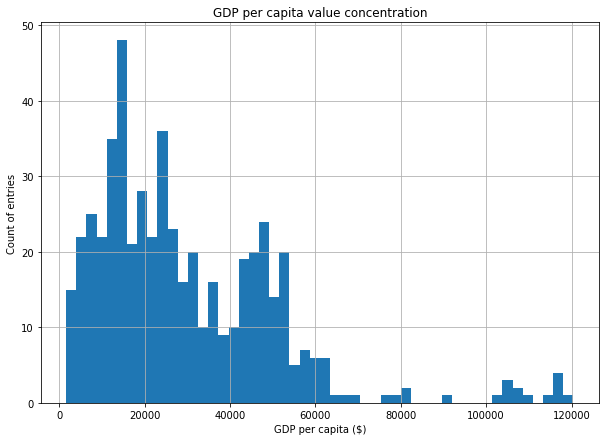

In [86]:
# Checking EU countries GDP per capita value concetration
hist = split_eu['Gross domestic product per capita, current prices | U.S. dollars | Units'].hist(figsize=(10,7), bins=50)
hist.set_xlabel('GDP per capita ($)')
hist.set_ylabel('Count of entries')
hist.set_title("GDP per capita value concentration");

Number of Countries that have outliers: 4
Number of Total Countries: 26
Outliers countries % from Total countries: 15.38%
Number of rows that have outliers: 31
Number of Total rows: 520
Outliers rows % from Total rows: 5.96%

------------------------Checking outliers values by Country-------------------

    Country  Outliers count
   Denmark               5
   Ireland               7
Luxembourg              17
    Sweden               2


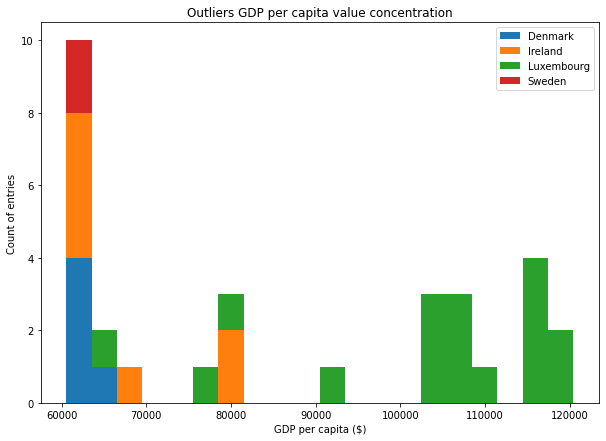


 Luxembourg has the most outliers and its GDP per capita values are furthest away from the main data, so try running the models without Luxembourg


In [87]:
# checking countries that have a GDP over $60k as they have the biggest difference from the actuals in the forecast model
outliers = split_eu[split_eu['Gross domestic product per capita, current prices | U.S. dollars | Units'] > 60000]
outliers_countries = outliers.groupby("Country").count().shape[0]
split_eu_countries = split_eu.groupby("Country").count().shape[0]
outliers_count = outliers.groupby(level=0).count().iloc[:, 0].rename('Outliers count').reset_index().to_string(index=False)

print(f'Number of Countries that have outliers: {outliers_countries}')
print(f'Number of Total Countries: {split_eu_countries}')
print(f'Outliers countries % from Total countries: {round(outliers_countries/split_eu_countries*100,2)}%')
print(f'Number of rows that have outliers: {outliers.shape[0]}')
print(f'Number of Total rows: {split_eu.shape[0]}')
print(f'Outliers rows % from Total rows: {round(outliers.shape[0]/split_eu.shape[0]*100,2)}%')


# group outliers data & plot histogram
print('\n------------------------Checking outliers values by Country-------------------')
print(f'\n {outliers_count}')
outliers_temp = outliers['Gross domestic product per capita, current prices | U.S. dollars | Units'].reset_index()
outliers_grouped = outliers_temp.pivot(columns='Country', values='Gross domestic product per capita, current prices | U.S. dollars | Units')
outliers_hist = outliers_grouped.plot.hist(stacked=True, bins=20,figsize=(10,7) )
plt.title("Outliers GDP per capita value concentration")
plt.xlabel('GDP per capita ($)')
plt.ylabel('Count of entries')
plt.legend()
plt.show()
print('\n Luxembourg has the most outliers and its GDP per capita values are furthest away from the main data, so try running the models without Luxembourg')

### Splitting data without Luxembourg

In [88]:
# Taking out Luxembourg and splitting dataframe

drop_lux = split_eu.drop('Luxembourg')
X_eu = drop_lux
X_train_eu, X_test_eu = train_test_split(X_eu, test_size=0.2, random_state=1)

y_train_eu = X_train_eu['Gross domestic product per capita, current prices | U.S. dollars | Units']
y_test_eu = X_test_eu['Gross domestic product per capita, current prices | U.S. dollars | Units']

X_train_eu.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )
X_test_eu.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )

print(X_train_eu.shape)
print(X_test_eu.shape)
print(y_train_eu.shape)
print(y_test_eu.shape)

(400, 19)
(100, 19)
(400,)
(100,)


In [89]:
linear_reg_model(X_train_eu[ols_eu_features], y_train_eu, X_test_eu[ols_eu_features], y_test_eu)


 Linear regression model for GDP prediction
---------------------------------------------------
MSE: 10102.123149355459
MAPE: 0.5158267555417957



 XGBoost model for GDP prediction
---------------------------------------------------
[0]	test-mape:0.94727	train-mape:0.95218
[1]	test-mape:0.90002	train-mape:0.90719
[2]	test-mape:0.85510	train-mape:0.86425
[3]	test-mape:0.81180	train-mape:0.82167
[4]	test-mape:0.77372	train-mape:0.78286
[5]	test-mape:0.73324	train-mape:0.74464
[6]	test-mape:0.69876	train-mape:0.70998
[7]	test-mape:0.66179	train-mape:0.67588
[8]	test-mape:0.62692	train-mape:0.64339
[9]	test-mape:0.59617	train-mape:0.61266
[10]	test-mape:0.56697	train-mape:0.58394
[11]	test-mape:0.53692	train-mape:0.55583
[12]	test-mape:0.51211	train-mape:0.52997
[13]	test-mape:0.48638	train-mape:0.50428
[14]	test-mape:0.46260	train-mape:0.48105
[15]	test-mape:0.43941	train-mape:0.45863
[16]	test-mape:0.41835	train-mape:0.43740
[17]	test-mape:0.40129	train-mape:0.41715
[18]	test-mape:0.38531	train-mape:0.39771
[19]	test-mape:0.37165	train-mape:0.37904
[20]	test-mape:0.35864	train-mape:0.36156
[21]	test-mape:0.34808	train-mape:0.34466

[192]	test-mape:0.20859	train-mape:0.00189
[193]	test-mape:0.20859	train-mape:0.00186
[194]	test-mape:0.20859	train-mape:0.00184
[195]	test-mape:0.20861	train-mape:0.00182
[196]	test-mape:0.20862	train-mape:0.00180
[197]	test-mape:0.20863	train-mape:0.00178
[198]	test-mape:0.20865	train-mape:0.00175
[199]	test-mape:0.20866	train-mape:0.00174
[200]	test-mape:0.20868	train-mape:0.00171
[201]	test-mape:0.20868	train-mape:0.00168
[202]	test-mape:0.20869	train-mape:0.00167
[203]	test-mape:0.20868	train-mape:0.00165
[204]	test-mape:0.20869	train-mape:0.00164
[205]	test-mape:0.20871	train-mape:0.00161
[206]	test-mape:0.20871	train-mape:0.00158
[207]	test-mape:0.20872	train-mape:0.00158
[208]	test-mape:0.20874	train-mape:0.00155
[209]	test-mape:0.20874	train-mape:0.00154
[210]	test-mape:0.20873	train-mape:0.00151
[211]	test-mape:0.20873	train-mape:0.00149
[212]	test-mape:0.20874	train-mape:0.00149
[213]	test-mape:0.20874	train-mape:0.00149
[214]	test-mape:0.20874	train-mape:0.00148
[215]	test-

[383]	test-mape:0.20922	train-mape:0.00007
[384]	test-mape:0.20922	train-mape:0.00007
[385]	test-mape:0.20922	train-mape:0.00007
[386]	test-mape:0.20922	train-mape:0.00007
[387]	test-mape:0.20922	train-mape:0.00006
[388]	test-mape:0.20922	train-mape:0.00006
[389]	test-mape:0.20922	train-mape:0.00006
[390]	test-mape:0.20922	train-mape:0.00006
[391]	test-mape:0.20922	train-mape:0.00006
[392]	test-mape:0.20922	train-mape:0.00006
[393]	test-mape:0.20922	train-mape:0.00006
[394]	test-mape:0.20922	train-mape:0.00006
[395]	test-mape:0.20922	train-mape:0.00006
[396]	test-mape:0.20922	train-mape:0.00006
[397]	test-mape:0.20922	train-mape:0.00005
[398]	test-mape:0.20922	train-mape:0.00005
[399]	test-mape:0.20922	train-mape:0.00005
[400]	test-mape:0.20922	train-mape:0.00005
[401]	test-mape:0.20922	train-mape:0.00005
[402]	test-mape:0.20922	train-mape:0.00005
[403]	test-mape:0.20922	train-mape:0.00005
[404]	test-mape:0.20922	train-mape:0.00005
[405]	test-mape:0.20922	train-mape:0.00005
[406]	test-

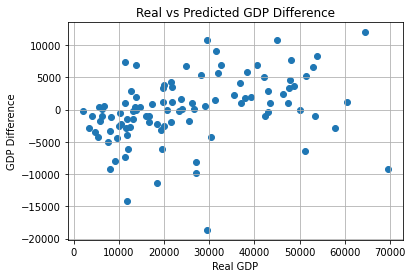

In [90]:
xgboost_model(
    X_train_eu[ols_eu_features],
    y_train_eu,
    X_test_eu[ols_eu_features],
    y_test_eu,
    num_boost_round = 500,
    max_depth = 12,
    eta = 0.05)


 XGBoost model with GridSearchCV for GDP prediction
---------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from GridSearchCV:
{'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'verbosity': 0}


[0]	test-mape:0.67739	train-mape:0.69104
[1]	test-mape:0.45579	train-mape:0.47992
[2]	test-mape:0.36834	train-mape:0.36123
[3]	test-mape:0.35347	train-mape:0.30074
[4]	test-mape:0.32076	train-mape:0.23829
[5]	test-mape:0.30682	train-mape:0.18669
[6]	test-mape:0.32693	train-mape:0.14472
[7]	test-mape:0.31728	train-mape:0.12743
[8]	test-mape:0.31099	train-mape:0.10879
[9]	test-mape:0.30655	train-mape:0.09259
[10]	test-mape:0.30613	train-mape:0.08497
[11]	test-mape:0.31186	train-mape:0.07671
[12]	test-mape:0.31439	train-mape:0.07311
[13]	test-mape:0.31128	train-mape:0.06256
[14]	test-mape:0.31000	train-mape:0.05541
[15]	test-mape:0.31020	train-mape:0.05487
[16]	test-mape:0.30681	

[186]	test-mape:0.30239	train-mape:0.00000
[187]	test-mape:0.30239	train-mape:0.00000
[188]	test-mape:0.30239	train-mape:0.00000
[189]	test-mape:0.30239	train-mape:0.00000
[190]	test-mape:0.30239	train-mape:0.00000
[191]	test-mape:0.30239	train-mape:0.00000
[192]	test-mape:0.30239	train-mape:0.00000
[193]	test-mape:0.30239	train-mape:0.00000
[194]	test-mape:0.30239	train-mape:0.00000
[195]	test-mape:0.30239	train-mape:0.00000
[196]	test-mape:0.30239	train-mape:0.00000
[197]	test-mape:0.30239	train-mape:0.00000
[198]	test-mape:0.30239	train-mape:0.00000
[199]	test-mape:0.30239	train-mape:0.00000
[200]	test-mape:0.30239	train-mape:0.00000
[201]	test-mape:0.30239	train-mape:0.00000
[202]	test-mape:0.30239	train-mape:0.00000
[203]	test-mape:0.30239	train-mape:0.00000
[204]	test-mape:0.30239	train-mape:0.00000
[205]	test-mape:0.30239	train-mape:0.00000
[206]	test-mape:0.30239	train-mape:0.00000
[207]	test-mape:0.30239	train-mape:0.00000
[208]	test-mape:0.30239	train-mape:0.00000
[209]	test-

[377]	test-mape:0.30239	train-mape:0.00000
[378]	test-mape:0.30239	train-mape:0.00000
[379]	test-mape:0.30239	train-mape:0.00000
[380]	test-mape:0.30239	train-mape:0.00000
[381]	test-mape:0.30239	train-mape:0.00000
[382]	test-mape:0.30239	train-mape:0.00000
[383]	test-mape:0.30239	train-mape:0.00000
[384]	test-mape:0.30239	train-mape:0.00000
[385]	test-mape:0.30239	train-mape:0.00000
[386]	test-mape:0.30239	train-mape:0.00000
[387]	test-mape:0.30239	train-mape:0.00000
[388]	test-mape:0.30239	train-mape:0.00000
[389]	test-mape:0.30239	train-mape:0.00000
[390]	test-mape:0.30239	train-mape:0.00000
[391]	test-mape:0.30239	train-mape:0.00000
[392]	test-mape:0.30239	train-mape:0.00000
[393]	test-mape:0.30239	train-mape:0.00000
[394]	test-mape:0.30239	train-mape:0.00000
[395]	test-mape:0.30239	train-mape:0.00000
[396]	test-mape:0.30239	train-mape:0.00000
[397]	test-mape:0.30239	train-mape:0.00000
[398]	test-mape:0.30239	train-mape:0.00000
[399]	test-mape:0.30239	train-mape:0.00000
[400]	test-

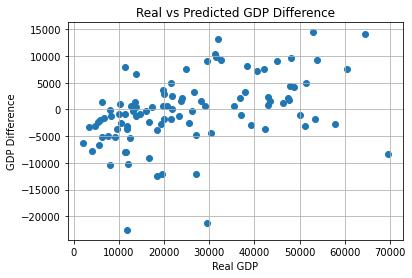

In [91]:
xgboost_grid_model(
    X_train_eu[ols_eu_features],
    y_train_eu,
    X_test_eu[ols_eu_features],
    y_test_eu,
    learning_rate = [0.05, 0.1, 0.2, 0.3],
    max_depth = [6,8,10,12,14],
    n_estimators = [5, 10, 15, 20, 1000],
    num_boost_round = 500,
    n_jobs = 5)

### Results - Selected features (EU without Luxembourg)

In [92]:
print('GridSearchCV:')
print(f'MSE: {MSE_xgb_grid}, MAPE: {MAPE_xgb_grid}')
print('XGBoost:')
print(f'MSE: {MSE_xgb}, MAPE: {MAPE_xgb}')
print('Linear Regression:')
print(f'MSE: {MSE_lin_reg}, MAPE: {MAPE_lin_reg}')
print('Model results without Luxembourg are better. Do the same analysis for NATO dataframe and see if prediction is more accurate than EU model')

GridSearchCV:
MSE: 6445.466262058077, MAPE: 0.3023901960952566
XGBoost:
MSE: 5145.220860687722, MAPE: 0.20922081337903609
Linear Regression:
MSE: 10102.123149355459, MAPE: 0.5158267555417957
Model results without Luxembourg are better. Do the same analysis for NATO dataframe and see if prediction is more accurate than EU model


## Outlier analysis (NATO)

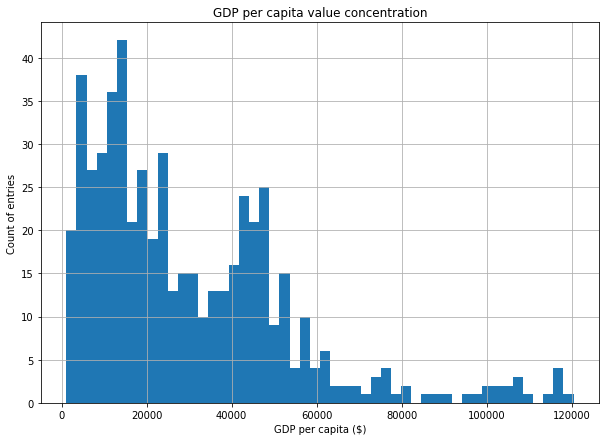

In [93]:
# Checking NATO countries GDP per capita value concetration
hist = split_nato['Gross domestic product per capita, current prices | U.S. dollars | Units'].hist(figsize=(10,7), bins=50)
hist.set_xlabel('GDP per capita ($)')
hist.set_ylabel('Count of entries')
hist.set_title("GDP per capita value concentration");

Number of Countries that have outliers: 5
Number of Total Countries: 27
Outliers countries % from Total countries: 18.52%
Number of rows that have outliers: 44
Number of Total rows: 539
Outliers rows % from Total rows: 8.16%

------------------------Checking outliers values by Country-------------------

       Country  Outliers count
      Denmark               5
      Iceland               5
   Luxembourg              17
       Norway              15
United States               2


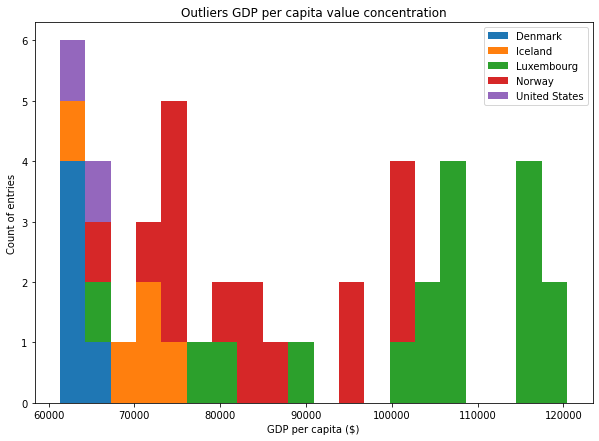


 Luxembourg has the most outliers and its GDP per capita values are furthest away from the main data, so try running the models without Luxembourg


In [94]:
# checking countries that have a GDP over $60k as they have the biggest difference from the actuals in the forecast model
outliers_nato = split_nato[split_nato['Gross domestic product per capita, current prices | U.S. dollars | Units'] > 60000]
outliers_countries_nato = outliers_nato.groupby("Country").count().shape[0]
split_nato_countries = split_nato.groupby("Country").count().shape[0]
outliers_count_nato = outliers_nato.groupby(level=0).count().iloc[:, 0].rename('Outliers count').reset_index().to_string(index=False)

print(f'Number of Countries that have outliers: {outliers_countries_nato}')
print(f'Number of Total Countries: {split_nato_countries}')
print(f'Outliers countries % from Total countries: {round(outliers_countries_nato/split_nato_countries*100,2)}%')
print(f'Number of rows that have outliers: {outliers_nato.shape[0]}')
print(f'Number of Total rows: {split_nato.shape[0]}')
print(f'Outliers rows % from Total rows: {round(outliers_nato.shape[0]/split_nato.shape[0]*100,2)}%')


# group outliers data & plot histogram
print('\n------------------------Checking outliers values by Country-------------------')
print(f'\n {outliers_count_nato}')
outliers_temp_nato = outliers_nato['Gross domestic product per capita, current prices | U.S. dollars | Units'].reset_index()
outliers_grouped_nato = outliers_temp_nato.pivot(columns='Country', values='Gross domestic product per capita, current prices | U.S. dollars | Units')
outliers_hist_nato = outliers_grouped_nato.plot.hist(stacked=True, bins=20,figsize=(10,7) )
plt.title("Outliers GDP per capita value concentration")
plt.xlabel('GDP per capita ($)')
plt.ylabel('Count of entries')
plt.legend()
plt.show()
print('\n Luxembourg has the most outliers and its GDP per capita values are furthest away from the main data, so try running the models without Luxembourg')

### Splitting data without Luxembourg

In [95]:
# Taking out Luxembourg and splitting dataframe

drop_lux_nato = split_nato.drop('Luxembourg')
X_nato = drop_lux_nato
X_train_nato1, X_test_nato1 = train_test_split(X_nato, test_size=0.2, random_state=0)

y_train_nato1 = X_train_nato1['Gross domestic product per capita, current prices | U.S. dollars | Units']
y_test_nato1 = X_test_nato1['Gross domestic product per capita, current prices | U.S. dollars | Units']

X_train_nato1.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )
X_test_nato1.drop('Gross domestic product per capita, current prices | U.S. dollars | Units', axis=1, inplace=True )

print(X_train_nato1.shape)
print(X_test_nato1.shape)
print(y_train_nato1.shape)
print(y_test_nato1.shape)

(415, 19)
(104, 19)
(415,)
(104,)


In [96]:
# Saving final dataframe to data folder

df_nato_final = X_nato[['General government revenue | Percent of GDP',
        'General government total expenditure | National currency | Billions',
        'Gross national savings | Percent of GDP',
        'Total investment | Percent of GDP',
        'Unemployment rate | Percent of total labor force',
        'Gross domestic product per capita, current prices | U.S. dollars | Units']]

os.makedirs('data', exist_ok=True)  
df_nato_final.to_csv('data/df_nato_final.csv')  

In [97]:
linear_reg_model(X_train_nato1[ols_nato_features], y_train_nato1, X_test_nato1[ols_nato_features], y_test_nato1)


 Linear regression model for GDP prediction
---------------------------------------------------
MSE: 14311.165392818142
MAPE: 0.7513377718019565


In [98]:
xgboost_model(
    X_train_nato1[ols_nato_features],
    y_train_nato1,
    X_test_nato1[ols_nato_features],
    y_test_nato1,
    num_boost_round = 500,
    max_depth = 12,
    eta = 0.05)


 XGBoost model for GDP prediction
---------------------------------------------------
[0]	test-mape:0.95499	train-mape:0.95007
[1]	test-mape:0.91036	train-mape:0.90476
[2]	test-mape:0.86370	train-mape:0.85958
[3]	test-mape:0.82362	train-mape:0.81776
[4]	test-mape:0.78283	train-mape:0.77882
[5]	test-mape:0.74848	train-mape:0.74189
[6]	test-mape:0.71461	train-mape:0.70687
[7]	test-mape:0.68202	train-mape:0.67331
[8]	test-mape:0.64442	train-mape:0.64064
[9]	test-mape:0.61556	train-mape:0.61065
[10]	test-mape:0.58651	train-mape:0.58131
[11]	test-mape:0.55864	train-mape:0.55433
[12]	test-mape:0.53221	train-mape:0.52841
[13]	test-mape:0.50958	train-mape:0.50410
[14]	test-mape:0.48677	train-mape:0.48008
[15]	test-mape:0.46743	train-mape:0.45781
[16]	test-mape:0.44931	train-mape:0.43728
[17]	test-mape:0.42946	train-mape:0.41677
[18]	test-mape:0.41050	train-mape:0.39744
[19]	test-mape:0.39339	train-mape:0.37918
[20]	test-mape:0.37799	train-mape:0.36192
[21]	test-mape:0.36248	train-mape:0.34495

[192]	test-mape:0.18052	train-mape:0.00101
[193]	test-mape:0.18052	train-mape:0.00099
[194]	test-mape:0.18051	train-mape:0.00097
[195]	test-mape:0.18051	train-mape:0.00095
[196]	test-mape:0.18050	train-mape:0.00093
[197]	test-mape:0.18048	train-mape:0.00091
[198]	test-mape:0.18049	train-mape:0.00088
[199]	test-mape:0.18050	train-mape:0.00086
[200]	test-mape:0.18050	train-mape:0.00085
[201]	test-mape:0.18050	train-mape:0.00083
[202]	test-mape:0.18051	train-mape:0.00081
[203]	test-mape:0.18050	train-mape:0.00079
[204]	test-mape:0.18051	train-mape:0.00078
[205]	test-mape:0.18051	train-mape:0.00076
[206]	test-mape:0.18051	train-mape:0.00075
[207]	test-mape:0.18051	train-mape:0.00073
[208]	test-mape:0.18051	train-mape:0.00071
[209]	test-mape:0.18051	train-mape:0.00070
[210]	test-mape:0.18051	train-mape:0.00069
[211]	test-mape:0.18051	train-mape:0.00068
[212]	test-mape:0.18051	train-mape:0.00066
[213]	test-mape:0.18051	train-mape:0.00065
[214]	test-mape:0.18051	train-mape:0.00064
[215]	test-

[383]	test-mape:0.18053	train-mape:0.00003
[384]	test-mape:0.18053	train-mape:0.00003
[385]	test-mape:0.18053	train-mape:0.00003
[386]	test-mape:0.18053	train-mape:0.00003
[387]	test-mape:0.18053	train-mape:0.00003
[388]	test-mape:0.18053	train-mape:0.00003
[389]	test-mape:0.18053	train-mape:0.00003
[390]	test-mape:0.18053	train-mape:0.00003
[391]	test-mape:0.18053	train-mape:0.00003
[392]	test-mape:0.18053	train-mape:0.00003
[393]	test-mape:0.18053	train-mape:0.00002
[394]	test-mape:0.18053	train-mape:0.00002
[395]	test-mape:0.18053	train-mape:0.00002
[396]	test-mape:0.18053	train-mape:0.00002
[397]	test-mape:0.18053	train-mape:0.00002
[398]	test-mape:0.18053	train-mape:0.00002
[399]	test-mape:0.18053	train-mape:0.00002
[400]	test-mape:0.18053	train-mape:0.00002
[401]	test-mape:0.18053	train-mape:0.00002
[402]	test-mape:0.18053	train-mape:0.00002
[403]	test-mape:0.18053	train-mape:0.00002
[404]	test-mape:0.18053	train-mape:0.00002
[405]	test-mape:0.18053	train-mape:0.00002
[406]	test-

In [99]:
xgboost_grid_model(
    X_train_nato1[ols_nato_features],
    y_train_nato1,
    X_test_nato1[ols_nato_features],
    y_test_nato1,
    learning_rate = [0.05, 0.1, 0.2, 0.3],
    max_depth = [6,8,10,12,14],
    n_estimators = [5, 10, 15, 20, 1000],
    num_boost_round = 500,
    n_jobs = 5)


 XGBoost model with GridSearchCV for GDP prediction
---------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'verbosity': 0}


[0]	test-mape:0.91002	train-mape:0.90019
[1]	test-mape:0.82927	train-mape:0.81453
[2]	test-mape:0.75194	train-mape:0.73667
[3]	test-mape:0.68610	train-mape:0.66721
[4]	test-mape:0.62266	train-mape:0.60339
[5]	test-mape:0.56951	train-mape:0.54658
[6]	test-mape:0.51395	train-mape:0.49305
[7]	test-mape:0.46785	train-mape:0.44583
[8]	test-mape:0.42974	train-mape:0.40344
[9]	test-mape:0.39374	train-mape:0.36529
[10]	test-mape:0.36295	train-mape:0.33230
[11]	test-mape:0.33804	train-mape:0.30220
[12]	test-mape:0.31350	train-mape:0.27395
[13]	test-mape:0.29325	train-mape:0.24813
[14]	test-mape:0.27450	train-mape:0.22494
[15]	test-mape:0.25935	train-mape:0.20423
[16]	test-mape:0.24513

[186]	test-mape:0.17143	train-mape:0.00025
[187]	test-mape:0.17143	train-mape:0.00024
[188]	test-mape:0.17143	train-mape:0.00024
[189]	test-mape:0.17143	train-mape:0.00024
[190]	test-mape:0.17143	train-mape:0.00023
[191]	test-mape:0.17143	train-mape:0.00023
[192]	test-mape:0.17143	train-mape:0.00022
[193]	test-mape:0.17143	train-mape:0.00022
[194]	test-mape:0.17143	train-mape:0.00021
[195]	test-mape:0.17143	train-mape:0.00021
[196]	test-mape:0.17143	train-mape:0.00020
[197]	test-mape:0.17143	train-mape:0.00020
[198]	test-mape:0.17142	train-mape:0.00020
[199]	test-mape:0.17142	train-mape:0.00019
[200]	test-mape:0.17142	train-mape:0.00019
[201]	test-mape:0.17142	train-mape:0.00018
[202]	test-mape:0.17142	train-mape:0.00018
[203]	test-mape:0.17142	train-mape:0.00017
[204]	test-mape:0.17141	train-mape:0.00017
[205]	test-mape:0.17141	train-mape:0.00017
[206]	test-mape:0.17141	train-mape:0.00016
[207]	test-mape:0.17141	train-mape:0.00016
[208]	test-mape:0.17142	train-mape:0.00016
[209]	test-

[377]	test-mape:0.17141	train-mape:0.00000
[378]	test-mape:0.17141	train-mape:0.00000
[379]	test-mape:0.17141	train-mape:0.00000
[380]	test-mape:0.17141	train-mape:0.00000
[381]	test-mape:0.17141	train-mape:0.00000
[382]	test-mape:0.17141	train-mape:0.00000
[383]	test-mape:0.17141	train-mape:0.00000
[384]	test-mape:0.17141	train-mape:0.00000
[385]	test-mape:0.17141	train-mape:0.00000
[386]	test-mape:0.17141	train-mape:0.00000
[387]	test-mape:0.17141	train-mape:0.00000
[388]	test-mape:0.17141	train-mape:0.00000
[389]	test-mape:0.17141	train-mape:0.00000
[390]	test-mape:0.17141	train-mape:0.00000
[391]	test-mape:0.17141	train-mape:0.00000
[392]	test-mape:0.17141	train-mape:0.00000
[393]	test-mape:0.17141	train-mape:0.00000
[394]	test-mape:0.17141	train-mape:0.00000
[395]	test-mape:0.17141	train-mape:0.00000
[396]	test-mape:0.17141	train-mape:0.00000
[397]	test-mape:0.17141	train-mape:0.00000
[398]	test-mape:0.17141	train-mape:0.00000
[399]	test-mape:0.17141	train-mape:0.00000
[400]	test-

### Results - Selected features (NATO without Luxembourg)

In [100]:
print('GridSearchCV:')
print(f'MSE: {MSE_xgb_grid}, MAPE: {MAPE_xgb_grid}')
print('XGBoost:')
print(f'MSE: {MSE_xgb}, MAPE: {MAPE_xgb}')
print('Linear Regression:')
print(f'MSE: {MSE_lin_reg}, MAPE: {MAPE_lin_reg}')
print('\n----------------------------------------------------')
print('Model results without Luxembourg are better')

GridSearchCV:
MSE: 5093.802732028272, MAPE: 0.1714108557538035
XGBoost:
MSE: 5435.499455680153, MAPE: 0.18053403888273073
Linear Regression:
MSE: 14311.165392818142, MAPE: 0.7513377718019565

----------------------------------------------------
Model results without Luxembourg are better


### Conclusion - Use XGBoost model with GridSearchCV with NATO data without Luxembourg as it has the most accurate results

## GDP per capita prediction function

In [101]:
def predict_GDP():
    columns = ['General government revenue | Percent of GDP',
               'General government total expenditure | National currency | Billions',
               'Gross national savings | Percent of GDP',
               'Total investment | Percent of GDP',
               'Unemployment rate | Percent of total labor force']
    print(f'Enter 5 features to predict GDP per capita:')
    
    gov_rev = float(input('General government revenue | Percent of GDP: '))
    gov_exp = float(input('General government total expenditure | National currency | Billions: '))
    gross_savings = float(input('Gross national savings | Percent of GDP: '))
    tot_investment = float(input('Total investment | Percent of GDP: '))
    unemployment_rate = float(input('Unemployment rate | Percent of total labor force: '))
    
    values = [gov_rev, gov_exp, gross_savings, tot_investment, unemployment_rate]
    new_line = xgb.DMatrix(pd.DataFrame([values], columns=columns))
    return print(f'Predicted GDP per capita value: {xgboost_grid_model.best_xg.predict(new_line)}')

In [102]:
predict_GDP()

Enter 5 features to predict GDP per capita:
General government revenue | Percent of GDP: 10
General government total expenditure | National currency | Billions: 1000
Gross national savings | Percent of GDP: 10
Total investment | Percent of GDP: 10
Unemployment rate | Percent of total labor force: 10
Predicted GDP per capita value: [24459.93]
